In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

%matplotlib inline 

In [474]:
from platform import python_version

print(python_version())

3.8.5


In [475]:
print(sm.__version__)

0.12.0


In [4]:
df = pd.DataFrame(pd.read_csv('20210505_g_RNA_fulldata.csv'))

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
df[df['Sample.class'] == 'clinical sample'].isna().mean()

Well                       0.000000
Well.Position              0.000000
Sample.Name                0.000000
Target.Name                0.000000
CT                         0.000000
Rawdata                    0.000000
plate                      0.000000
Study.ID                   0.000000
Date.Collected             0.191304
Date.of.enrollment         0.000000
symptom_onset              0.000000
DOSS                       0.000000
TIS                        0.000000
DOSS_TP                    0.000000
TP_new                     0.000000
Stool.ID                   0.000000
TP_old                     0.084058
Sample.Type                0.000000
Box                        0.059420
Column                     0.084058
Row                        0.608696
dateRNAExtracted           0.236232
extractedBy                0.236232
samplePlate                0.000000
samplePlatePosition        0.000000
qRT.PCR_PlateEgene_1       1.000000
qRT.PCR_PlateEgene_2       1.000000
qRT.PCR_PlateRdRPgene_1    1

In [7]:
df.columns

Index(['Well', 'Well.Position', 'Sample.Name', 'Target.Name', 'CT', 'Rawdata',
       'plate', 'Study.ID', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'TP_new', 'Stool.ID',
       'TP_old', 'Sample.Type', 'Box', 'Column', 'Row', 'dateRNAExtracted',
       'extractedBy', 'samplePlate', 'samplePlatePosition',
       'qRT.PCR_PlateEgene_1', 'qRT.PCR_PlateEgene_2',
       'qRT.PCR_PlateRdRPgene_1', 'qRT.PCR_PlateRdRPgene_2',
       'qRT.PCR_PlateN1gene_1', 'qRT.PCR_PlateN1gene_2',
       'qRT.PCR_PlateN2gene_1', 'qRT.PCR_PlateN2gene_2',
       'qRT.PCR_PlatesgRNA_1', 'qRT.PCR_PlatesgRNA_2', 'Notes...30',
       'Notes...31', 'Sample.class', 'viral.load', 'efficiency'],
      dtype='object')

(0.0, 10.0)

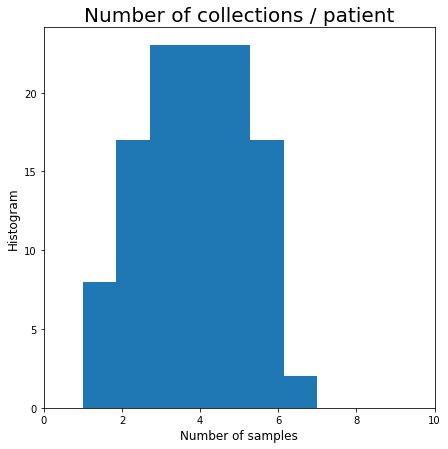

In [8]:


plt.figure(figsize=(7,7))

plt.hist(df[df['Sample.class'] == 'clinical sample'].groupby('Study.ID')['TIS'].nunique(), bins = 7)
plt.title('Number of collections / patient', fontsize = 20)
plt.xlabel('Number of samples', fontsize = 12)
plt.ylabel('Histogram', fontsize = 12)
plt.xlim(0,10)


In [9]:
pd.DataFrame(df[df['Sample.class'] == 'clinical sample'].groupby('Study.ID')['TIS'].nunique())

,TIS
Study.ID,
55619-001,7
55619-004,4
55619-012,6
55619-016,5
55619-108,3
...,...
55619-337,3
55619-339,6
55619-344,5


In [10]:
np.array(df[(df['Sample.class'] == 'clinical sample') & (df['Study.ID'] == '55619-001')].TIS.sort_values())

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  28.,  28.,  28.,  28.,  28.,  28.,
        28.,  28., 142., 142., 142., 142., 142., 142., 142., 142., 142.,
       142., 142., 142., 142., 142., 142., 142., 181., 181., 181., 181.,
       181., 181., 181., 181., 182., 182., 182., 182., 182., 182., 182.,
       182., 182., 182., 182., 182., 182., 182., 182., 182., 286., 286.,
       286., 286., 286., 286., 286., 286.])

In [ ]:
df.groupby('Date.of.enrollment')['Study.ID'].nunique()

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)

plt.boxplot(np.log10(df[(df['Sample.class'] == 'clinical sample') & (df['viral.load'] > 0)]['viral.load']))
plt.title('Viral Load', fontsize = 20)
#plt.xlabel('Viral Load', fontsize = 12)
ax.set_yticks(np.arange(0, 8))
ax.set_yticklabels(10.0**np.arange(0, 8))
#plt.ylabel('Histogram', fontsize = 12)


In [ ]:
df[df['Sample.class'] == 'lob']['viral.load'].describe()

In [1011]:
df[df['Sample.class'] == 'lob']

,Well,Well.Position,Sample.Name,Target.Name,CT,Rawdata,plate,Study.ID,Date.Collected,Date.of.enrollment,...,qRT.PCR_PlateN1gene_2,qRT.PCR_PlateN2gene_1,qRT.PCR_PlateN2gene_2,qRT.PCR_PlatesgRNA_1,qRT.PCR_PlatesgRNA_2,Notes...30,Notes...31,Sample.class,viral.load,efficiency
6652,1,A1,OG1_ER1_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
6653,2,A2,OG1_ER1_H1,RDRPgene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
6654,3,A3,ZY1_ER1_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
6655,4,A4,ZY1_ER1_H1,RDRPgene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
6656,5,A5,OG1_ER2_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,372,P12,ZY2_SR1_H4,N2gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
7284,373,P13,OG2_SR2_H4,N1gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
7285,374,P14,OG2_SR2_H4,N2gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0
7286,375,P15,ZY2_SR2_H4,N1gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0


In [1013]:
df['log_viral_load'] = np.log10(1+df['viral.load'])

In [1019]:
df_temp = df[(df['Sample.class'] == 'lob')]
      #      & (df['Target.Name'] == 'N1gene')] 

df_temp.groupby(['Target.Name', 'Sample.Name']).log_viral_load.mean()

Target.Name  Sample.Name
Egene        OG1_ER1_H1     0.0
             OG1_ER1_H2     0.0
             OG1_ER1_H3     0.0
             OG1_ER1_H4     0.0
             OG1_ER2_H1     0.0
                           ... 
RDRPgene     ZY2_SR1_H4     0.0
             ZY2_SR2_H1     0.0
             ZY2_SR2_H2     0.0
             ZY2_SR2_H3     0.0
             ZY2_SR2_H4     0.0
Name: log_viral_load, Length: 256, dtype: float64

In [1018]:
df_temp

,Well,Well.Position,Sample.Name,Target.Name,CT,Rawdata,plate,Study.ID,Date.Collected,Date.of.enrollment,...,qRT.PCR_PlateN2gene_1,qRT.PCR_PlateN2gene_2,qRT.PCR_PlatesgRNA_1,qRT.PCR_PlatesgRNA_2,Notes...30,Notes...31,Sample.class,viral.load,efficiency,log_viral_load
6652,1,A1,OG1_ER1_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
6653,2,A2,OG1_ER1_H1,RDRPgene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
6654,3,A3,ZY1_ER1_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
6655,4,A4,ZY1_ER1_H1,RDRPgene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
6656,5,A5,OG1_ER2_H1,Egene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,372,P12,ZY2_SR1_H4,N2gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
7284,373,P13,OG2_SR2_H4,N1gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
7285,374,P14,OG2_SR2_H4,N2gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0
7286,375,P15,ZY2_SR2_H4,N1gene,100,Undetermined,plate11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lob,0,0.0,0.0


In [111]:
pd.DataFrame(pd.DataFrame(df[(df['Sample.class'] == 'clinical sample') & (df['viral.load'] > 0)]['viral.load']).groupby('viral.load').size())[150:]

,0
viral.load,
2220,1
2296,3
2299,1
2314,1
2727,2
3307,2
3716,1
3914,2
4610,2


In [319]:
df[(df['Sample.class'] == 'clinical sample')]

,Well,Well.Position,Sample.Name,Target.Name,CT,Rawdata,plate,Study.ID,Date.Collected,Date.of.enrollment,...,qRT.PCR_PlateN1gene_2,qRT.PCR_PlateN2gene_1,qRT.PCR_PlateN2gene_2,qRT.PCR_PlatesgRNA_1,qRT.PCR_PlatesgRNA_2,Notes...30,Notes...31,Sample.class,viral.load,efficiency
0,1,A1,COVRNA0096,Egene,100,Undetermined,plate1,55619-232,NaN,06/23/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0
1,2,A2,COVRNA0096,RDRPgene,100,Undetermined,plate1,55619-232,NaN,06/23/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0
2,3,A3,COVRNA0041,Egene,25,25.330999374389648,plate1,55619-173,06/12/2020,05/30/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,166,16.6
3,4,A4,COVRNA0041,RDRPgene,28,28.01300048828125,plate1,55619-173,06/12/2020,05/30/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,52,5.2
4,5,A5,COVRNA0003,Egene,37,36.755001068115234,plate1,55619-115,05/18/2020,05/10/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147,292,M4,COVRNA0686,N2gene,100,Undetermined,plate12,55619-168,03/23/2021,05/29/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0
8156,313,N1,COVRNA0685,N1gene,36,36.387955776866434,plate12,55619-218,03/23/2021,06/17/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,1,0.1
8157,314,N2,COVRNA0685,N2gene,100,Undetermined,plate12,55619-218,03/23/2021,06/17/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0
8158,315,N3,COVRNA0686,N1gene,100,Undetermined,plate12,55619-168,03/23/2021,05/29/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clinical sample,0,0.0


In [320]:
df.groupby('Sample.class')['viral.load'].mean()

Sample.class
H2O                   0.000000
clinical sample    9139.129529
control             599.794643
lob                   0.023438
standard           1877.333333
Name: viral.load, dtype: float64

In [326]:
df['fecal_pos'] = (df['viral.load'] > 0).astype(int).mask(df['viral.load'].isna())
df[(df['Sample.class'] == 'clinical sample')].groupby('TP_new')['viral.load'].describe() # fecal_pos.mean()

,count,mean,std,min,25%,50%,75%,max
TP_new,,,,,,,,
1,1360.0,154.608824,1.469855e+03,0.0,0.0,1.0,15.0,46721.0
2,1208.0,98.018212,2.191296e+03,0.0,0.0,0.0,11.0,75242.0
3,1168.0,394.061644,8.988874e+03,0.0,0.0,0.0,0.0,217575.0
4,872.0,53143.287844,1.035622e+06,0.0,0.0,0.0,0.0,23345623.0
5,696.0,4064.719828,1.013900e+05,0.0,0.0,0.0,0.0,2670426.0
6,184.0,2657.940217,3.605391e+04,0.0,0.0,0.0,0.0,489059.0
missed,32.0,0.125000,3.360108e-01,0.0,0.0,0.0,0.0,1.0


In [128]:
(df[(df['Sample.class'] == 'clinical sample')].groupby(['TP_new', 'Study.ID']).fecal_pos.mean() > 0).astype(int).groupby('TP_new').mean() * 100

TP_new
1         75.490196
2         69.767442
3         56.626506
4         82.456140
5         32.786885
6         13.043478
missed    66.666667
Name: fecal_pos, dtype: float64

<AxesSubplot:title={'center':'viral.load'}, xlabel='TP_new'>

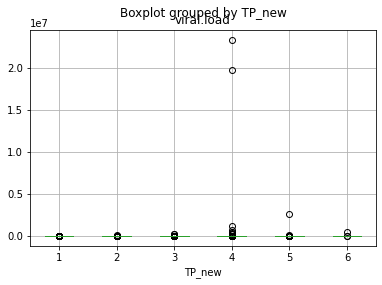

In [331]:
df[(df['Sample.class'] == 'clinical sample') & (df.TP_new != 'missed')].boxplot(column = 'viral.load', by='TP_new')

In [332]:
df['well_col'] = df['Well.Position'].str[0]
df['well_row'] = df['Well.Position'].str[1:]

Text(0, 0.5, 'Positivity Rate')

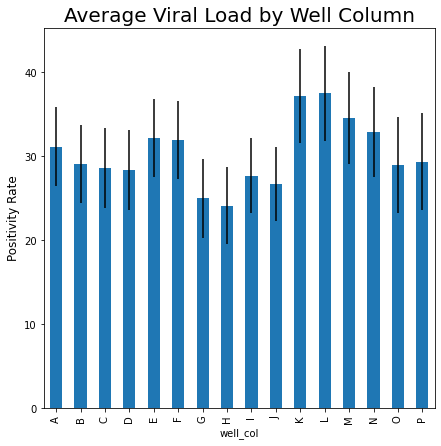

In [333]:
plt.figure(figsize=(7,7))

err = df[(df['Sample.class'] == 'clinical sample')].groupby('well_col').fecal_pos.sem()*200
(df[(df['Sample.class'] == 'clinical sample')].groupby('well_col').fecal_pos.mean()*100).plot(kind='bar', yerr=err)
        

plt.title('Average Viral Load by Well Column', fontsize=20)
#plt.xlabel('Time Between Runs', fontsize=12)
plt.ylabel('Positivity Rate', fontsize=12)

Text(0, 0.5, 'Positivity Rate')

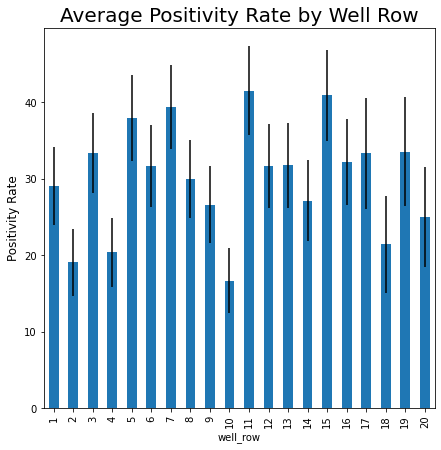

In [159]:
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

plt.figure(figsize=(7,7))

err = df[(df['Sample.class'] == 'clinical sample')].groupby('well_row').fecal_pos.sem().reindex(order)*200
(df[(df['Sample.class'] == 'clinical sample')].groupby('well_row').fecal_pos.mean().reindex(order)*100).plot(kind='bar', yerr=err)
        

plt.title('Average Positivity Rate by Well Row', fontsize=20)
#plt.xlabel('Time Between Runs', fontsize=12)
plt.ylabel('Positivity Rate', fontsize=12)

In [334]:
df['log_viral_load'] = -1
df.loc[df['viral.load'] > 0, 'log_viral_load'] = np.log10(df['viral.load'])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0, 0, '1.0'),
 Text(0, 1, '10.0'),
 Text(0, 2, '100.0'),
 Text(0, 3, '1000.0'),
 Text(0, 4, '10000.0'),
 Text(0, 5, '100000.0'),
 Text(0, 6, '1000000.0'),
 Text(0, 7, '10000000.0')]

<Figure size 504x504 with 0 Axes>

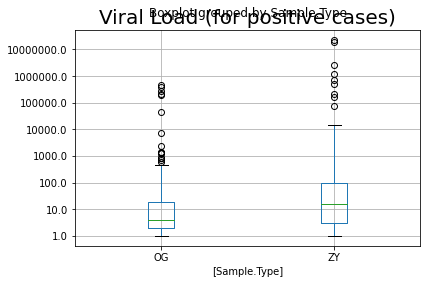

In [349]:
plt.figure(figsize=(7,7))
#ax = plt.subplot(1,1,1)

ax = df[(df['Sample.class'] == 'clinical sample') 
   & (df.TP_new != 'missed') 
   & (df.fecal_pos == 1) ].boxplot(column = 'log_viral_load', by=['Sample.Type'])


plt.title('Viral Load (for positive cases)', fontsize = 20)
#plt.xlabel('Viral Load', fontsize = 12)
ax.set_yticks(np.arange(0, 8))
ax.set_yticklabels(10.0**np.arange(0, 8))
#plt.ylabel('Histogram', fontsize = 12)


In [155]:
df[(df['Sample.class'] == 'clinical sample')].groupby('well_row').fecal_pos.sem()

well_row
1     0.025422
10    0.021133
11    0.029294
12    0.027657
13    0.027877
14    0.026623
15    0.029652
16    0.028186
17    0.036478
18    0.031752
19    0.035685
2     0.021992
20    0.032733
3     0.026230
4     0.022410
5     0.028071
6     0.026902
7     0.027355
8     0.025657
9     0.025057
Name: fecal_pos, dtype: float64

In [355]:
pd.DataFrame(df[(df['Sample.class'] == 'clinical sample') & (df['Target.Name'] == 'N1gene')].groupby(['TP_new','Sample.Type']).fecal_pos.sem()*200)

fecal_pos
TP_new Sample.Type           
1      OG            6.997003
       ZY            6.866246
2      OG            7.739087
       ZY            8.364992
3      OG            6.706465
       ZY            7.963077
4      OG           10.000000
       ZY            9.243675
5      OG           10.976784
       ZY            5.127331
6      ZY            6.080051
missed OG           50.000000
       ZY           57.735027

In [356]:
df_temp = df[(df['Sample.class'] == 'clinical sample') & (df['Target.Name'] == 'N1gene') & (df['TP_new'] == '1')][['Study.ID', 'Sample.Type', 'viral.load', 'fecal_pos']].copy()

In [357]:
df2 = pd.merge(df_temp, df_temp.groupby('Study.ID')['Sample.Type'].nunique(), on='Study.ID')

In [358]:
df3 = pd.merge(
    df2[(df2['Sample.Type_y'] == 2) & (df2['Sample.Type_x'] == 'OG')].groupby('Study.ID')[['viral.load', 'fecal_pos']].mean(),
    df2[(df2['Sample.Type_y'] == 2) & (df2['Sample.Type_x'] == 'ZY')].groupby('Study.ID')[['viral.load', 'fecal_pos']].mean(),
    on = 'Study.ID')

In [359]:
df3

,viral.load_x,fecal_pos_x,viral.load_y,fecal_pos_y
Study.ID,,,,
55619-118,0.000000,0.0,3.00,1.00
55619-119,0.000000,0.0,1.00,1.00
55619-120,19.000000,1.0,937.00,1.00
55619-126,43.500000,1.0,0.50,0.50
55619-127,2.000000,1.0,20.00,1.00
55619-135,0.000000,0.0,0.00,0.00
55619-138,1.500000,1.0,3.00,1.00
55619-166,0.000000,0.0,0.00,0.00
55619-168,3.000000,1.0,169.00,1.00


Text(0.5, 1.0, '')

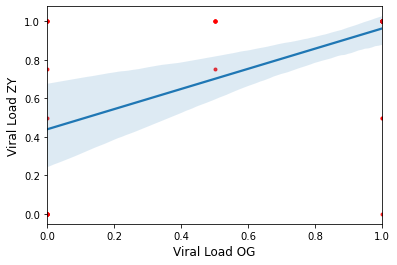

In [360]:
xx=df3['fecal_pos_x']
yy=df3['fecal_pos_y']
sns.regplot(x=xx, y=yy, order=1, ci=95, scatter_kws={'color':'r', 's':9})
plt.xlabel('Viral Load OG', fontsize = 12)
plt.ylabel('Viral Load ZY', fontsize = 12)
plt.title('', fontsize=18)

In [373]:
df3

,viral.load_x,fecal_pos_x,viral.load_y,fecal_pos_y
Study.ID,,,,
55619-118,0.000000,0.0,3.00,1.00
55619-119,0.000000,0.0,1.00,1.00
55619-120,19.000000,1.0,937.00,1.00
55619-126,43.500000,1.0,0.50,0.50
55619-127,2.000000,1.0,20.00,1.00
55619-135,0.000000,0.0,0.00,0.00
55619-138,1.500000,1.0,3.00,1.00
55619-166,0.000000,0.0,0.00,0.00
55619-168,3.000000,1.0,169.00,1.00


Text(0.5, 1.0, '')

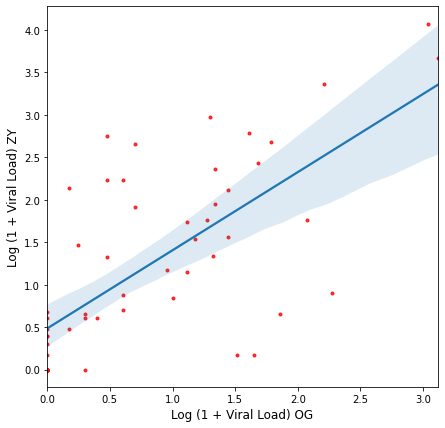

In [387]:
plt.figure(figsize=(7,7))
xx=np.log10(1 + df3['viral.load_x'])
yy=np.log10(1 + df3['viral.load_y'])
ax = sns.regplot(x=xx, y=yy, order=1, ci=95, scatter_kws={'color':'r', 's':9})
#ax.set_yscale('symlog') 
#ax.set_xscale('symlog')  
ax.set_xlabel('Log (1 + Viral Load) OG', fontsize = 12)
ax.set_ylabel('Log (1 + Viral Load) ZY', fontsize = 12)
ax.set_title('', fontsize=18)
#ax.set_aspect('equal')
#ax.set_xlim([-0.1,4.1])
#ax.set_ylim([-0.1,4.1])

In [388]:
df3['fecal_pos_OG'] = (df3.fecal_pos_x == 1).astype(int)
df3['fecal_pos_ZY'] = (df3.fecal_pos_y == 1).astype(int)

In [389]:
import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [390]:
tab = pd.crosstab(df3['fecal_pos_OG'], df3['fecal_pos_ZY'])

fisher_exact(tab)

(11.6, 0.00046568728901957845)

In [391]:
tab

fecal_pos_ZY,0,1
fecal_pos_OG,,
0,12,10
1,3,29


In [392]:
df3[(df3.fecal_pos_y < 1) & (df3.fecal_pos_y > 0)]

,viral.load_x,fecal_pos_x,viral.load_y,fecal_pos_y,fecal_pos_OG,fecal_pos_ZY
Study.ID,,,,,,
55619-126,43.50,1.0,0.50,0.50,1,0
55619-253,0.00,0.0,3.75,0.75,0,0
55619-264,32.00,1.0,0.50,0.50,1,0
55619-271,0.00,0.0,0.50,0.50,0,0
55619-275,0.75,0.5,28.25,0.75,0,0


In [393]:
6/54*100

11.11111111111111

In [ ]:
df3 = pd.merge(
    df2[(df2['Sample.Type_y'] == 2) & (df2['Sample.Type_x'] == 'OG')].groupby('Study.ID')[['viral.load', 'fecal_pos']].mean(),
    df2[(df2['Sample.Type_y'] == 2) & (df2['Sample.Type_x'] == 'ZY')].groupby('Study.ID')[['viral.load', 'fecal_pos']].mean(),
    on = 'Study.ID')

In [394]:
df2 = df[(df['Sample.class'] == 'clinical sample') & (df['Sample.Type'] == 'ZY')][['Study.ID', 'Target.Name', 'TP_new', 'viral.load', 'fecal_pos']].copy()

In [400]:
df3 = pd.merge(
    df2[(df2['Target.Name'] == 'N1gene')].groupby(['Study.ID', 'TP_new'])[['viral.load', 'fecal_pos']].mean(),
    df2[(df2['Target.Name'] == 'N2gene')].groupby(['Study.ID', 'TP_new'])[['viral.load', 'fecal_pos']].mean(),
    on = ['Study.ID', 'TP_new'])

Text(0.5, 1.0, '')

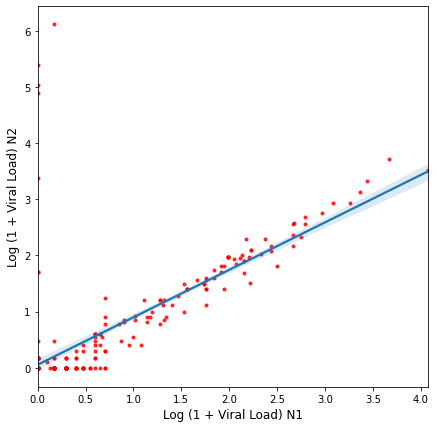

In [401]:
plt.figure(figsize=(7,7))
xx=np.log10(1 + df3['viral.load_x'])
yy=np.log10(1 + df3['viral.load_y'])
ax = sns.regplot(x=xx, y=yy, order=1, ci=95, scatter_kws={'color':'r', 's':9})
#ax.set_yscale('symlog') 
#ax.set_xscale('symlog')  
ax.set_xlabel('Log (1 + Viral Load) N1', fontsize = 12)
ax.set_ylabel('Log (1 + Viral Load) N2', fontsize = 12)
ax.set_title('', fontsize=18)

In [289]:
df3['fecal_pos_N1'] = (df3.fecal_pos_x > 0).astype(int)
df3['fecal_pos_RDRP'] = (df3.fecal_pos_y > 0).astype(int)

In [290]:
tab = pd.crosstab(df3['fecal_pos_N1'], df3['fecal_pos_RDRP'])

fisher_exact(tab)

(33.88433734939759, 2.940151848263878e-26)

In [291]:
tab

fecal_pos_RDRP,0,1
fecal_pos_N1,,
0,158,5
1,83,89


In [278]:
df2.groupby('Target.Name').size()

Target.Name
Egene       702
N1gene      702
N2gene      702
RDRPgene    702
dtype: int64

In [402]:
df.columns

Index(['Well', 'Well.Position', 'Sample.Name', 'Target.Name', 'CT', 'Rawdata',
       'plate', 'Study.ID', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'TP_new', 'Stool.ID',
       'TP_old', 'Sample.Type', 'Box', 'Column', 'Row', 'dateRNAExtracted',
       'extractedBy', 'samplePlate', 'samplePlatePosition',
       'qRT.PCR_PlateEgene_1', 'qRT.PCR_PlateEgene_2',
       'qRT.PCR_PlateRdRPgene_1', 'qRT.PCR_PlateRdRPgene_2',
       'qRT.PCR_PlateN1gene_1', 'qRT.PCR_PlateN1gene_2',
       'qRT.PCR_PlateN2gene_1', 'qRT.PCR_PlateN2gene_2',
       'qRT.PCR_PlatesgRNA_1', 'qRT.PCR_PlatesgRNA_2', 'Notes...30',
       'Notes...31', 'Sample.class', 'viral.load', 'efficiency', 'fecal_pos',
       'well_col', 'well_row', 'log_viral_load'],
      dtype='object')

In [405]:
df.groupby('Sample.class').size()

Sample.class
H2O                 432
clinical sample    5520
control             560
lob                 512
standard           1152
dtype: int64

In [412]:
df['duplication'] = df.groupby(['Target.Name', 'Study.ID', 'Sample.class', 'TP_new', 'Sample.Type' ])['viral.load'].rank(method='first', ascending=False)

In [414]:
df.groupby('duplication').size()

duplication
1.0       2617
2.0       2617
3.0        137
4.0        137
5.0          9
          ... 
2652.0       1
2653.0       1
2654.0       1
2655.0       1
2656.0       1
Length: 2656, dtype: int64

In [419]:
df[(df.duplication>2) & (df['Sample.class'] == 'clinical sample')].groupby(['Study.ID', 'TP_new']).size()

Study.ID   TP_new
55619-001  5          8
55619-016  5         16
55619-112  1          8
55619-115  1          8
55619-127  2          8
55619-133  1          8
55619-141  2          8
55619-144  1          8
55619-145  2         16
55619-165  1          8
55619-200  5         16
55619-215  3         16
55619-221  2         16
55619-232  2          8
           3          8
55619-253  1         16
55619-273  1          8
55619-274  1         24
55619-275  1         16
55619-284  3         16
55619-306  1          8
55619-312  4          8
55619-316  4          8
55619-339  2          8
           4          8
55619-346  3          8
dtype: int64

In [430]:
df_temp = df[(df['viral.load']>1000) & (df.duplication == 1) & (df['Sample.class'] == 'clinical sample')][['Target.Name', 'Study.ID', 'Sample.class', 'TP_new', 'Sample.Type', 'viral.load']]

In [431]:
df_temp_2 = df[(df.duplication == 2)][['Target.Name', 'Study.ID', 'Sample.class', 'TP_new', 'Sample.Type', 'viral.load']]

In [434]:
pd.merge(df_temp, df_temp_2, on=['Target.Name', 'Study.ID', 'Sample.class', 'TP_new', 'Sample.Type']).sort_values(by='viral.load_x', ascending=False)

,Target.Name,Study.ID,Sample.class,TP_new,Sample.Type,viral.load_x,viral.load_y
39,RDRPgene,55619-312,clinical sample,4,ZY,23345623,0
36,RDRPgene,55619-012,clinical sample,4,ZY,19728028,0
42,N2gene,55619-275,clinical sample,5,ZY,2670426,0
31,Egene,55619-183,clinical sample,4,ZY,1176918,0
35,Egene,55619-012,clinical sample,4,ZY,734297,0
44,N2gene,55619-134,clinical sample,6,ZY,489059,0
33,Egene,55619-012,clinical sample,4,OG,458139,0
41,N2gene,55619-319,clinical sample,4,OG,393722,0
32,Egene,55619-183,clinical sample,4,OG,285840,0
29,N2gene,55619-252,clinical sample,3,ZY,217575,0


In [436]:
df[(df['viral.load']>0) & (df['Sample.class'] == 'clinical sample')].sort_values(by='viral.load')

,Well,Well.Position,Sample.Name,Target.Name,CT,Rawdata,plate,Study.ID,Date.Collected,Date.of.enrollment,...,Notes...30,Notes...31,Sample.class,viral.load,efficiency,fecal_pos,well_col,well_row,log_viral_load,duplication
8156,313,N1,COVRNA0685,N1gene,36,36.387955776866434,plate12,55619-218,03/23/2021,06/17/2020,...,NaN,NaN,clinical sample,1,0.1,1,N,1,0.000000,1.0
1585,106,E10,COVRNA0148,RDRPgene,38,37.58673095703125,plate3,55619-294,NaN,07/05/2020,...,NaN,NaN,clinical sample,1,0.1,1,E,10,0.000000,1.0
4389,222,J6,COVRNA0384,N2gene,39,38.982284545898438,plate6,55619-249,NaN,06/26/2020,...,NaN,NaN,clinical sample,1,0.1,1,J,6,0.000000,1.0
1560,81,D9,COVRNA0321,Egene,34,33.591014862060547,plate3,55619-233,07/08/2020,06/23/2020,...,NaN,NaN,clinical sample,1,0.1,1,D,9,0.000000,2.0
4391,224,J8,COVRNA0385,N2gene,39,38.618808746337891,plate6,55619-252,07/21/2020,06/28/2020,...,NaN,NaN,clinical sample,1,0.1,1,J,8,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,361,P1,COVRNA0473,Egene,9,8.7288675308227539,plate8,55619-012,09/24/2020,04/30/2020,...,NaN,NaN,clinical sample,734297,73429.7,1,P,1,5.865872,1.0
5096,1,A1,COVRNA0466,Egene,8,8.4178047180175781,plate8,55619-183,09/12/2020,06/04/2020,...,NaN,NaN,clinical sample,1176918,117691.8,1,A,1,6.070746,1.0
7913,58,C10,COVRNA0643,N2gene,11,11.264738066178868,plate12,55619-275,01/15/2021,07/01/2020,...,NaN,NaN,clinical sample,2670426,267042.6,1,C,10,6.426581,1.0
5457,362,P2,COVRNA0473,RDRPgene,11,11.017833709716797,plate8,55619-012,09/24/2020,04/30/2020,...,NaN,NaN,clinical sample,19728028,1972802.8,1,P,2,7.295084,1.0


# How similar are the various replications?

In [349]:
#df1 = pd.DataFrame(pd.read_csv('20210505_g_RNA_fulldata.csv'))
#df2 = pd.DataFrame(pd.read_csv('20210730_g_RNA_fulldata.csv')) #20210707



In [404]:
df1 = pd.DataFrame(pd.read_csv('20210730_g_RNA_fulldata.csv'))
df1.rename(columns={'Sample':'Sample.Name', 'Target':'Target.Name'}, inplace=True)
df = df1[(df1['Sample.class'] == 'clinical sample') & (df1['data.status'] == 'Available')].copy()

df['replicant'] = df['Sample.Name'] + '_' + df['Target.Name']

# enforce limit of blank
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.487) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.237) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.668) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.239) - 1), 'viral.load'] = 0

df['Date.Collected'].fillna('missing', inplace=True)

df['duplication'] = df.groupby(['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type' ])['viral.load'].rank(method='first', ascending=False)

(0.0, 2.0)

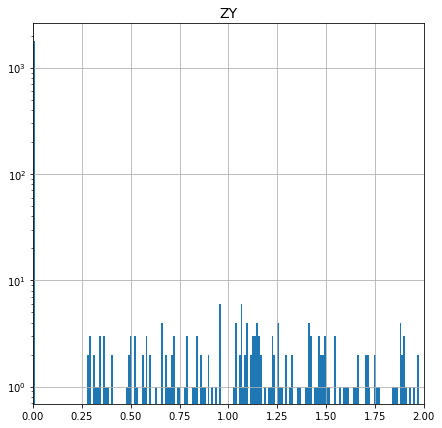

In [405]:
fig, ax = plt.subplots(figsize=(7,7))
df[(df['viral.load']<3) & (df['Sample.Type'] == 'ZY')]['viral.load'].hist(bins=300, ax=ax )

ax.set_yscale('log')
ax.set_title('ZY', fontsize=14)
ax.set_xlim([0,2])

In [406]:
df.groupby('duplication', dropna=False).size()

duplication
1.0    2606
2.0    2592
3.0      64
4.0      64
dtype: int64

In [408]:
df[(df.duplication==4) & (df['Target.Name'] == 'N1')][['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type', 'duplication']].sort_values(by=['Study.ID', 'TP_new'])

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,duplication
2284,N1,55619-112,5/13/20,1,OG,4.0
2300,N1,55619-115,5/13/20,1,OG,4.0
2286,N1,55619-127,5/26/20,2,OG,4.0
1101,N1,55619-133,5/24/20,1,OG,4.0
2301,N1,55619-141,missing,2,OG,4.0
1870,N1,55619-145,6/4/20,2,OG,4.0
7095,N1,55619-145,6/4/20,2,ZY,4.0
1950,N1,55619-165,5/28/20,1,OG,4.0
7112,N1,55619-215,missing,3,OG,4.0
7953,N1,55619-215,missing,3,ZY,4.0


In [409]:
df[(df['Study.ID'] == '55619-215') & (df['TP_new'] == '3') & (df['Sample.Type'] == 'ZY') ][['Target.Name', 'Study.ID', 'TP_new', 'Sample.Type', 'Well', 'Well.Position', 'Date.Collected', 'TIS', 'duplication' , 'viral.load']].sort_values(by=['Target.Name', 'duplication'])

,Target.Name,Study.ID,TP_new,Sample.Type,Well,Well.Position,Date.Collected,TIS,duplication,viral.load
8148,E,55619-215,3,ZY,75,D3,missing,28.0,1.0,1715.899499
8141,E,55619-215,3,ZY,51,C3,missing,28.0,2.0,1679.225981
7935,E,55619-215,3,ZY,249,K9,missing,28.0,3.0,625.111883
7922,E,55619-215,3,ZY,273,L9,missing,28.0,4.0,555.227268
8161,N1,55619-215,3,ZY,51,C3,missing,28.0,1.0,2088.673592
8156,N1,55619-215,3,ZY,75,D3,missing,28.0,2.0,1996.176919
7954,N1,55619-215,3,ZY,273,L9,missing,28.0,3.0,788.442850
7953,N1,55619-215,3,ZY,249,K9,missing,28.0,4.0,785.468636
8103,N2,55619-215,3,ZY,52,C4,missing,28.0,1.0,1316.087501
8093,N2,55619-215,3,ZY,76,D4,missing,28.0,2.0,1292.481100


In [133]:
df.columns

Index(['Well', 'Well.Position', 'Sample.Name', 'Target.Name', 'CT', 'Rawdata',
       'plate', 'Study.ID', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'TP_new', 'Stool.ID',
       'TP_old', 'Sample.Type', 'Box', 'Column', 'Row', 'dateRNAExtracted',
       'extractedBy', 'samplePlate', 'samplePlatePosition',
       'qRT.PCR_PlateEgene_1', 'qRT.PCR_PlateEgene_2',
       'qRT.PCR_PlateRdRPgene_1', 'qRT.PCR_PlateRdRPgene_2',
       'qRT.PCR_PlateN1gene_1', 'qRT.PCR_PlateN1gene_2',
       'qRT.PCR_PlateN2gene_1', 'qRT.PCR_PlateN2gene_2',
       'qRT.PCR_PlatesgRNA_1', 'qRT.PCR_PlatesgRNA_2', 'Notes...30',
       'Notes...31', 'Sample.class', 'viral.load', 'efficiency',
       'duplication'],
      dtype='object')

In [410]:
df1 = df[df.duplication == 1][['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'viral.load']]
df2 = df[df.duplication == 2][['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type', 'viral.load']]
df3 = df[df.duplication == 3][['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'viral.load']]
df4 = df[df.duplication == 4][['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type', 'viral.load']]

df12 = pd.merge(df1, df2,  on=['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type'])
df34 = pd.merge(df3, df4, on=['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type'])

In [411]:
temp = pd.concat([df12, df34]).rename(columns = {'viral.load_x':'R1', 'viral.load_y':'R2'})
temp2 = pd.DataFrame(temp.groupby(['Target.Name', 'Study.ID', 'TP_new', 'Sample.Type']).size())

df_clean = pd.merge(temp, temp2, on=['Target.Name', 'Study.ID', 'TP_new', 'Sample.Type'])

df_clean.rename(columns = {0:'MultipleSamples'}, inplace=True)
df_clean['MultipleSamples'] = df_clean['MultipleSamples'] - 1

In [412]:
df_clean.sort_values(by=['Study.ID','TP_new', 'Sample.Type' , 'Target.Name'], inplace=True)


In [413]:
df_clean[df_clean.MultipleSamples == 2]

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,MultipleSamples
1548,N1,55619-200,1/9/21,5,ZY,6/11/20,-7.0,219.0,212.0,5,0.000000,0.000000,2
1549,N1,55619-200,2/10/21,5,ZY,6/11/20,-7.0,251.0,244.0,5,0.000000,0.000000,2
1550,N1,55619-200,1/8/21,5,ZY,6/11/20,-7.0,218.0,211.0,5,0.000000,0.000000,2
1487,N2,55619-200,1/8/21,5,ZY,6/11/20,-7.0,218.0,211.0,5,0.000000,0.000000,2
1488,N2,55619-200,1/9/21,5,ZY,6/11/20,-7.0,219.0,212.0,5,0.000000,0.000000,2
1489,N2,55619-200,2/10/21,5,ZY,6/11/20,-7.0,251.0,244.0,5,0.000000,0.000000,2
228,E,55619-274,7/6/20,1,OG,7/1/20,-9.0,14.0,5.0,2,0.000000,0.000000,2
229,E,55619-274,7/1/20,1,OG,7/1/20,-9.0,9.0,0.0,2,21.852368,21.116961,2
230,E,55619-274,7/1/20,1,OG,7/1/20,-9.0,9.0,0.0,2,0.000000,0.000000,2
1853,N1,55619-274,7/6/20,1,OG,7/1/20,-9.0,14.0,5.0,2,0.825553,0.000000,2


In [414]:
df_clean['cov_pos'] = ((df_clean.R1 > 0) & 
                      (df_clean.R2 > 0) ).astype(int)

df_clean['R1_pos'] = (df_clean.R1 > 0).astype(int)
df_clean['R2_pos'] = (df_clean.R2 > 0).astype(int)

df_clean['avg_viral_load'] = (df_clean.R1 + df_clean.R2) / 2 * df_clean.cov_pos
df_clean['log_avg_viral_load'] = np.log10(1+df_clean.avg_viral_load)

In [415]:
#df_clean = df_clean.sample(frac=1).reset_index(drop=True)

df_clean.sort_values(by=['Study.ID','TP_new', 'Sample.Type' , 'Target.Name'], inplace=True)
df_clean['include'] = 1

df_clean.loc[df_clean.MultipleSamples == 1, 'include'] = (df_clean[df_clean.MultipleSamples == 1]['include'].rank(method='first') % 2 == 0).astype(int)
df_clean.loc[df_clean.MultipleSamples == 2, 'include'] = (df_clean[df_clean.MultipleSamples == 2]['include'].rank(method='first') % 3 == 0).astype(int)

In [416]:
df_clean.groupby(['MultipleSamples', 'include']).size()

MultipleSamples  include
0                1          2380
1                0           129
                 1           129
2                0            12
                 1             6
dtype: int64

In [417]:
df_clean['Study.ID'].nunique()

113

In [419]:
df_clean[(df_clean.MultipleSamples == 2) & (df_clean['Target.Name'] == 'N1')][['Study.ID', 
                                                                                   'Date.Collected', 
                                                                                   'TP_new', 
                                                                                   'Sample.Type', 'include']]

,Study.ID,Date.Collected,TP_new,Sample.Type,include
1548,55619-200,1/9/21,5,ZY,0
1549,55619-200,2/10/21,5,ZY,0
1550,55619-200,1/8/21,5,ZY,1
1853,55619-274,7/6/20,1,OG,0
1854,55619-274,7/1/20,1,OG,0
1855,55619-274,7/1/20,1,OG,1


In [420]:
tp_5 = set(df_clean[df_clean.TP_new == '5']['Study.ID'])
tp_4 = set(df_clean[df_clean.TP_new == '4']['Study.ID'])
tp_3 = set(df_clean[df_clean.TP_new == '3']['Study.ID'])
tp_2 = set(df_clean[df_clean.TP_new == '2']['Study.ID'])
tp_1 = set(df_clean[df_clean.TP_new == '1']['Study.ID'])

all_tps = set.intersection(tp_1, tp_2, tp_3, tp_4, tp_5)


#temp = df_clean[(df_clean.include == 1) & (df_clean['Study.ID'].isin(all_tps))]

In [421]:
len(all_tps)

31

In [424]:
df_clean[(df_clean['Study.ID'] == '55619-001') 
& (df_clean['Target.Name'] == 'N1') 
& (df_clean['TP_new'] == '5') 
& (df_clean['Sample.Type'] == 'ZY')]

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,MultipleSamples,cov_pos,R1_pos,R2_pos,avg_viral_load,log_avg_viral_load,include
1382,N1,55619-001,10/23/20,5,ZY,4/25/20,0.0,181.0,181.0,5,0.0,0.0,1,0,0,0,0.0,0.0,0
1383,N1,55619-001,10/24/20,5,ZY,4/25/20,0.0,182.0,182.0,5,0.0,0.0,1,0,0,0,0.0,0.0,1


In [423]:
df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,MultipleSamples,cov_pos,R1_pos,R2_pos,avg_viral_load,log_avg_viral_load,include
203,E,55619-001,4/26/20,1,OG,4/25/20,0.0,1.0,1.0,1,0.0,0.0,0,0,0,0,0.0,0.0,1
275,N1,55619-001,4/26/20,1,OG,4/25/20,0.0,1.0,1.0,1,0.0,0.0,0,0,0,0,0.0,0.0,1
276,N2,55619-001,4/26/20,1,OG,4/25/20,0.0,1.0,1.0,1,0.0,0.0,0,0,0,0,0.0,0.0,1
204,RdRP,55619-001,4/26/20,1,OG,4/25/20,0.0,1.0,1.0,1,0.0,0.0,0,0,0,0,0.0,0.0,1
64,E,55619-001,5/5/20,2,OG,4/25/20,0.0,10.0,10.0,2,0.0,0.0,0,0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,RdRP,55619-346,11/14/20,4,ZY,7/17/20,-14.0,134.0,120.0,4,0.0,0.0,0,0,0,0,0.0,0.0,1
1682,E,55619-346,2/6/21,5,ZY,7/17/20,-14.0,218.0,204.0,5,0.0,0.0,0,0,0,0,0.0,0.0,1
1570,N1,55619-346,2/6/21,5,ZY,7/17/20,-14.0,218.0,204.0,5,0.0,0.0,0,0,0,0,0.0,0.0,1
1571,N2,55619-346,2/6/21,5,ZY,7/17/20,-14.0,218.0,204.0,5,0.0,0.0,0,0,0,0,0.0,0.0,1


In [155]:
df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') & (df_clean['Study.ID'].isin(all_tps))]

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,MultipleSamples,cov_pos,avg_viral_load,log_avg_viral_load,include
325,Egene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
463,N1gene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
464,N2gene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
326,RDRPgene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
89,Egene,55619-001,05/05/2020,2,OG,04/25/2020,0.0,10.0,10.0,2,0.0,0.0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,RDRPgene,55619-345,11/07/2020,4,ZY,07/17/2020,-3.0,116.0,113.0,4,0.0,0.0,0,0,0.0,0.0,1
2558,Egene,55619-345,02/06/2021,5,ZY,07/17/2020,-3.0,207.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1
2670,N1gene,55619-345,02/06/2021,5,ZY,07/17/2020,-3.0,207.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1
2671,N2gene,55619-345,02/06/2021,5,ZY,07/17/2020,-3.0,207.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1


Text(0, 0.5, 'Frac Positive')

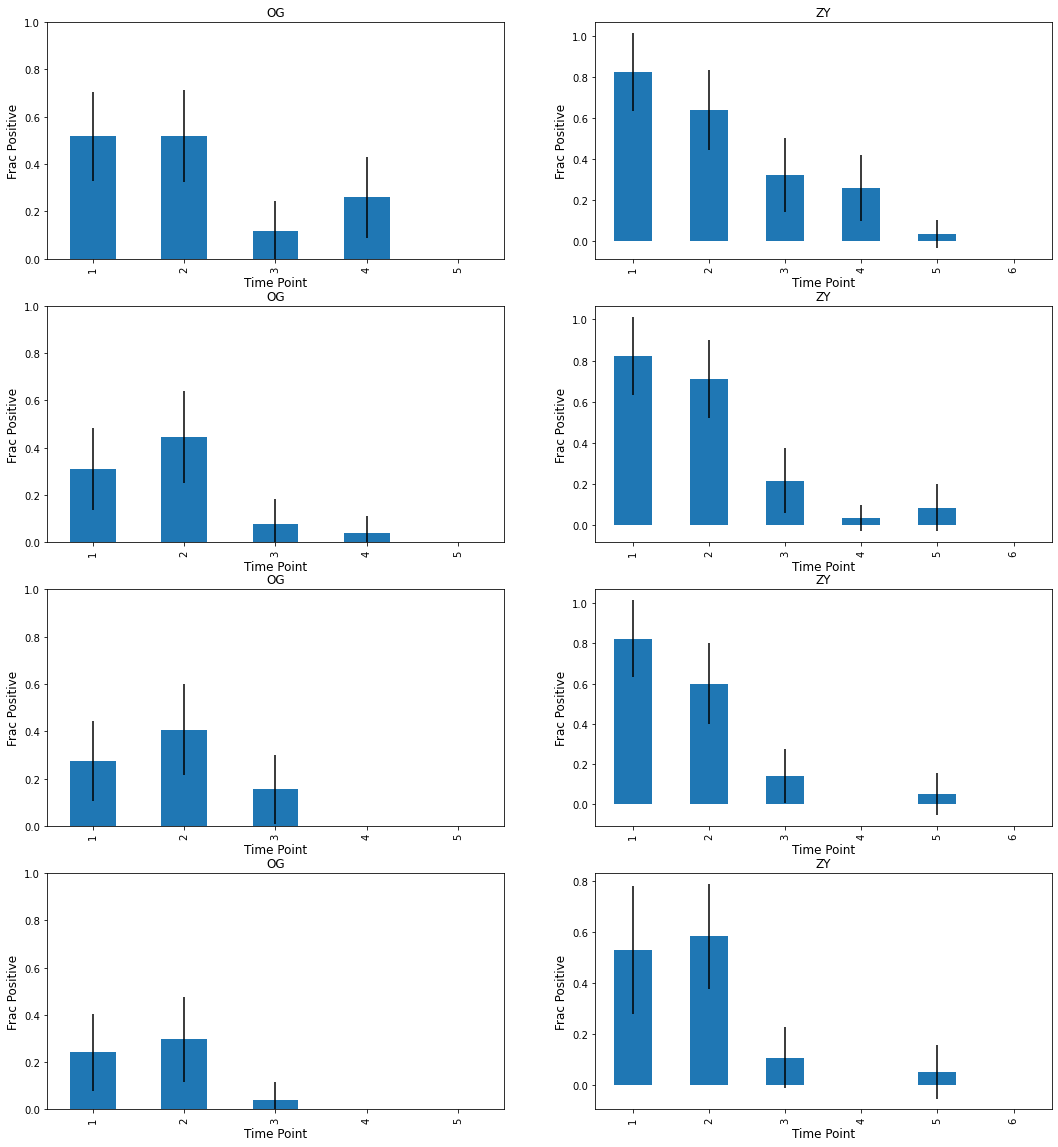

In [427]:
temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') & (df_clean['Study.ID'].isin(all_tps))]
#temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]

plt.figure(figsize=(18,20))

df_temp = temp[(temp['Target.Name'] == 'N1')].copy()

plt.subplot(4, 2, 1)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 2)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
#plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)




df_temp = temp[(temp['Target.Name'] == 'N2')].copy()

plt.subplot(4, 2, 3)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 4)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
#plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'E')].copy()

plt.subplot(4, 2, 5)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 6)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
#plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'RdRP')].copy()

plt.subplot(4, 2, 7)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 8)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
#plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



Text(0, 0.5, 'Log10(1 + viral load)')

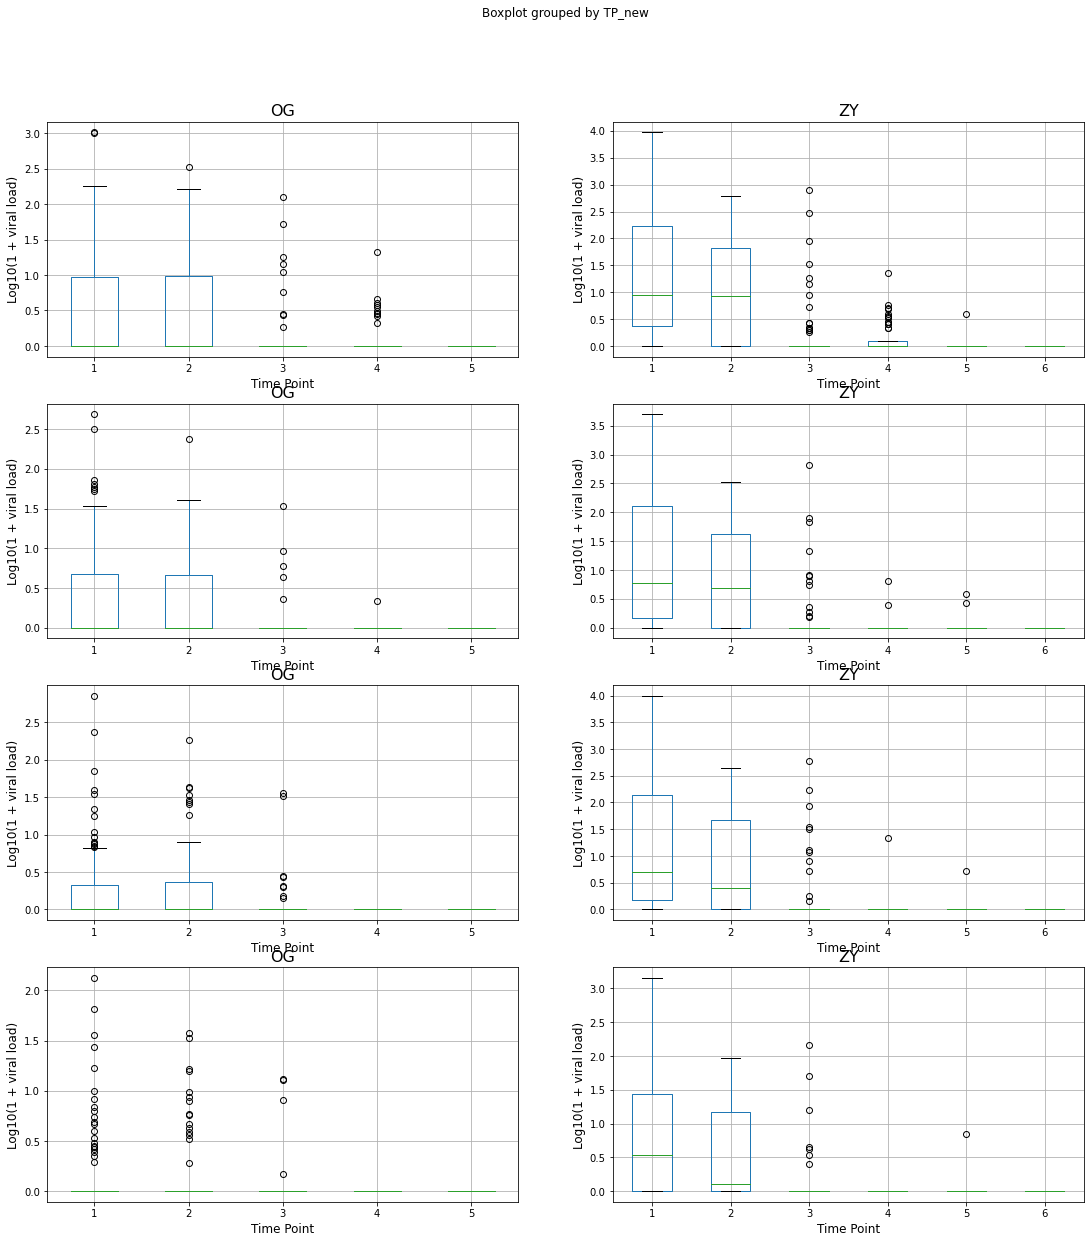

In [428]:
#temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') & (df_clean['Study.ID'].isin(all_tps))]
temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]

fig, axes = plt.subplots(4,2, figsize=(18,20))


df_temp = temp[(temp['Target.Name'] == 'N1')].copy()

ax1 = axes.flatten()[0]
df_temp[df_temp['Sample.Type'] == 'OG'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax1)
ax1.set_title('OG', fontsize=16)
ax1.set_xlabel('Time Point', fontsize=12)
ax1.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax2 = axes.flatten()[1]
df_temp[df_temp['Sample.Type'] == 'ZY'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax2)
ax2.set_title('ZY', fontsize=16)
ax2.set_xlabel('Time Point', fontsize=12)
ax2.set_ylabel('Log10(1 + viral load)', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'N2')].copy()

ax3 = axes.flatten()[2]
df_temp[df_temp['Sample.Type'] == 'OG'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax3)
ax3.set_title('OG', fontsize=16)
ax3.set_xlabel('Time Point', fontsize=12)
ax3.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax4 = axes.flatten()[3]
df_temp[df_temp['Sample.Type'] == 'ZY'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax4)
ax4.set_title('ZY', fontsize=16)
ax4.set_xlabel('Time Point', fontsize=12)
ax4.set_ylabel('Log10(1 + viral load)', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'E')].copy()

ax5 = axes.flatten()[4]
df_temp[df_temp['Sample.Type'] == 'OG'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax5)
ax5.set_title('OG', fontsize=16)
ax5.set_xlabel('Time Point', fontsize=12)
ax5.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax6 = axes.flatten()[5]
df_temp[df_temp['Sample.Type'] == 'ZY'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax6)
ax6.set_title('ZY', fontsize=16)
ax6.set_xlabel('Time Point', fontsize=12)
ax6.set_ylabel('Log10(1 + viral load)', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'RdRP')].copy()

ax7 = axes.flatten()[6]
df_temp[df_temp['Sample.Type'] == 'OG'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax7)
ax7.set_title('OG', fontsize=16)
ax7.set_xlabel('Time Point', fontsize=12)
ax7.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax8 = axes.flatten()[7]
df_temp[df_temp['Sample.Type'] == 'ZY'].boxplot(column = 'log_avg_viral_load', by=['TP_new'], ax=ax8)
ax8.set_title('ZY', fontsize=16)
ax8.set_xlabel('Time Point', fontsize=12)
ax8.set_ylabel('Log10(1 + viral load)', fontsize=12)

#plt.tight_layout()

In [160]:
#df_clean['log_r1'] = np.log10(1 + df_clean.R1)
#df_clean['log_r2'] = np.log10(1 + df_clean.R3)

<Figure size 504x504 with 0 Axes>

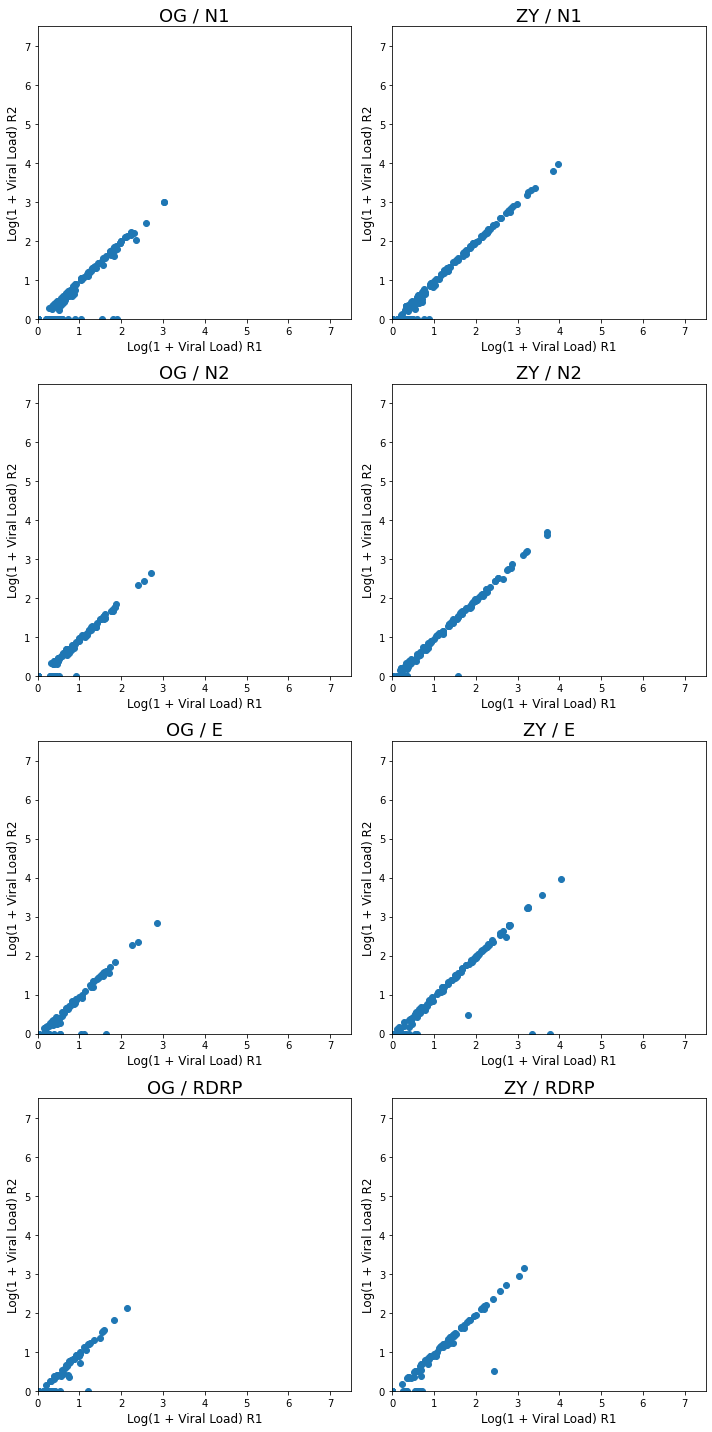

In [431]:
plt.figure(figsize=(7,7))

plt.subplots(4,2, figsize=(10,20))


plt.subplot(4,2,1)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('OG / N1', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])


plt.subplot(4,2,2)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('ZY / N1', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])


plt.subplot(4,2,3)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N2')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N2')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('OG / N2', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])


plt.subplot(4,2,4)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N2')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N2')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('ZY / N2', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])



plt.subplot(4,2,5)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'E')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'E')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('OG / E', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])


plt.subplot(4,2,6)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'E')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'E')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('ZY / E', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])



plt.subplot(4,2,7)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'RdRP')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'RdRP')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('OG / RDRP', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])


plt.subplot(4,2,8)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'RdRP')].R1)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'RdRP')].R2)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) R1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) R2', fontsize = 12)
plt.title('ZY / RDRP', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])

plt.tight_layout()

In [443]:
df_temp = df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'E')].copy()
len(df_temp[df_temp.R1_pos == df_temp.R2_pos].index) / len(df_temp.index)*100

96.35258358662614

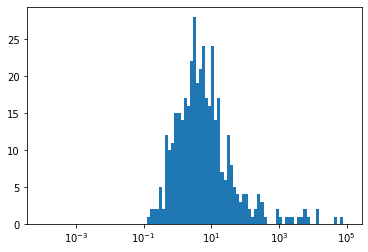

In [162]:
data = (df_clean[df_clean.R1 > 10].R1 - df_clean[df_clean.R1 > 10].R2+.1)

plt.hist(data, bins=np.logspace(np.log10(0.0001),np.log10(100000.0), 100))
plt.gca().set_xscale("log")
plt.show()

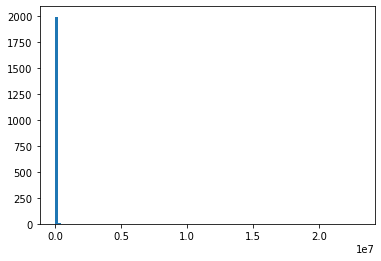

In [163]:
data = (df_clean[df_clean.R2 == 0].R1 - df_clean[df_clean.R2 == 0].R2)

plt.hist(data, bins=100)
#plt.gca().set_xscale("log")
plt.show()

Text(0, 0.5, 'Frac Positive')

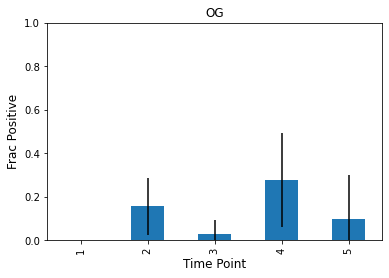

In [164]:
gene = 'N1gene'
sample = 'OG'

baseline_0 = set(df_clean[(df_clean.TP_new == '1') & (df_clean.cov_pos == 0) 
         & (df_clean['Target.Name'] == gene) & (df_clean['Sample.Type'] == sample) & (df_clean.include == 1)]['Study.ID'])

temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') & (df_clean['Study.ID'].isin(baseline_0 ))]
#temp = df_clean[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]


df_temp = temp[(temp['Target.Name'] == gene)].copy()


err = 2 * df_temp[df_temp['Sample.Type'] == sample].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == sample].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title(sample)
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)


In [165]:
data.groupby(data==0).size()

False     211
True     1795
dtype: int64

(0.0, 7.5)

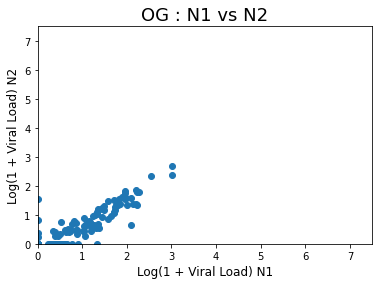

In [166]:
xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1gene')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N2gene')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) N2', fontsize = 12)
plt.title('OG : N1 vs N2', fontsize=18)
plt.xlim([0,7.5])
plt.ylim([0,7.5])

ValueError: x and y must be the same size

<Figure size 504x504 with 0 Axes>

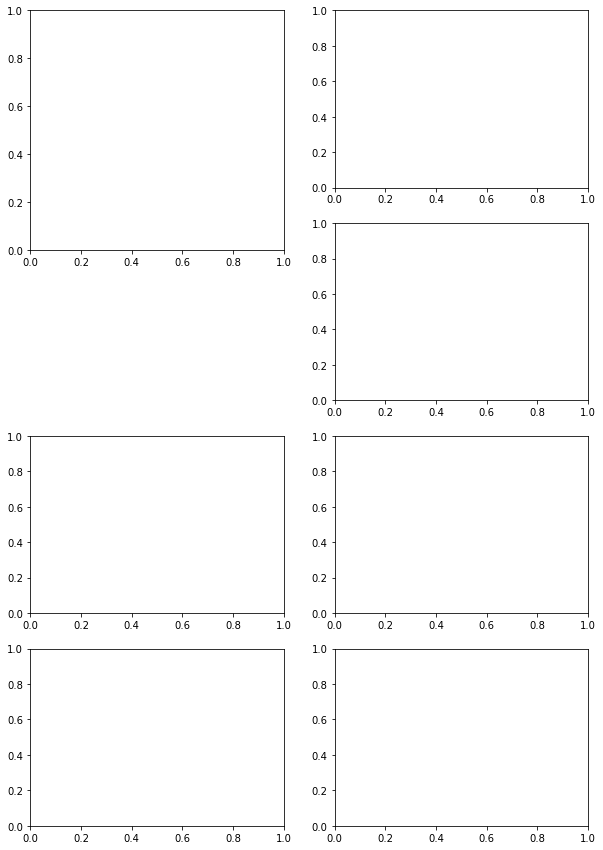

In [444]:
plt.figure(figsize=(7,7))

plt.subplots(4,2, figsize=(10,15))


plt.subplot(3,2,1)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N2')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) N2', fontsize = 12)
plt.title('OG : N1 vs N2', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])


plt.subplot(3,2,2)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N2')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) N2', fontsize = 12)
plt.title('ZY : N1 vs N2', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])



plt.subplot(3,2,3)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'E')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) E', fontsize = 12)
plt.title('OG : N1 vs E', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])


plt.subplot(3,2,4)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'E')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) E', fontsize = 12)
plt.title('ZY : N1 vs E', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])



plt.subplot(3,2,5)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'OG') & (df_clean['Target.Name'] == 'RdRP')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) RDRP', fontsize = 12)
plt.title('OG : N1 vs RDRP', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])


plt.subplot(3,2,6)

xx=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1')].avg_viral_load)
yy=np.log10(1 + df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'RdRP')].avg_viral_load)

plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) N1', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) RDRP', fontsize = 12)
plt.title('ZY : N1 vs RDRP', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])



plt.tight_layout()

In [168]:
t1 = df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N1gene') & (df_clean['cov_pos'] == 1)]
t2 = df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N2gene') & (df_clean['cov_pos'] == 0)]

tt = pd.merge(t1[['Study.ID', 'Date.Collected', 'TP_new', 'R1', 'R2']],
         t2[['Study.ID', 'Date.Collected', 'TP_new', 'R1', 'R2']],
         on = ['Study.ID', 'Date.Collected', 'TP_new'])

tt['N1: Replication 1'] = np.round(tt.R1_x,3)
tt['N1: Replication 2'] = np.round(tt.R2_x,3)
tt['N2: Replication 1'] = np.round(tt.R1_y,3)
tt['N2: Replication 2'] = np.round(tt.R2_y,3)

tt[['Study.ID', 'Date.Collected', 'TP_new',
    'N1: Replication 1', 'N1: Replication 2', 'N2: Replication 1', 'N2: Replication 2']].sort_values(by='N2: Replication 1')

,Study.ID,Date.Collected,TP_new,N1: Replication 1,N1: Replication 2,N2: Replication 1,N2: Replication 2
0,55619-004,09/09/2020,4,2.398,1.056,0.000,0.0
18,55619-303,10/10/2020,4,1.149,1.127,0.000,0.0
17,55619-287,10/14/2020,4,1.220,1.149,0.000,0.0
15,55619-279,10/13/2020,4,3.394,1.546,0.000,0.0
14,55619-270,10/24/2020,4,4.891,4.737,0.000,0.0
13,55619-258,10/24/2020,4,1.854,1.664,0.000,0.0
11,55619-218,10/02/2020,4,2.150,1.072,0.000,0.0
19,55619-315,missing,1,1.653,1.124,0.000,0.0
9,55619-195,01/08/2021,5,2.355,1.979,0.000,0.0
10,55619-200,01/08/2021,5,0.689,0.641,0.000,0.0


In [169]:
df_clean['Study.ID'].nunique()

113

In [170]:
t2 = df_clean[(df_clean['Sample.Type'] == 'ZY') & (df_clean['Target.Name'] == 'N2gene') & (df_clean['cov_pos'] == 1)]

In [171]:
df_clean

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,MultipleSamples,cov_pos,avg_viral_load,log_avg_viral_load,include
325,Egene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
463,N1gene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
464,N2gene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
326,RDRPgene,55619-001,04/26/2020,1,OG,04/25/2020,0.0,1.0,1.0,1,0.0,0.0,0,0,0.0,0.0,1
89,Egene,55619-001,05/05/2020,2,OG,04/25/2020,0.0,10.0,10.0,2,0.0,0.0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,RDRPgene,55619-346,11/14/2020,4,ZY,07/17/2020,-14.0,134.0,120.0,4,0.0,0.0,0,0,0.0,0.0,1
2534,Egene,55619-346,02/06/2021,5,ZY,07/17/2020,-14.0,218.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1
2646,N1gene,55619-346,02/06/2021,5,ZY,07/17/2020,-14.0,218.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1
2647,N2gene,55619-346,02/06/2021,5,ZY,07/17/2020,-14.0,218.0,204.0,5,0.0,0.0,0,0,0.0,0.0,1


(0.0, 5.0)

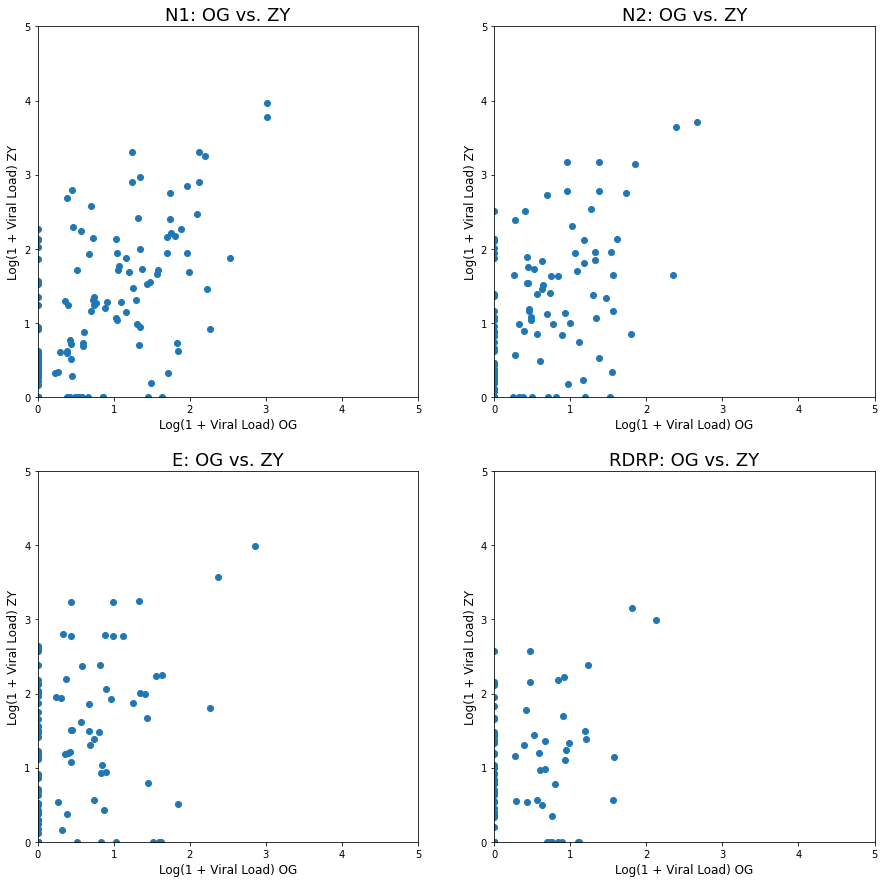

In [172]:
temp = pd.merge(df_clean[df_clean['Sample.Type'] == 'OG'][['Study.ID', 'Date.Collected', 'TP_new', 'Target.Name', 'avg_viral_load']],
         df_clean[df_clean['Sample.Type'] == 'ZY'][['Study.ID', 'Date.Collected', 'TP_new', 'Target.Name',  'avg_viral_load']],
         on=['Study.ID', 'Date.Collected', 'TP_new', 'Target.Name'])


plt.subplots(2, 2, figsize=(15,15))


plt.subplot(2, 2,1)

xx=np.log10(1 + temp[temp['Target.Name'] == 'N1gene'].avg_viral_load_x)
yy=np.log10(1 + temp[temp['Target.Name'] == 'N1gene'].avg_viral_load_y)


plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) OG', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) ZY', fontsize = 12)
plt.title('N1: OG vs. ZY', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])


plt.subplot(2, 2,2)

xx=np.log10(1 + temp[temp['Target.Name'] == 'N2gene'].avg_viral_load_x)
yy=np.log10(1 + temp[temp['Target.Name'] == 'N2gene'].avg_viral_load_y)


plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) OG', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) ZY', fontsize = 12)
plt.title('N2: OG vs. ZY', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])



plt.subplot(2, 2,3)

xx=np.log10(1 + temp[temp['Target.Name'] == 'Egene'].avg_viral_load_x)
yy=np.log10(1 + temp[temp['Target.Name'] == 'Egene'].avg_viral_load_y)


plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) OG', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) ZY', fontsize = 12)
plt.title('E: OG vs. ZY', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])



plt.subplot(2, 2,4)

xx=np.log10(1 + temp[temp['Target.Name'] == 'RDRPgene'].avg_viral_load_x)
yy=np.log10(1 + temp[temp['Target.Name'] == 'RDRPgene'].avg_viral_load_y)


plt.scatter(x=xx, y=yy)
plt.xlabel('Log(1 + Viral Load) OG', fontsize = 12)
plt.ylabel('Log(1 + Viral Load) ZY', fontsize = 12)
plt.title('RDRP: OG vs. ZY', fontsize=18)
plt.xlim([0,5])
plt.ylim([0,5])

In [16]:
xls = pd.ExcelFile('20210511_Metadata_Lambda.xlsx')

In [17]:
xls.sheet_names

['Sheet1', 'Sheet2']

In [18]:
df_symp = pd.read_excel(xls, 'Sheet1')

In [19]:
df_symp

,participant_id,sex,final_age,age_v,bmi,bmi_v,arm,arm_v,Seropositive_gt_0.108,sero_baseline_v,...,alt_210,ast_210,bilirubin_210,alkphos(35-105)_210_v,alt(10-35)_210_v,ast(10-35)_210_v,bill(<1.2)_210_v,lft_210_v,duration_v,TP
0,55619-001,1,55,2,57.000000,2.0,Saline placebo,0,not seropositive,0,...,31.0,31.0,0.9,1.0,0.0,0.0,0.0,1.0,142.0,4.0
1,55619-004,1,30,0,70.000000,2.0,Lambda,1,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,4.0
2,55619-012,1,55,2,67.000000,2.0,Saline placebo,0,not seropositive,0,...,28.0,28.0,0.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,55619-016,1,56,2,54.000000,2.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55619-108,0,21,0,24.934531,0.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,55619-337,0,56,2,26.289704,0.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,55619-339,0,54,2,22.594123,0.0,Saline placebo,0,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0
117,55619-344,0,34,1,24.369376,0.0,Lambda,1,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,3.0
118,55619-345,1,31,0,34.534042,2.0,Saline placebo,0,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_symp.columns

Index(['participant_id', 'sex', 'final_age', 'age_v', 'bmi', 'bmi_v', 'arm',
       'arm_v', 'Seropositive_gt_0.108', 'sero_baseline_v',
       'abpain_baseline_v', 'diarrhea_baseline_v', 'nausea_baseline_v',
       'vomiting_baseline_v', 'anygi_baseline_v', 'uppergi_baseline_v',
       'lowergi_baseline_v', 'abpain_LT120_v', 'diarrhea_LT120_v',
       'nausea_LT120_v', 'vomiting_LT120_v', 'anygi_LT120_v',
       'uppergi_LT120_v', 'lowergi_LT120_v', 'abpain_LT210_v',
       'diarrhea_LT210_v', 'nausea_LT210_v', 'vomiting_LT210_v',
       'anygi_LT210_v', 'uppergi_LT210_v', 'lowergi_LT210_v', 'abpain_0_28_v',
       'diarrhea_0_28_v', 'nausea_0_28_v', 'vomiting_0_28_v', 'anygi_0_28_v',
       'uppergi_0_28_v', 'lowergi_0_28_v', 'abpain_0_14_v', 'diarrhea_0_14_v',
       'nausea_0_14_v', 'vomiting_0_14_v', 'anygi_0_14_v', 'uppergi_0_14_v',
       'lowergi_0_14_v', 'abpain_14_28_v', 'diarrhea_14_28_v',
       'nausea_14_28_v', 'vomiting_14_28_v', 'anygi_14_28_v',
       'uppergi_14_28_v'

In [21]:
df = pd.merge(df_clean, 
              df_symp[['participant_id', 'sex', 'final_age', 'arm_v']], 
         left_on = 'Study.ID', right_on = 'participant_id')

NameError: name 'df_clean' is not defined

In [22]:
df['is_ZY'] = (df['Sample.Type'] == 'ZY').astype(int)
df['is_N2'] = (df['Target.Name'] == 'N2gene').astype(int)
df['is_E'] = (df['Target.Name'] == 'Egene').astype(int)
df['is_RDRP'] = (df['Target.Name'] == 'RDRPgene').astype(int)

In [188]:
df.groupby('TP_new').size()

TP_new
1         652
2         592
3         580
4         436
5         348
6          92
missed     16
dtype: int64

In [190]:
df1 = df[df.TP_new.isin(['1', '2'])][['Study.ID', 'Target.Name', 'TP_new', 'sex', 'final_age', 'arm_v', 
                                'is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'R1', 'R2' ]].describe()

In [191]:
df1

,sex,final_age,arm_v,is_ZY,is_N2,is_E,is_RDRP,R1,R2
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,0.424437,39.958199,0.491961,0.437299,0.250000,0.250000,0.250000,197.550530,67.361980
std,0.494456,13.911160,0.500136,0.496253,0.433187,0.433187,0.433187,2699.302387,469.735961
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820085,0.000000
75%,1.000000,53.000000,1.000000,1.000000,0.250000,0.250000,0.250000,15.443058,12.339648
max,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77399.395310,9272.518966


In [192]:
df1

,sex,final_age,arm_v,is_ZY,is_N2,is_E,is_RDRP,R1,R2
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,0.424437,39.958199,0.491961,0.437299,0.250000,0.250000,0.250000,197.550530,67.361980
std,0.494456,13.911160,0.500136,0.496253,0.433187,0.433187,0.433187,2699.302387,469.735961
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820085,0.000000
75%,1.000000,53.000000,1.000000,1.000000,0.250000,0.250000,0.250000,15.443058,12.339648
max,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77399.395310,9272.518966


In [ ]:
df1[]

Text(0, 0.5, 'Log10(1 + viral load)')

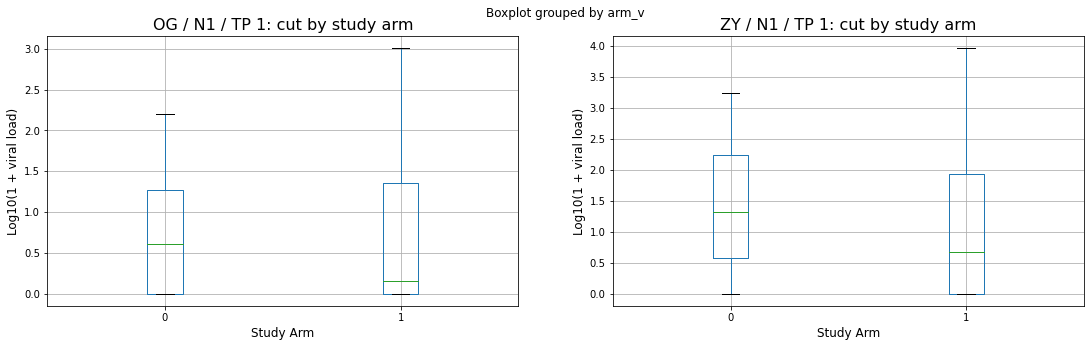

In [1316]:
fig, axes = plt.subplots(1,2, figsize=(18,5))

ax1 = axes.flatten()[0]
df[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['arm_v'], ax=ax1)
ax1.set_title('OG / N1 / TP 1: cut by study arm', fontsize=16)
ax1.set_xlabel('Study Arm', fontsize=12)
ax1.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax2 = axes.flatten()[1]
df[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['arm_v'], ax=ax2)
ax2.set_title('ZY / N1 / TP 1: cut by study arm', fontsize=16)
#plt.suptitle('')
ax2.set_xlabel('Study Arm', fontsize=12)
ax2.set_ylabel('Log10(1 + viral load)', fontsize=12)

Text(0, 0.5, 'Log10(1 + viral load)')

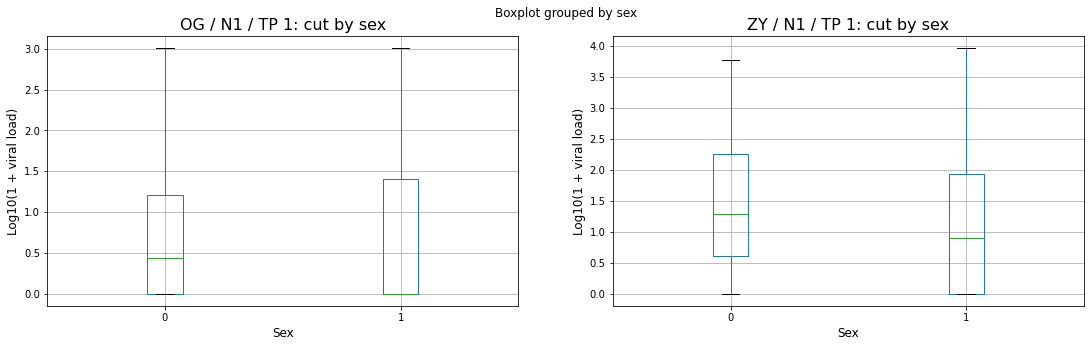

In [1317]:
fig, axes = plt.subplots(1,2, figsize=(18,5))

ax1 = axes.flatten()[0]
df[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['sex'], ax=ax1)
ax1.set_title('OG / N1 / TP 1: cut by sex', fontsize=16)
ax1.set_xlabel('Sex', fontsize=12)
ax1.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax2 = axes.flatten()[1]
df[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['sex'], ax=ax2)
ax2.set_title('ZY / N1 / TP 1: cut by sex', fontsize=16)
#plt.suptitle('')
ax2.set_xlabel('Sex', fontsize=12)
ax2.set_ylabel('Log10(1 + viral load)', fontsize=12)

Text(0, 0.5, 'Log10(1 + viral load)')

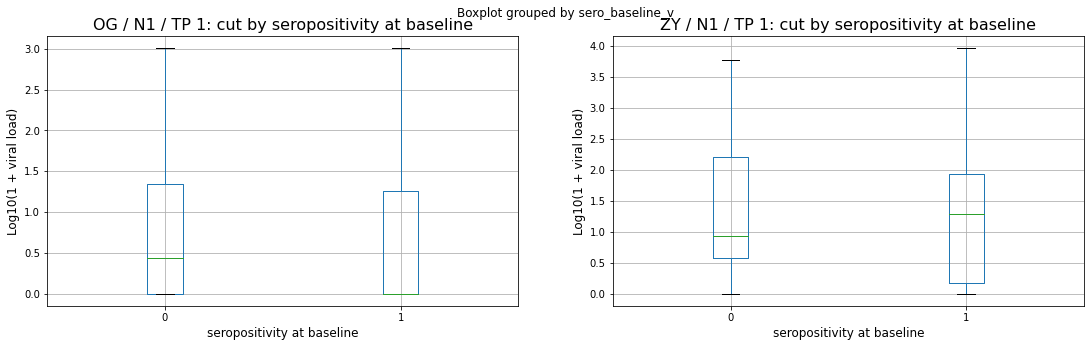

In [1318]:
fig, axes = plt.subplots(1,2, figsize=(18,5))

ax1 = axes.flatten()[0]
df[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['sero_baseline_v'], ax=ax1)
ax1.set_title('OG / N1 / TP 1: cut by seropositivity at baseline', fontsize=16)
ax1.set_xlabel('seropositivity at baseline', fontsize=12)
ax1.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax2 = axes.flatten()[1]
df[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['sero_baseline_v'], ax=ax2)
ax2.set_title('ZY / N1 / TP 1: cut by seropositivity at baseline', fontsize=16)
ax2.set_xlabel('seropositivity at baseline', fontsize=12)
ax2.set_ylabel('Log10(1 + viral load)', fontsize=12)

Text(0, 0.5, 'Log10(1 + viral load)')

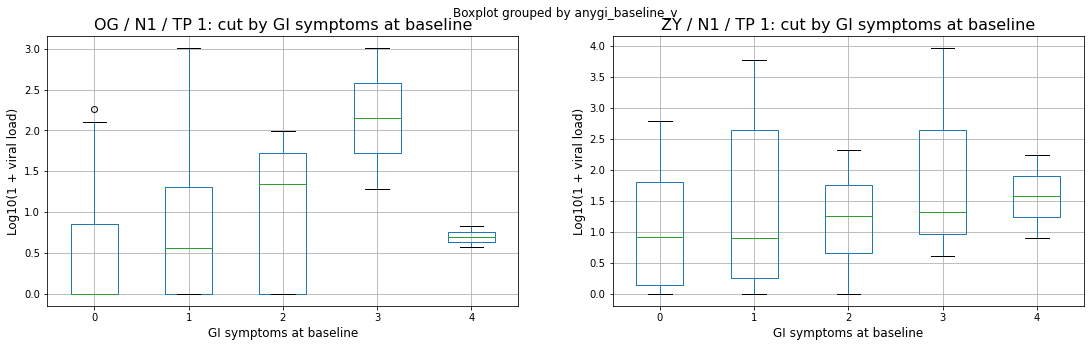

In [1319]:
fig, axes = plt.subplots(1,2, figsize=(18,5))

ax1 = axes.flatten()[0]
df[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['anygi_baseline_v'], ax=ax1)
ax1.set_title('OG / N1 / TP 1: cut by GI symptoms at baseline', fontsize=16)
ax1.set_xlabel('GI symptoms at baseline', fontsize=12)
ax1.set_ylabel('Log10(1 + viral load)', fontsize=12)

ax2 = axes.flatten()[1]
df[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['anygi_baseline_v'], ax=ax2)
ax2.set_title('ZY / N1 / TP 1: cut by GI symptoms at baseline', fontsize=16)
ax2.set_xlabel('GI symptoms at baseline', fontsize=12)
ax2.set_ylabel('Log10(1 + viral load)', fontsize=12)

<AxesSubplot:title={'center':'log_avg_viral_load'}, xlabel='[arm_v]'>

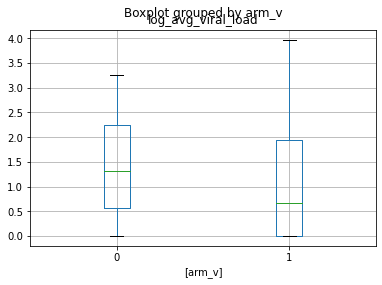

In [1309]:
df[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1gene')].boxplot(column = 'log_avg_viral_load', by=['arm_v'])

In [956]:
df_temp[(df_temp['Sample.Type'] == 'OG')].groupby('TP_new').cov_pos.size()

TP_new
1    29
2    27
3    26
4    27
5    12
Name: cov_pos, dtype: int64

In [954]:
temp[(temp['Target.Name'] == 'N1gene') & (temp.TP_new == '4')][['Study.ID', 'Sample.Type', 'R1', 'R2', 'cov_pos']].sort_values(by=['cov_pos', 'Sample.Type', 'R1'], ascending=False)

,Study.ID,Sample.Type,R1,R2,cov_pos
2278,55619-164,ZY,4,4,1
2274,55619-165,ZY,4,4,1
2087,55619-279,ZY,4,2,1
2062,55619-137,ZY,3,2,1
2115,55619-218,ZY,3,1,1
2070,55619-135,ZY,2,1,1
2064,55619-168,ZY,2,1,1
2090,55619-282,ZY,2,1,1
2295,55619-316,ZY,2,2,1
2109,55619-001,ZY,1,1,1


In [543]:
df_clean['R1=R2'] = (df_clean.R1 == df_clean.R2).astype(int)

In [546]:
df_clean[df_clean.R1 > 100].groupby('Sample.Type')['R1=R2'].mean()

Sample.Type
OG    0.468750
ZY    0.644068
Name: R1=R2, dtype: float64

In [537]:
temp = pd.DataFrame(df_clean[df_clean.R1 > 100].R1 - df_clean[df_clean.R1 > 100].R2)
temp.groupby(temp[0]).size()

0
0           91
41           1
42           1
47           1
48           1
53           1
54           1
66           1
68           1
72           1
81           2
89           1
101          1
149          1
179          1
187          1
195          1
196          1
214          1
226          1
265          1
316          1
321          1
351          1
375          1
433          2
576          1
642          1
726          1
932          1
946          1
1332         2
2220         1
2298         1
2857         1
4734         1
6027         1
6166         1
7366         2
10421        1
10520        1
46721        1
75242        1
157718       1
191755       1
216978       1
217575       1
285840       1
393722       1
458139       1
489059       1
734297       1
1176918      1
2670426      1
19728028     1
23345623     1
dtype: int64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

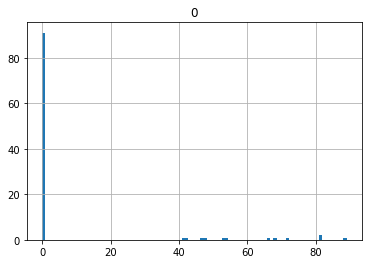

In [541]:
temp[temp[0]<100].hist(bins=100)

<AxesSubplot:>

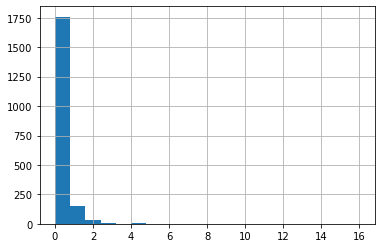

In [553]:
df_clean[(df_clean.R2 == 0) & (df_clean.R1 < 20)].R1.hist(bins=20)

In [559]:
temp = pd.DataFrame(df_clean.groupby(['Study.ID', 'TP_new'])['Date.Collected'].nunique())

In [560]:
temp[temp['Date.Collected'] > 1]

,,Date.Collected
Study.ID,TP_new,
55619-001,5,2
55619-016,5,2
55619-115,2,2
55619-135,3,2
55619-144,1,2
55619-200,5,3
55619-221,2,2
55619-253,1,2
55619-274,1,2


In [587]:



df_clean[(df_clean['Study.ID'] == '55619-221') 
         & (df_clean['TP_new'] == '2')
        & (df_clean['Target.Name'] == 'N1gene')].sort_values(['Target.Name', 'Date.Collected'])

,Target.Name,Study.ID,Date.Collected,TP_new,Sample.Type,Date.of.enrollment,symptom_onset,DOSS,TIS,DOSS_TP,R1,R2,R3,R4,R1=R2
727,N1gene,55619-221,06/27/2020,2,ZY,06/18/2020,-15.0,24.0,9.0,3,0,0,NaN,NaN,1
778,N1gene,55619-221,06/27/2020,2,OG,06/18/2020,-15.0,24.0,9.0,3,0,0,NaN,NaN,1
170,N1gene,55619-221,07/08/2020,2,ZY,06/18/2020,-15.0,35.0,20.0,3,0,0,NaN,NaN,1
743,N1gene,55619-221,07/08/2020,2,OG,06/18/2020,-15.0,35.0,20.0,3,0,0,NaN,NaN,1


In [348]:
df_clean

NameError: name 'df_clean' is not defined

In [566]:
temp[temp['Date.Collected'] > 1][]

,,Date.Collected
Study.ID,TP_new,
55619-001,5,2
55619-016,5,2
55619-115,2,2
55619-135,3,2
55619-144,1,2
55619-200,5,3
55619-221,2,2
55619-253,1,2
55619-274,1,2


In [590]:
df_clean['cov_pos'] = ((df_clean.R1 > 0) & 
                      (df_clean.R2 > 0) ).astype(int)

In [591]:
df_clean.cov_pos.mean()

0.2607566765578635

Text(0, 0.5, 'Frac Positive')

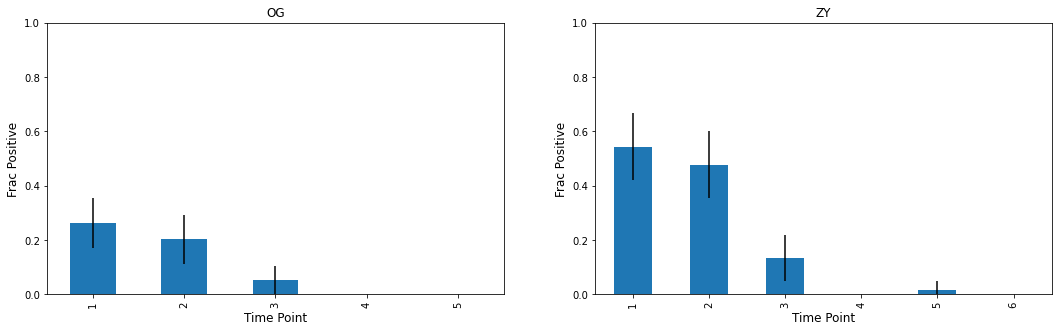

In [625]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'RDRPgene')]

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(1, 2, 2)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)


In [ ]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'RDRPgene')]

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(1, 2, 2)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar', yerr=err)
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)


<AxesSubplot:xlabel='TP_new,Sample.Type'>

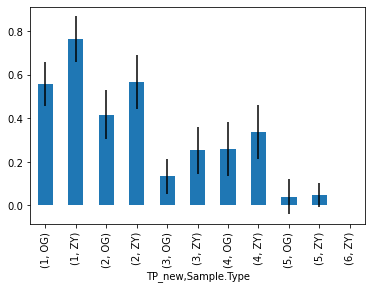

In [606]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'N1gene')]

err = 2 * df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.sem()
df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.mean().plot(kind='bar', yerr=err)

<AxesSubplot:xlabel='TP_new,Sample.Type'>

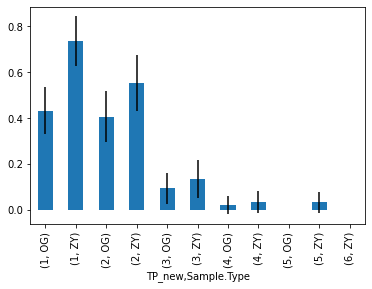

In [600]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'N2gene')]

err = 2 * df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.sem()
df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.mean().plot(kind='bar', yerr=err)

<AxesSubplot:xlabel='TP_new,Sample.Type'>

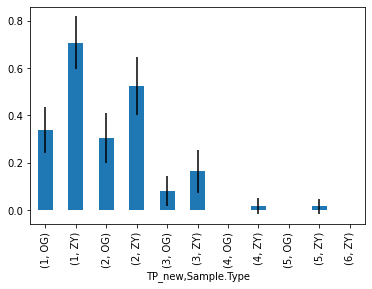

In [602]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'Egene')]

err = 2 * df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.sem()
df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.mean().plot(kind='bar', yerr=err)

<AxesSubplot:xlabel='TP_new,Sample.Type'>

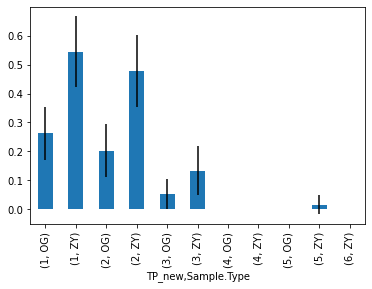

In [604]:
df_temp = df_clean[(df_clean.TP_new != 'missed') & (df_clean['Target.Name'] == 'RDRPgene')]

err = 2 * df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.sem()
df_temp.groupby(['TP_new', 'Sample.Type']).cov_pos.mean().plot(kind='bar', yerr=err)

# start here

In [1484]:
#df1 = pd.DataFrame(pd.read_csv('20210505_g_RNA_fulldata.csv'))
#df2 = pd.DataFrame(pd.read_csv('20210712_g_RNA_fulldata.csv')) #20210707


In [1485]:
df1 = pd.DataFrame(pd.read_csv('20210922_g_RNA_fulldata.csv'))  #20210730_g_RNA_fulldata.csv
df1.rename(columns={'Sample':'Sample.Name', 'Target':'Target.Name'}, inplace=True)
df = df1[(df1['Sample.class'] == 'clinical sample') & (df1['data.status'] == 'Available')].copy()

df['replicant'] = df['Sample.Name'] + '_' + df['Target.Name']

# enforce limit of blank
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.487) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.237) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.668) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.239) - 1), 'viral.load'] = 0

df['Date.Collected'].fillna('missing', inplace=True)

df['duplication'] = df.groupby(['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type' ])['viral.load'].rank(method='first', ascending=False)

In [1486]:
df['plate_2'] = df.plate.str.split('_').str[0]
df[(df.TP_new.isin(['4', '5', '6'])) ].groupby('plate_2').size()

plate_2
plate10    327
plate12    458
plate8     576
plate9     382
dtype: int64

In [1487]:
df = df[~df['Sample.Name'].isin(['COVRNA0653', 'COVRAN0684'])]

In [1488]:
df[['Study.ID', 'Date.of.enrollment']].drop_duplicates().to_csv('date_of_enrollment.csv')

(0.0, 2.0)

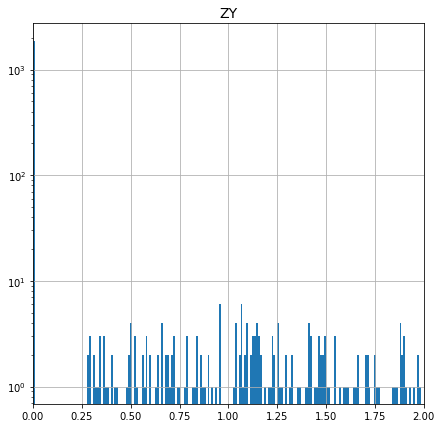

In [1489]:
fig, ax = plt.subplots(figsize=(7,7))
df[(df['viral.load']<3) & (df['Sample.Type'] == 'ZY')]['viral.load'].hist(bins=300, ax=ax )

ax.set_yscale('log')
ax.set_title('ZY', fontsize=14)
ax.set_xlim([0,2])

In [1490]:
df.groupby('duplication', dropna=False).size()

duplication
1.0    2692
2.0    2678
3.0      20
4.0      20
dtype: int64

# Aim 1

In [1491]:
xls = pd.ExcelFile('20210511_Metadata_Lambda.xlsx')

In [1492]:
xls.sheet_names

['Sheet1', 'Sheet2']

In [1493]:
df_symp = pd.read_excel(xls, 'Sheet1')

In [1494]:
df_symp

,participant_id,sex,final_age,age_v,bmi,bmi_v,arm,arm_v,Seropositive_gt_0.108,sero_baseline_v,...,alt_210,ast_210,bilirubin_210,alkphos(35-105)_210_v,alt(10-35)_210_v,ast(10-35)_210_v,bill(<1.2)_210_v,lft_210_v,duration_v,TP
0,55619-001,1,55,2,57.000000,2.0,Saline placebo,0,not seropositive,0,...,31.0,31.0,0.9,1.0,0.0,0.0,0.0,1.0,142.0,4.0
1,55619-004,1,30,0,70.000000,2.0,Lambda,1,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,4.0
2,55619-012,1,55,2,67.000000,2.0,Saline placebo,0,not seropositive,0,...,28.0,28.0,0.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,55619-016,1,56,2,54.000000,2.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55619-108,0,21,0,24.934531,0.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,55619-337,0,56,2,26.289704,0.0,Lambda,1,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,55619-339,0,54,2,22.594123,0.0,Saline placebo,0,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0
117,55619-344,0,34,1,24.369376,0.0,Lambda,1,seropositive,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,3.0
118,55619-345,1,31,0,34.534042,2.0,Saline placebo,0,not seropositive,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1495]:
df_symp.columns

Index(['participant_id', 'sex', 'final_age', 'age_v', 'bmi', 'bmi_v', 'arm',
       'arm_v', 'Seropositive_gt_0.108', 'sero_baseline_v',
       'abpain_baseline_v', 'diarrhea_baseline_v', 'nausea_baseline_v',
       'vomiting_baseline_v', 'anygi_baseline_v', 'uppergi_baseline_v',
       'lowergi_baseline_v', 'abpain_LT120_v', 'diarrhea_LT120_v',
       'nausea_LT120_v', 'vomiting_LT120_v', 'anygi_LT120_v',
       'uppergi_LT120_v', 'lowergi_LT120_v', 'abpain_LT210_v',
       'diarrhea_LT210_v', 'nausea_LT210_v', 'vomiting_LT210_v',
       'anygi_LT210_v', 'uppergi_LT210_v', 'lowergi_LT210_v', 'abpain_0_28_v',
       'diarrhea_0_28_v', 'nausea_0_28_v', 'vomiting_0_28_v', 'anygi_0_28_v',
       'uppergi_0_28_v', 'lowergi_0_28_v', 'abpain_0_14_v', 'diarrhea_0_14_v',
       'nausea_0_14_v', 'vomiting_0_14_v', 'anygi_0_14_v', 'uppergi_0_14_v',
       'lowergi_0_14_v', 'abpain_14_28_v', 'diarrhea_14_28_v',
       'nausea_14_28_v', 'vomiting_14_28_v', 'anygi_14_28_v',
       'uppergi_14_28_v'

In [1496]:
df = pd.merge(df, 
              df_symp[['participant_id', 'sex', 'final_age', 'arm_v', 'sero_baseline_v']], 
         left_on = 'Study.ID', right_on = 'participant_id')

In [1497]:
df[df['Study.ID'].isin(['55619-266', '55619-333'])]['TP_new']

5362    4
5363    4
5364    4
5365    4
5366    4
5367    4
5368    4
5369    4
5370    4
5371    4
5372    4
5373    4
5374    4
5375    4
5376    4
5377    4
5378    5
5379    5
5380    5
5381    5
5382    5
5383    5
5384    5
5385    5
5386    5
5387    5
5388    5
5389    5
5390    5
5391    5
5392    5
5393    5
5394    4
5395    4
5396    4
5397    4
5398    4
5399    4
5400    4
5401    4
5402    4
5403    4
5404    4
5405    4
5406    4
5407    4
5408    4
5409    4
Name: TP_new, dtype: object

In [1498]:
df.to_csv('clean_data.csv')

In [1499]:
df['is_ZY'] = (df['Sample.Type'] == 'ZY').astype(int)
df['is_N2'] = (df['Target.Name'] == 'N2').astype(int)
df['is_E'] = (df['Target.Name'] == 'E').astype(int)
df['is_RDRP'] = (df['Target.Name'] == 'RdRP').astype(int)

df['cov_pos'] = (df['viral.load'] > 0).astype(int)

In [1500]:
df.groupby('Target.Name').size()

Target.Name
E       1354
N1      1354
N2      1347
RdRP    1355
dtype: int64

In [1501]:
df.mean()

Well                       175.613678
Cq                          81.240398
symptom_onset               -5.491128
DOSS                        69.575046
TIS                         64.083919
TP_old                       2.702218
samplePlate                  5.736784
qRT.PCR_PlateEgene_1              NaN
qRT.PCR_PlateEgene_2              NaN
qRT.PCR_PlateRdRPgene_1           NaN
qRT.PCR_PlateRdRPgene_2           NaN
qRT.PCR_PlateN1gene_1             NaN
qRT.PCR_PlateN1gene_2             NaN
qRT.PCR_PlateN2gene_1             NaN
qRT.PCR_PlateN2gene_2             NaN
qRT.PCR_PlatesgRNA_1              NaN
qRT.PCR_PlatesgRNA_2              NaN
viral.load                  38.498081
efficiency                   3.850583
duplication                  1.513494
sex                          0.414233
final_age                   40.809982
arm_v                        0.489834
sero_baseline_v              0.397227
is_ZY                        0.515896
is_N2                        0.248983
is_E        

In [1502]:
df['TP_1'] = (df.TP_new == '1').astype(int)
df['TP_2'] = (df.TP_new == '2').astype(int)
df['TP_3'] = (df.TP_new == '3').astype(int)
df['TP_4'] = (df.TP_new == '4').astype(int)
df['TP_5'] = (df.TP_new == '5').astype(int)
df['TP_6'] = (df.TP_new == '6').astype(int)

In [1503]:
df.columns

Index(['Well', 'Well.Position', 'Sample.Name', 'Target.Name', 'Cq', 'Rawdata',
       'plate', 'Study.ID', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'TP_new', 'Stool.ID',
       'TP_old', 'Sample.Type', 'Box', 'Column', 'Row', 'dateRNAExtracted',
       'extractedBy', 'samplePlate', 'samplePlatePosition',
       'qRT.PCR_PlateEgene_1', 'qRT.PCR_PlateEgene_2',
       'qRT.PCR_PlateRdRPgene_1', 'qRT.PCR_PlateRdRPgene_2',
       'qRT.PCR_PlateN1gene_1', 'qRT.PCR_PlateN1gene_2',
       'qRT.PCR_PlateN2gene_1', 'qRT.PCR_PlateN2gene_2',
       'qRT.PCR_PlatesgRNA_1', 'qRT.PCR_PlatesgRNA_2', 'Notes...30',
       'Notes...31', 'Sample.class', 'data.status', 'viral.load', 'efficiency',
       'replicant', 'duplication', 'plate_2', 'participant_id', 'sex',
       'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E',
       'is_RDRP', 'cov_pos', 'TP_1', 'TP_2', 'TP_3', 'TP_4', 'TP_5', 'TP_6'],
      dtype='object')

In [1504]:
for col in [ 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'sero_baseline_v'
#       'TP_1', 'TP_2',  'TP_3',  'TP_4', 'TP_5',
#        'TP_6', 'arm_v'
           ]:
    df[col] = df[col] - df[col].mean()

In [1505]:
df['TP_1_arm'] = df.TP_1 * df.arm_v
df['TP_2_arm'] = df.TP_2 * df.arm_v
df['TP_3_arm'] = df.TP_3 * df.arm_v
df['TP_4_arm'] = df.TP_4 * df.arm_v
df['TP_5_arm'] = df.TP_5 * df.arm_v
df['TP_6_arm'] = df.TP_6 * df.arm_v

In [1506]:
df.groupby(['TP_new', 'arm_v']).TP_2_arm.mean()

TP_new  arm_v
1       0        0
        1        0
2       0        0
        1        1
3       0        0
        1        0
4       0        0
        1        0
5       0        0
        1        0
6       0        0
        1        0
missed  0        0
        1        0
Name: TP_2_arm, dtype: int64

In [1507]:
df.groupby('TP_new').size()

TP_new
1         1303
2         1182
3         1158
4          870
5          682
6          183
missed      32
dtype: int64

In [1512]:
df.columns

Index(['Well', 'Well.Position', 'Sample.Name', 'Target.Name', 'Cq', 'Rawdata',
       'plate', 'Study.ID', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'DOSS', 'TIS', 'DOSS_TP', 'TP_new', 'Stool.ID',
       'TP_old', 'Sample.Type', 'Box', 'Column', 'Row', 'dateRNAExtracted',
       'extractedBy', 'samplePlate', 'samplePlatePosition',
       'qRT.PCR_PlateEgene_1', 'qRT.PCR_PlateEgene_2',
       'qRT.PCR_PlateRdRPgene_1', 'qRT.PCR_PlateRdRPgene_2',
       'qRT.PCR_PlateN1gene_1', 'qRT.PCR_PlateN1gene_2',
       'qRT.PCR_PlateN2gene_1', 'qRT.PCR_PlateN2gene_2',
       'qRT.PCR_PlatesgRNA_1', 'qRT.PCR_PlatesgRNA_2', 'Notes...30',
       'Notes...31', 'Sample.class', 'data.status', 'viral.load', 'efficiency',
       'replicant', 'duplication', 'plate_2', 'participant_id', 'sex',
       'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E',
       'is_RDRP', 'cov_pos', 'TP_1', 'TP_2', 'TP_3', 'TP_4', 'TP_5', 'TP_6',
       'TP_1_arm', 'TP_2_arm', 'TP_3_arm', '

In [1513]:
df1 = df[df.TP_new.isin(['1', '2', '3'])][['Study.ID', 'Target.Name','Date.Collected',  'replicant', 'TP_new', 'sex', 'final_age', 'arm_v', 
                                           'sero_baseline_v',
                                'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 
                              'TP_1', 'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm',
                                      'viral.load', 'cov_pos'
                                     ]]

extended_list = set(df[df.TP_new.isin(['4', '5', '6'])]['Study.ID'])
df2 = df[(df.TP_new.isin(['1', '2', '3', '4', '5', '6']))
        & (df['Study.ID'].isin(extended_list))][['Study.ID', 'Target.Name', 'Date.Collected', 'replicant', 'TP_new', 'sex', 'final_age', 'arm_v', 
                                           'sero_baseline_v',
                                'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 
                               'TP_1', 'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm',
                               'TP_4', 'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
                                      'viral.load', 'cov_pos'
                                     ]]


In [1514]:
df.groupby(['arm_v', 'sero_baseline_v'])['Study.ID'].nunique()

arm_v  sero_baseline_v
0      -0.397227          31
        0.602773          27
1      -0.397227          34
        0.602773          21
Name: Study.ID, dtype: int64

In [1515]:
df1

,Study.ID,Target.Name,Date.Collected,replicant,TP_new,sex,final_age,arm_v,sero_baseline_v,is_ZY,...,is_E,is_RDRP,TP_1,TP_1_arm,TP_2,TP_2_arm,TP_3,TP_3_arm,viral.load,cov_pos
0,55619-232,E,missing,COVRNA0096_E,2,-0.414233,1.190018,1,-0.397227,0.484104,...,0.749723,-0.250462,0,0,1,1,0,0,0.0,0
1,55619-232,RdRP,missing,COVRNA0096_RdRP,2,-0.414233,1.190018,1,-0.397227,0.484104,...,-0.250277,0.749538,0,0,1,1,0,0,0.0,0
2,55619-232,E,missing,COVRNA0096_E,2,-0.414233,1.190018,1,-0.397227,0.484104,...,0.749723,-0.250462,0,0,1,1,0,0,0.0,0
3,55619-232,RdRP,missing,COVRNA0096_RdRP,2,-0.414233,1.190018,1,-0.397227,0.484104,...,-0.250277,0.749538,0,0,1,1,0,0,0.0,0
4,55619-232,N1,missing,COVRNA0096_N1,2,-0.414233,1.190018,1,-0.397227,0.484104,...,-0.250277,-0.250462,0,0,1,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349,55619-326,RdRP,missing,COVRNA0461_RdRP,3,-0.414233,-3.809982,1,-0.397227,0.484104,...,-0.250277,0.749538,0,0,0,0,1,1,0.0,0
5350,55619-326,N1,missing,COVRNA0461_N1,3,-0.414233,-3.809982,1,-0.397227,0.484104,...,-0.250277,-0.250462,0,0,0,0,1,1,0.0,0
5351,55619-326,N2,missing,COVRNA0461_N2,3,-0.414233,-3.809982,1,-0.397227,0.484104,...,-0.250277,-0.250462,0,0,0,0,1,1,0.0,0
5352,55619-326,N1,missing,COVRNA0461_N1,3,-0.414233,-3.809982,1,-0.397227,0.484104,...,-0.250277,-0.250462,0,0,0,0,1,1,0.0,0


In [1516]:
df1.describe()

,sex,final_age,arm_v,sero_baseline_v,is_ZY,is_N2,is_E,is_RDRP,TP_1,TP_1_arm,TP_2,TP_2_arm,TP_3,TP_3_arm,viral.load,cov_pos
count,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.00000
mean,0.008770,-0.898645,0.495471,0.006561,-0.066267,0.000536,-0.000209,-0.000393,0.357672,0.175405,0.324458,0.160307,0.317870,0.159758,57.030754,0.40022
std,0.494104,13.737581,0.500048,0.490723,0.497525,0.432794,0.433112,0.433112,0.479381,0.380365,0.468236,0.366941,0.465713,0.366432,440.433461,0.49001
min,-0.414233,-22.809982,0.000000,-0.397227,-0.515896,-0.248983,-0.250277,-0.250462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-0.414233,-10.809982,0.000000,-0.397227,-0.515896,-0.248983,-0.250277,-0.250462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-0.414233,-4.809982,0.000000,-0.397227,-0.515896,-0.248983,-0.250277,-0.250462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.585767,12.190018,1.000000,0.602773,0.484104,-0.248983,0.249723,0.249538,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.025925,1.00000
max,0.585767,30.190018,1.000000,0.602773,0.484104,0.751017,0.749723,0.749538,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10722.511802,1.00000


In [1517]:
df1.groupby([df.TP_new, df.arm_v]).cov_pos.mean()

TP_new  arm_v
1       0        0.608434
        1        0.480438
2       0        0.468227
        1        0.446918
3       0        0.142361
        1        0.213058
Name: cov_pos, dtype: float64

In [1518]:
df1.to_csv('data_Q1_28day.csv')
df2.to_csv('data_Q1_full.csv')

In [1520]:
#X1 = sm.add_constant(df_ff.NumECMO_demeaned)
#X2 = pd.get_dummies(df_ff[['DayNum']], columns=['DayNum']).iloc[:,1:]
#X = pd.concat([X1,X2],axis=1)
#X = X.fillna(X.mean())

X = df1[['arm_v', 'TP_2', 'TP_3', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'sex', 'final_age'
       ,'is_N2', 'is_E', 'is_RDRP'
        ]]
X = sm.add_constant(X)#-X.mean()

y = np.array(df1['cov_pos'],  dtype=float)
est = sm.Logit(y, X).fit(cov_type='cluster',cov_kwds={'groups':df1['Study.ID'].values})
est.summary2()


Optimization terminated successfully.
         Current function value: 0.555302
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.175      
Dependent Variable: y                AIC:              4069.9308  
Date:               2021-10-19 14:29 BIC:              4144.3375  
No. Observations:   3643             Log-Likelihood:   -2023.0    
Df Model:           11               LL-Null:          -2452.1    
Df Residuals:       3631             LLR p-value:      5.7441e-177
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const           0.5642    0.2392   2.3587  0.0183   0.0954   1.0330
arm_v          -0.5585    0.3316  -1.6843  0.0921  -1.2083   0.0914
TP_2           -0.6896    0.2665  -2.5882  0.0096  -1.2119  -0.1674
TP_3           -2.6039    0.3891  -6.6921  0.0000  -3.3665  -1.8413
TP_2_arm        0.5196    0.3861   1.3460  0.1783  -0.2370   1.2763
TP_3_arm        1.1569    0.5339   2.1670  0.0302   0.1105   2.2033
is_ZY           1.1371    0.1631   6.9709  0.0000   0.8174   1.4568
sex            -0.4155    0.2944  -1.4112  0.1582  -0.9926   0.1616
final_age      -0.0309    0.0111  -2.7732  0.0056  -0.0528  -0.0091
is_N2          -0.3747    0.0680  -5.5115  0.0000  -0.5079  -0.2415
is_E           -0.4152    0.0771  -5.3824  0.0000  -0.5664  -0.2640
is_RDRP        -1.0238    0.1088  -9.4138  0.0000  -1.2370  -0.8107
==================================================================

"""

In [1521]:
mod = smf.gee('cov_pos ~ arm_v + TP_2 + TP_3 + TP_2_arm + TP_3_arm + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df1,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                    31
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:29:04
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4772      0.329      1.449      0.147      -0.168       1.123
arm_v         -1.1289      0.520     -2.173      0.030      -2.147      -0.111
TP_2          -0.6484      0.267     -2.432      0.015      -1.171      -0.126
TP_3          -2.3519      0.387     -6.074      0.000      -3.111      -1.593
TP_2_arm       0.5229      0.426      1.227      0.220      -0.312       1.358
TP_3_arm       0.6019      0.625      0.963      0.336      -0.623       1.827
sex           -0.8513      0.555     -1.534      0.125      -1.939       0.236
final_age     -0.0514      0.022     -2.300      0.021      -0.095      -0.008
is_ZY          0.9070      0.171      5.314      0.000       0.572       1.242
is_N2         -0.3786      0.073     -5.162      0.000      -0.522      -0.235
is_E          -0.4209      0.084     -5.035      0.000      -0.585      -0.257
is_RDRP       -1.0443      0.118     -8.820      0.000      -1.276      -0.812
==============================================================================
Skew:                          0.2588   Kurtosis:                      -0.8607
Centered skew:                 0.2156   Centered kurtosis:              0.0432
==============================================================================
"""

In [1584]:
mod = smf.gee('cov_pos ~ TP_2 + TP_3 + TP_1_arm + TP_2_arm + TP_3_arm + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df1,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                    31
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:41:03
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4772      0.329      1.449      0.147      -0.168       1.123
TP_2          -0.6484      0.267     -2.432      0.015      -1.171      -0.126
TP_3          -2.3519      0.387     -6.074      0.000      -3.111      -1.593
TP_1_arm      -1.1289      0.520     -2.173      0.030      -2.147      -0.111
TP_2_arm      -0.6061      0.601     -1.008      0.313      -1.784       0.572
TP_3_arm      -0.5271      0.710     -0.742      0.458      -1.919       0.865
sex           -0.8513      0.555     -1.534      0.125      -1.939       0.236
final_age     -0.0514      0.022     -2.300      0.021      -0.095      -0.008
is_ZY          0.9070      0.171      5.314      0.000       0.572       1.242
is_N2         -0.3786      0.073     -5.162      0.000      -0.522      -0.235
is_E          -0.4209      0.084     -5.035      0.000      -0.585      -0.257
is_RDRP       -1.0443      0.118     -8.820      0.000      -1.276      -0.812
==============================================================================
Skew:                          0.2588   Kurtosis:                      -0.8607
Centered skew:                 0.2156   Centered kurtosis:              0.0432
==============================================================================
"""

In [1585]:
df1.groupby(['TP_new', 'arm_v'])['Study.ID'].nunique()

TP_new  arm_v
1       0        52
        1        50
2       0        42
        1        44
3       0        41
        1        42
Name: Study.ID, dtype: int64

In [1586]:
cols = ['arm_v', 'TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df1[cols].min())
lookup.loc[1] = np.array(df1[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', 'control', lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP1', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[1], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'control',  lookup.arm_v[0], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'test',     lookup.arm_v[1], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[1], lookup.TP_3_arm[0]],
    ['TP3', 'control',  lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_2_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP3', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[1]]],
    columns=['Time Point', 'Study Arm', 'arm_v', 'TP_2',  'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1587]:
ref1[ref1['Time Point'] == 'TP3']

,Time Point,Study Arm,arm_v,TP_2,TP_3,TP_1_arm,TP_2_arm,TP_3_arm,key
4,TP3,control,0.0,0.0,1.0,0.0,0.0,0.0,0
5,TP3,test,1.0,0.0,1.0,0.0,0.0,1.0,0


In [1588]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

In [1589]:
preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'

<Figure size 1296x720 with 0 Axes>

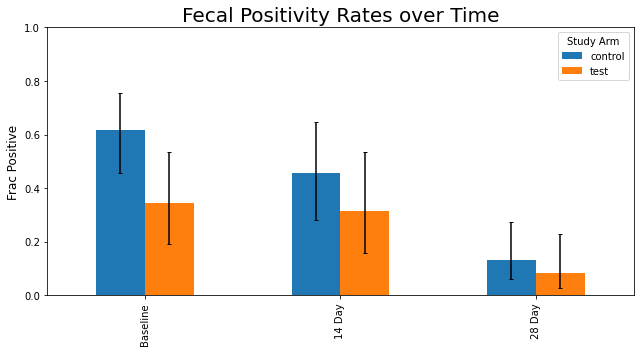

In [1590]:
plt.figure(figsize=(18,10))

temp = preds[preds['Sample & Target'] == 'mean']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm').reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Fecal Positivity Rates over Time', fontsize=20)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)
plt.tight_layout()
#fig1=plt.show()
plt.savefig('Lambda_frac_positive.pdf')

In [1591]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['TP_1_arm', 'TP_2_arm', 'TP_3_arm'])]
temp['Time Point'] = 'Baseline'
temp.loc[temp.index == 'TP_2_arm','Time Point'] = '14 Day'
temp.loc[temp.index == 'TP_3_arm', 'Time Point'] = '28 Day'
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])

In [1592]:
temp

,coef,std err,z,P>|z|,[0.025,0.975],Time Point,aOR,aOR_high,aOR_low
TP_1_arm,-1.1289,0.520,-2.173,0.030,-2.147,-0.111,Baseline,0.323389,0.891455,0.117314
TP_2_arm,-0.6061,0.601,-1.008,0.313,-1.784,0.572,14 Day,0.545474,1.760944,0.168967
TP_3_arm,-0.5271,0.710,-0.742,0.458,-1.919,0.865,28 Day,0.590314,2.357024,0.147844


In [1593]:
from matplotlib import ticker

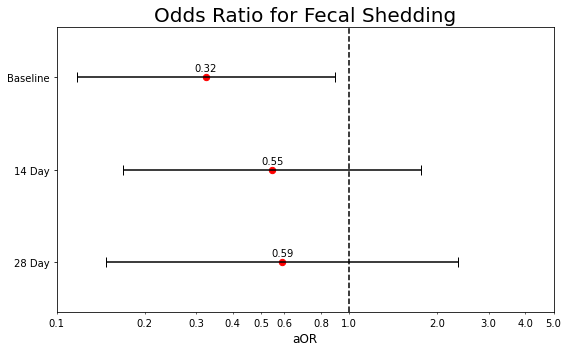

In [1594]:
err = np.array([np.array(temp.aOR - temp.aOR_low)  ,
                np.array(temp.aOR_high      - temp.aOR)   ])


plt.figure(figsize=(8,5))


plt.barh(temp['Time Point'], temp.aOR, xerr=err, facecolor='none', capsize = 5)
plt.scatter(temp.aOR,temp['Time Point'], color='r', s=40)
plt.axvline(1.0, color='black', linestyle='--')
plt.xlim(0.1,5)
plt.xlabel('aOR', fontsize=12)
plt.title('Odds Ratio for Fecal Shedding', fontsize=20)
plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()

#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))  # set regular formatting
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
#ax.ticklabel_format(style='plain',axis='x',useOffset=False)

locs = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1. ,  2. , 3. , 4., 5.])
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

#annotations = np.round(df_result.odds_rat,1).astype(str)
#for i, label in enumerate(annotations):
#    plt.text(df_result.odds_rat[i],df_result.feature_2[i],label)

for i in range(len(temp.aOR)):
    x = np.array(temp.aOR)[i]
    y = np.array(temp['Time Point'])[i]
    label = "{:.2f}".format(x)
    
    #print(x,y,label)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,6), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout()

plt.savefig('odds_ratio_aim1.pdf')

Text(0, 0.5, 'Frac Positive')

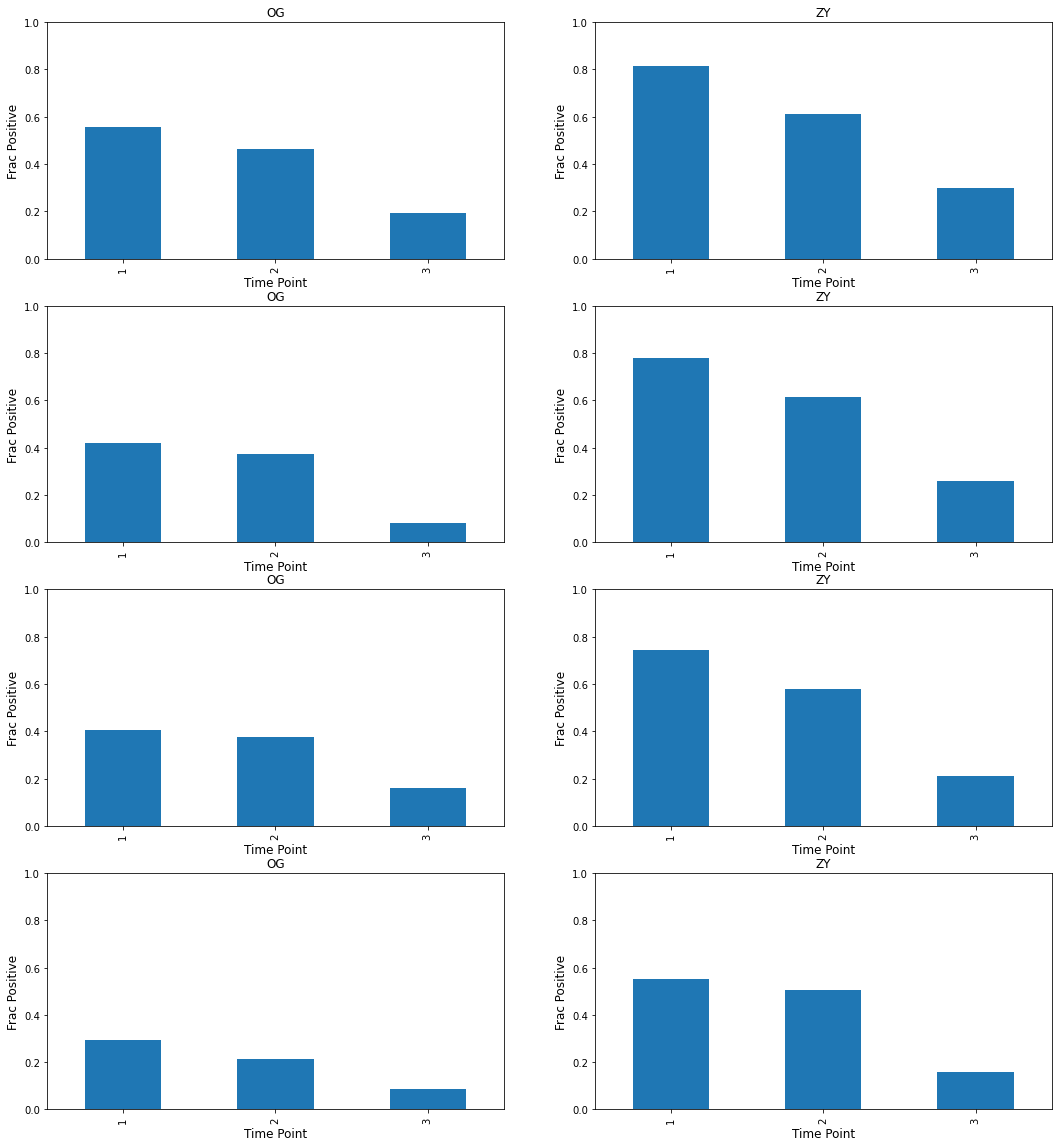

In [1595]:
#plot empirical data


temp = df[(df.TP_new.isin(['1', '2', '3']))].copy()
#temp = df[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]

plt.figure(figsize=(18,20))

df_temp = temp[(temp['Target.Name'] == 'N1')].copy()

plt.subplot(4, 2, 1)
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 2)
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)




df_temp = temp[(temp['Target.Name'] == 'N2')].copy()

plt.subplot(4, 2, 3)
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 4)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'E')].copy()

plt.subplot(4, 2, 5)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 6)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'RdRP')].copy()

plt.subplot(4, 2, 7)
err = 2 * df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'OG'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('OG')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

plt.subplot(4, 2, 8)
err = 2 * df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.sem()
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby('TP_new').cov_pos.mean().plot(kind='bar')
plt.title('ZY')
plt.ylim([0,1])
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)



In [1596]:
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_low', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_low', 'test')].values])

In [1597]:
df2.groupby(['TP_new']).cov_pos.mean()

TP_new
1    0.555041
2    0.452000
3    0.195787
4    0.118391
5    0.039589
6    0.000000
Name: cov_pos, dtype: float64

Text(0, 0.5, 'Frac Positive')

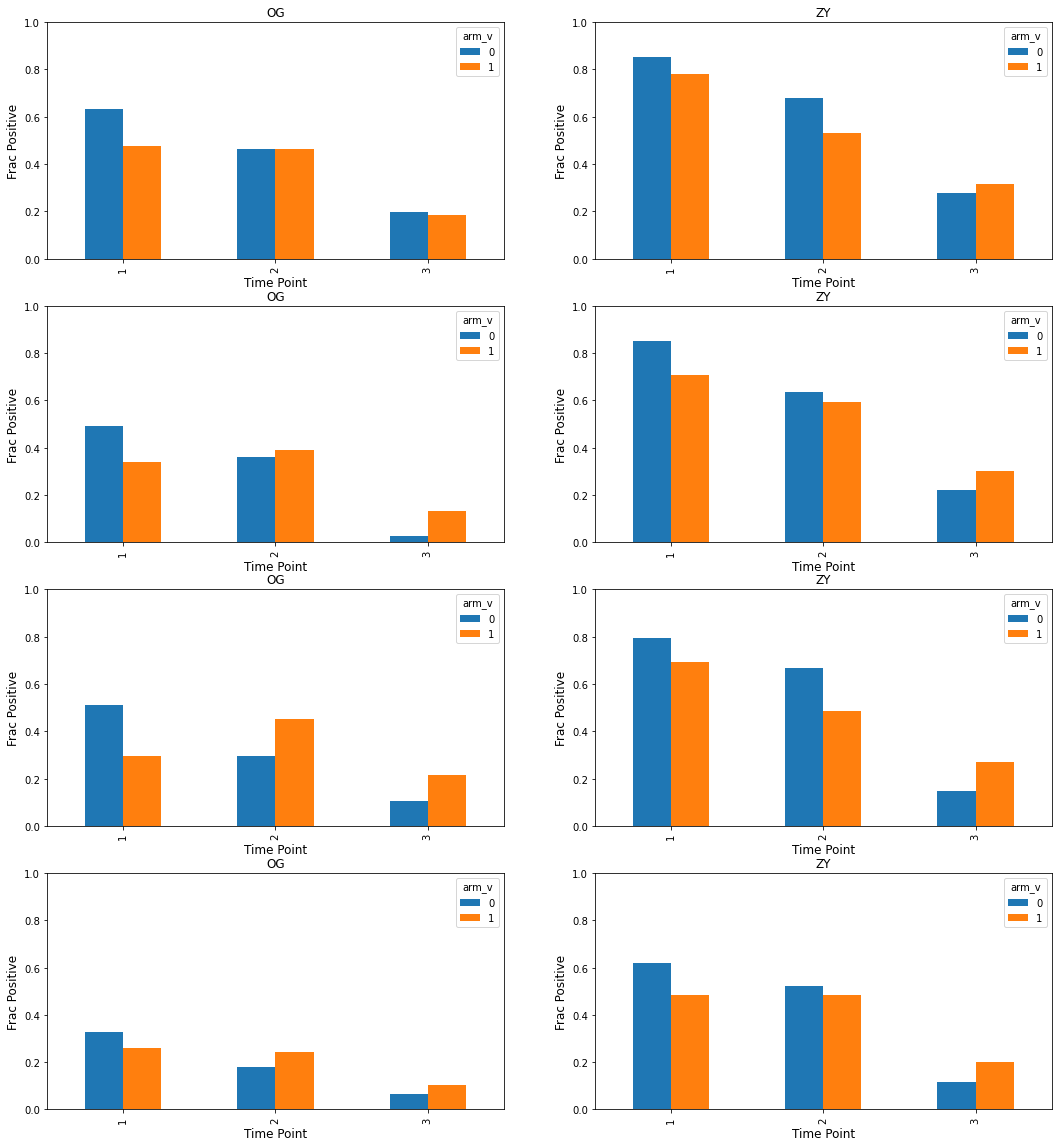

In [1598]:
# plot empirical data cut by test v control

temp = df[(df.TP_new.isin(['1', '2', '3']))].copy()

#temp = df[(df['Study.ID'].isin(set(df[df.TP_new.isin(['4', '5', '6'])]['Study.ID']))) 
#          & (df.TP_new.isin(['1', '2', '3', '4', '5']))].copy()


temp['arm_v'] = (temp.arm_v>0).astype(int)
#temp = df[(df_clean.include == 1) & (df_clean.TP_new != 'missed') ]

#plt.figure(figsize=(18,20))

fig, axes = plt.subplots(4,2, figsize=(18,20))

df_temp = temp[(temp['Target.Name'] == 'N1')].copy()

ax1 = axes.flatten()[0]
df_temp[df_temp['Sample.Type'] == 'OG'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax1)
ax1.set_title('OG')
ax1.set_ylim([0,1])
ax1.set_xlabel('Time Point', fontsize=12)
ax1.set_ylabel('Frac Positive', fontsize=12)

ax2 = axes.flatten()[1]
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax2)
ax2.set_title('ZY')
ax2.set_ylim([0,1])
ax2.set_xlabel('Time Point', fontsize=12)
ax2.set_ylabel('Frac Positive', fontsize=12)




df_temp = temp[(temp['Target.Name'] == 'N2')].copy()

ax3 = axes.flatten()[2]
df_temp[df_temp['Sample.Type'] == 'OG'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax3)
ax3.set_title('OG')
ax3.set_ylim([0,1])
ax3.set_xlabel('Time Point', fontsize=12)
ax3.set_ylabel('Frac Positive', fontsize=12)

ax4 = axes.flatten()[3]
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax4)
ax4.set_title('ZY')
ax4.set_ylim([0,1])
ax4.set_xlabel('Time Point', fontsize=12)
ax4.set_ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'E')].copy()

ax5 = axes.flatten()[4]
df_temp[df_temp['Sample.Type'] == 'OG'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax5)
ax5.set_title('OG')
ax5.set_ylim([0,1])
ax5.set_xlabel('Time Point', fontsize=12)
ax5.set_ylabel('Frac Positive', fontsize=12)

ax6 = axes.flatten()[5]
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax6)
ax6.set_title('ZY')
ax6.set_ylim([0,1])
ax6.set_xlabel('Time Point', fontsize=12)
ax6.set_ylabel('Frac Positive', fontsize=12)



df_temp = temp[(temp['Target.Name'] == 'RdRP')].copy()

ax7 = axes.flatten()[6]
df_temp[df_temp['Sample.Type'] == 'OG'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax7)
ax7.set_title('OG')
ax7.set_ylim([0,1])
ax7.set_xlabel('Time Point', fontsize=12)
ax7.set_ylabel('Frac Positive', fontsize=12)

ax8 = axes.flatten()[7]
df_temp[df_temp['Sample.Type'] == 'ZY'].groupby(['TP_new', 'arm_v']).cov_pos.mean().unstack().plot(kind='bar', ax=ax8)
ax8.set_title('ZY')
ax8.set_ylim([0,1])
ax8.set_xlabel('Time Point', fontsize=12)
ax8.set_ylabel('Frac Positive', fontsize=12)


Text(0, 0.5, 'Frac Positive')

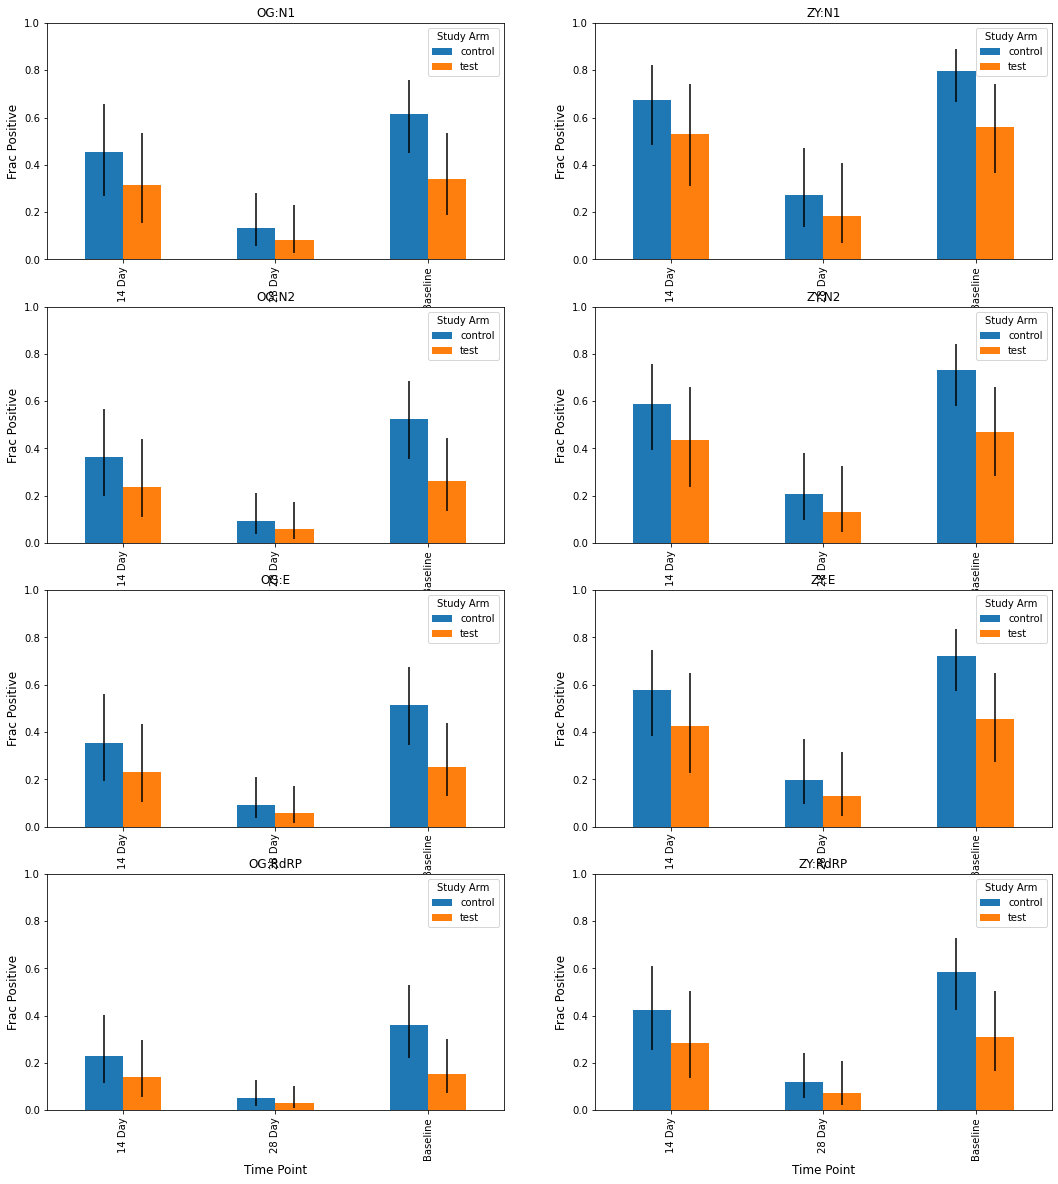

In [1599]:
# plot model data cut by test v control


fig, axes = plt.subplots(4,2, figsize=(18,20))




ax1 = axes.flatten()[0]
temp = preds[preds['Sample & Target'] == 'OG:N1']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax1)
ax1.set_title('OG:N1')
ax1.set_ylim([0,1])
ax1.set_xlabel('Time Point', fontsize=12)
ax1.set_ylabel('Frac Positive', fontsize=12)

ax2 = axes.flatten()[1]
temp = preds[preds['Sample & Target'] == 'ZY:N1']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax2)
ax2.set_title('ZY:N1')
ax2.set_ylim([0,1])
ax2.set_xlabel('Time Point', fontsize=12)
ax2.set_ylabel('Frac Positive', fontsize=12)



ax3 = axes.flatten()[2]
temp = preds[preds['Sample & Target'] == 'OG:N2']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax3)
ax3.set_title('OG:N2')
ax3.set_ylim([0,1])
ax3.set_xlabel('Time Point', fontsize=12)
ax3.set_ylabel('Frac Positive', fontsize=12)

ax4 = axes.flatten()[3]
temp = preds[preds['Sample & Target'] == 'ZY:N2']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax4)
ax4.set_title('ZY:N2')
ax4.set_ylim([0,1])
ax4.set_xlabel('Time Point', fontsize=12)
ax4.set_ylabel('Frac Positive', fontsize=12)


ax5 = axes.flatten()[4]
temp = preds[preds['Sample & Target'] == 'OG:E']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax5)
ax5.set_title('OG:E')
ax5.set_ylim([0,1])
ax5.set_xlabel('Time Point', fontsize=12)
ax5.set_ylabel('Frac Positive', fontsize=12)

ax6 = axes.flatten()[5]
temp = preds[preds['Sample & Target'] == 'ZY:E']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax6)
ax6.set_title('ZY:E')
ax6.set_ylim([0,1])
ax6.set_xlabel('Time Point', fontsize=12)
ax6.set_ylabel('Frac Positive', fontsize=12)


ax7 = axes.flatten()[6]
temp = preds[preds['Sample & Target'] == 'OG:RDRP']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax7)
ax7.set_title('OG:RdRP')
ax7.set_ylim([0,1])
ax7.set_xlabel('Time Point', fontsize=12)
ax7.set_ylabel('Frac Positive', fontsize=12)

ax8 = axes.flatten()[7]
temp = preds[preds['Sample & Target'] == 'ZY:RDRP']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm')
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, ax=ax8)
ax8.set_title('ZY:RdRP')
ax8.set_ylim([0,1])
ax8.set_xlabel('Time Point', fontsize=12)
ax8.set_ylabel('Frac Positive', fontsize=12)


model just using ZY/N1

In [1600]:
mod = smf.gee('cov_pos ~ TP_2 + TP_3 + TP_1_arm + TP_2_arm + TP_3_arm + sex + final_age',
              'Study.ID',
              df1[(df1.is_ZY > 0) ],#& (df1.is_N2 < 0) & (df1.is_E < 0) & (df1.is_RDRP > 0)],
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit(first_dep_update=200,params_niter = 200, maxiter = 10000)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 1638
Model:                                 GEE   No. clusters:                       94
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  32
Family:                           Binomial   Mean cluster size:                17.4
Dependence structure:         Exchangeable   Num. iterations:                   228
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:46:41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5834      0.536      2.957      0.003       0.534       2.633
TP_2          -0.7041      0.434     -1.623      0.105      -1.554       0.146
TP_3          -2.7417      0.600     -4.566      0.000      -3.919      -1.565
TP_1_arm      -0.6603      0.672     -0.983      0.326      -1.977       0.656
TP_2_arm      -0.9898      0.689     -1.436      0.151      -2.341       0.361
TP_3_arm      -0.4072      0.892     -0.457      0.648      -2.156       1.341
sex           -1.7643      0.591     -2.988      0.003      -2.922      -0.607
final_age     -0.0698      0.026     -2.718      0.007      -0.120      -0.019
==============================================================================
Skew:                         -0.1425   Kurtosis:                      -0.4799
Centered skew:                 0.0361   Centered kurtosis:              0.6160
==============================================================================
"""

In [1601]:
df1[(df1.is_ZY < 0) ].groupby(['TP_new', 'arm_v'])['Study.ID'].nunique()

TP_new  arm_v
1       0        47
        1        44
2       0        38
        1        40
3       0        38
        1        36
Name: Study.ID, dtype: int64

In [1602]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['TP_1_arm', 'TP_2_arm', 'TP_3_arm'])]
temp['Time Point'] = 'Baseline'
temp.loc[temp.index == 'TP_2_arm','Time Point'] = '14 Day'
temp.loc[temp.index == 'TP_3_arm', 'Time Point'] = '28 Day'
temp['aOR'] = np.round(np.exp(temp.coef),2)
temp['aOR_low'] = np.round(np.exp(temp.coef - 1.95 * temp['std err']),2)
temp['aOR_high'] = np.round(np.exp(temp.coef + 1.95 * temp['std err']),2)

#temp['tp'] = temp['Time Point']
#temp['aOR_rounded'] = '%s [%s, %s]' %(np.round(temp.aOR.value,2),np.round(temp.aOR_low,2),np.round(temp.aOR_high,2))
temp['ans'] = temp.aOR.astype('str') + ' [' + temp.aOR_low.astype('str') + ', ' + temp.aOR_high.astype('str') + ']'

temp

,coef,std err,z,P>|z|,[0.025,0.975],Time Point,aOR,aOR_low,aOR_high,ans
TP_1_arm,-0.6603,0.672,-0.983,0.326,-1.977,0.656,Baseline,0.52,0.14,1.92,"0.52 [0.14, 1.92]"
TP_2_arm,-0.9898,0.689,-1.436,0.151,-2.341,0.361,14 Day,0.37,0.10,1.42,"0.37 [0.1, 1.42]"
TP_3_arm,-0.4072,0.892,-0.457,0.648,-2.156,1.341,28 Day,0.67,0.12,3.79,"0.67 [0.12, 3.79]"


In [1603]:
cols = ['arm_v', 'TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df1[cols].min())
lookup.loc[1] = np.array(df1[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', 'control', lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP1', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[1], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'control',  lookup.arm_v[0], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'test',     lookup.arm_v[1], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[1], lookup.TP_3_arm[0]],
    ['TP3', 'control',  lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_2_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP3', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[1]]],
    columns=['Time Point', 'Study Arm', 'arm_v', 'TP_2',  'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1604]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'

<Figure size 1296x720 with 0 Axes>

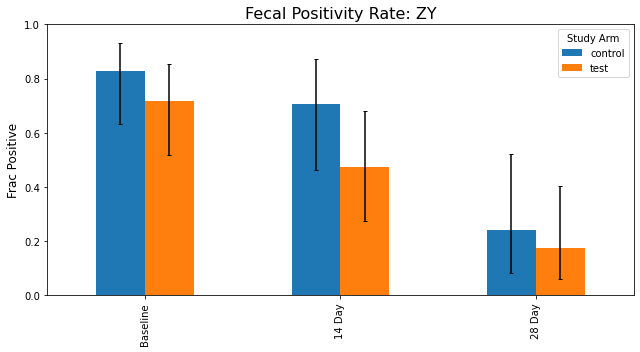

In [1605]:
plt.figure(figsize=(18,10))

temp = preds.copy()
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm').reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Fecal Positivity Rate: ZY', fontsize=16)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)
plt.tight_layout()
plt.savefig('justZY_aim1.pdf')

In [1606]:
#total viral load model

In [1607]:
df1['log_viral_load'] = np.log10(1 + df1['viral.load'])
df1['viral_load'] = df1['viral.load']
df1.groupby(['TP_new', 'arm_v']).log_viral_load.mean()

TP_new  arm_v
1       0        0.724491
        1        0.692641
2       0        0.553092
        1        0.523746
3       0        0.104708
        1        0.234977
Name: log_viral_load, dtype: float64

1         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

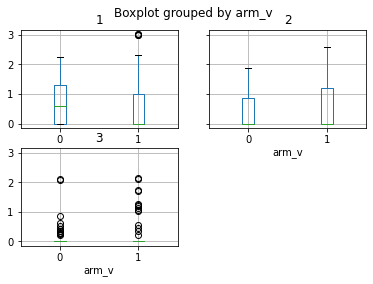

In [1608]:
temp = df1.copy()
temp['arm_v'] = (temp.arm_v>0).astype(int)

df_temp = temp[(temp['Target.Name'] == 'N1') & (temp.is_ZY < 0)].copy()

df_temp.groupby(['TP_new']).boxplot(column = 'log_viral_load', by='arm_v')


<AxesSubplot:xlabel='TP_new', ylabel='log_viral_load'>

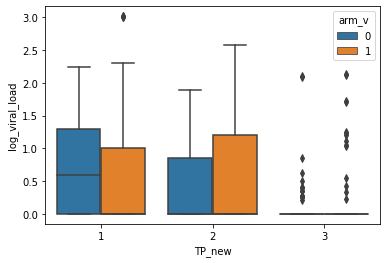

In [1609]:
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'])
#sns.swarmplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'])

Text(0, 0.5, 'Log(1+Viral Load)')

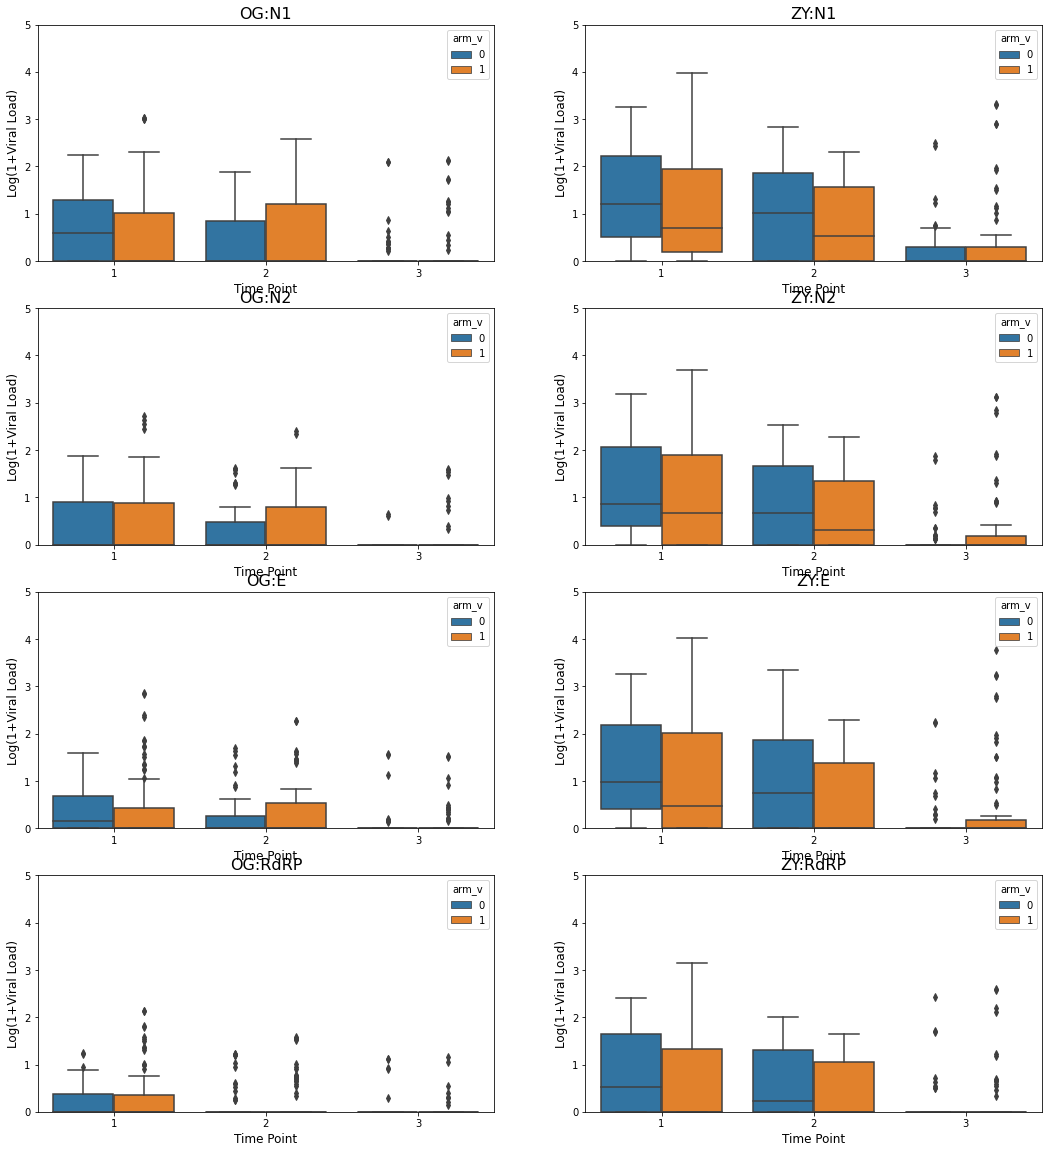

In [1610]:
# plot empirical data cut by test v control

temp = df1.copy()
temp['arm_v'] = (temp.arm_v>0).astype(int)
y_max = 5


fig, axes = plt.subplots(4,2, figsize=(18,20))


ax1 = axes.flatten()[0]
df_temp = temp[(temp['Target.Name'] == 'N1') & (temp.is_ZY < 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax1)
ax1.set_title('OG:N1', fontsize=16)
ax1.set_ylim([0,y_max])
ax1.set_xlabel('Time Point', fontsize=12)
ax1.set_ylabel('Log(1+Viral Load)', fontsize=12)

ax2 = axes.flatten()[1]
df_temp = temp[(temp['Target.Name'] == 'N1') & (temp.is_ZY > 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax2)
ax2.set_title('ZY:N1', fontsize=16)
ax2.set_ylim([0,y_max])
ax2.set_xlabel('Time Point', fontsize=12)
ax2.set_ylabel('Log(1+Viral Load)', fontsize=12)




ax3 = axes.flatten()[2]
df_temp = temp[(temp['Target.Name'] == 'N2') & (temp.is_ZY < 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax3)
ax3.set_title('OG:N2', fontsize=16)
ax3.set_ylim([0,y_max])
ax3.set_xlabel('Time Point', fontsize=12)
ax3.set_ylabel('Log(1+Viral Load)', fontsize=12)

ax4 = axes.flatten()[3]
df_temp = temp[(temp['Target.Name'] == 'N2') & (temp.is_ZY > 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax4)
ax4.set_title('ZY:N2', fontsize=16)
ax4.set_ylim([0,y_max])
ax4.set_xlabel('Time Point', fontsize=12)
ax4.set_ylabel('Log(1+Viral Load)', fontsize=12)




ax5 = axes.flatten()[4]
df_temp = temp[(temp['Target.Name'] == 'E') & (temp.is_ZY < 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax5)
ax5.set_title('OG:E', fontsize=16)
ax5.set_ylim([0,y_max])
ax5.set_xlabel('Time Point', fontsize=12)
ax5.set_ylabel('Log(1+Viral Load)', fontsize=12)

ax6 = axes.flatten()[5]
df_temp = temp[(temp['Target.Name'] == 'E') & (temp.is_ZY > 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax6)
ax6.set_title('ZY:E', fontsize=16)
ax6.set_ylim([0,y_max])
ax6.set_xlabel('Time Point', fontsize=12)
ax6.set_ylabel('Log(1+Viral Load)', fontsize=12)




ax7 = axes.flatten()[6]
df_temp = temp[(temp['Target.Name'] == 'RdRP') & (temp.is_ZY < 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax7)
ax7.set_title('OG:RdRP', fontsize=16)
ax7.set_ylim([0,y_max])
ax7.set_xlabel('Time Point', fontsize=12)
ax7.set_ylabel('Log(1+Viral Load)', fontsize=12)

ax8 = axes.flatten()[7]
df_temp = temp[(temp['Target.Name'] == 'RdRP') & (temp.is_ZY > 0)].copy()
sns.boxplot(x='TP_new', hue='arm_v', y='log_viral_load', data=df_temp, order = ['1', '2', '3'], ax=ax8)
ax8.set_title('ZY:RdRP', fontsize=16)
ax8.set_ylim([0,y_max])
ax8.set_xlabel('Time Point', fontsize=12)
ax8.set_ylabel('Log(1+Viral Load)', fontsize=12)


In [1611]:
df1.columns

Index(['Study.ID', 'Target.Name', 'Date.Collected', 'replicant', 'TP_new',
       'sex', 'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2',
       'is_E', 'is_RDRP', 'TP_1', 'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3',
       'TP_3_arm', 'viral.load', 'cov_pos', 'log_viral_load', 'viral_load'],
      dtype='object')

In [1612]:
mod = smf.gee('log_viral_load ~  TP_2 + TP_3 + TP_1_arm + TP_2_arm + TP_3_arm + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df1,
              family=sm.families.NegativeBinomial(),

              cov_struct=sm.cov_struct.Exchangeable())

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:              log_viral_load   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                   NegativeBinomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                    24
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:46:47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2849      0.181     -1.573      0.116      -0.640       0.070
TP_2          -0.3291      0.146     -2.251      0.024      -0.616      -0.043
TP_3          -1.8276      0.242     -7.557      0.000      -2.302      -1.354
TP_1_arm      -0.4403      0.349     -1.261      0.207      -1.125       0.244
TP_2_arm      -0.2574      0.391     -0.658      0.511      -1.025       0.510
TP_3_arm      -0.1324      0.768     -0.172      0.863      -1.638       1.373
sex           -0.1905      0.380     -0.502      0.616      -0.934       0.553
final_age     -0.0354      0.015     -2.293      0.022      -0.066      -0.005
is_ZY          0.7499      0.105      7.115      0.000       0.543       0.956
is_N2         -0.2711      0.024    -11.438      0.000      -0.318      -0.225
is_E          -0.3013      0.028    -10.626      0.000      -0.357      -0.246
is_RDRP       -0.7464      0.052    -14.364      0.000      -0.848      -0.645
==============================================================================
Skew:                          0.9179   Kurtosis:                       2.4522
Centered skew:                 0.4504   Centered kurtosis:              2.5559
==============================================================================
"""

In [1613]:
#mod = sm.ZeroInflatedPoisson(endog = df1['log_viral_load'], 
#                             exog = df1[['TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']],
#                             exog_infl = df1[['TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']],
#                             inflation='logit')

#res = mod.fit()
#res.summary()

In [1614]:
#XXXXX

In [1615]:
cols = ['arm_v', 'TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df1[cols].min())
lookup.loc[1] = np.array(df1[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', 'control', lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP1', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_1_arm[1], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'control',  lookup.arm_v[0], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP2', 'test',     lookup.arm_v[1], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_1_arm[0], lookup.TP_2_arm[1], lookup.TP_3_arm[0]],
    ['TP3', 'control',  lookup.arm_v[0], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_2_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0]],
    ['TP3', 'test',     lookup.arm_v[1], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[1]]],
    columns=['Time Point', 'Study Arm', 'arm_v', 'TP_2',  'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1616]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['mean'] = 10**preds['mean'] - 1
preds['mean_ci_upper'] = 10**preds['mean_ci_upper'] - 1
preds['mean_ci_lower'] = 10**preds['mean_ci_lower'] - 1

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'

<Figure size 1296x720 with 0 Axes>

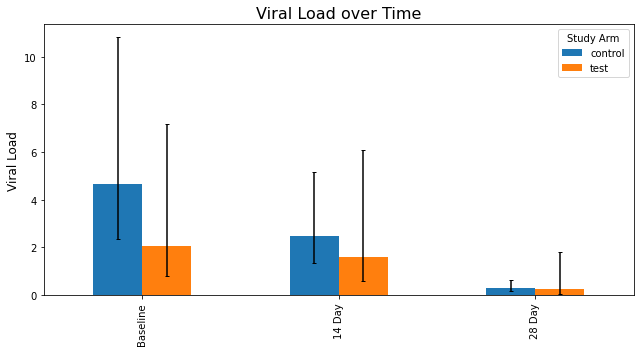

In [1617]:
plt.figure(figsize=(18,10))

temp = preds[preds['Sample & Target'] == 'mean']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm').reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Viral Load over Time', fontsize=16)
#plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Viral Load', fontsize=12)

plt.tight_layout()
plt.savefig('total_viral_load_aim1.pdf')

Text(0, 0.5, 'Residual')

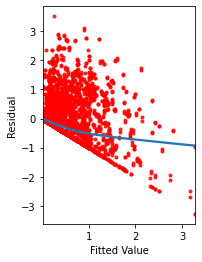

In [1618]:
plt.subplot(1,2,1)

sns.regplot(x= np.array(res.fittedvalues), #df1['log_viral_load'] ,
            y=np.array(df1['log_viral_load'] - res.fittedvalues),
            
            lowess=True, scatter_kws={'color':'r', 's':9})
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
#plt.ylim(-mm,mm)

In [1619]:
#model with all time points

In [1620]:
df2.columns

Index(['Study.ID', 'Target.Name', 'Date.Collected', 'replicant', 'TP_new',
       'sex', 'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2',
       'is_E', 'is_RDRP', 'TP_1', 'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3',
       'TP_3_arm', 'TP_4', 'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
       'viral.load', 'cov_pos'],
      dtype='object')

In [1621]:
df2.groupby(['arm_v', 'TP_new'])[['TP_1',
       'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4', 'TP_4_arm',
       'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm']].mean()

TP_1  TP_1_arm  TP_2  TP_2_arm  TP_3  TP_3_arm  TP_4  TP_4_arm  \
arm_v TP_new                                                                   
0     1          1         0     0         0     0         0     0         0   
      2          0         0     1         0     0         0     0         0   
      3          0         0     0         0     1         0     0         0   
      4          0         0     0         0     0         0     1         0   
      5          0         0     0         0     0         0     0         0   
      6          0         0     0         0     0         0     0         0   
1     1          1         1     0         0     0         0     0         0   
      2          0         0     1         1     0         0     0         0   
      3          0         0     0         0     1         1     0         0   
      4          0         0     0         0     0         0     1         1   
      5          0         0     0         0     0         0     0         0   
      6          0         0     0         0     0         0     0         0   

              TP_5  TP_5_arm  TP_6  TP_6_arm  
arm_v TP_new                                  
0     1          0         0     0         0  
      2          0         0     0         0  
      3          0         0     0         0  
      4          0         0     0         0  
      5          1         0     0         0  
      6          0         0     1         0  
1     1          0         0     0         0  
      2          0         0     0         0  
      3          0         0     0         0  
      4          0         0     0         0  
      5          1         1     0         0  
      6          0         0     1         1

In [1622]:
X = df2[[ 'TP_1', 'TP_2', 'TP_3', 'TP_4',  'TP_1_arm','TP_2_arm', 'TP_3_arm', 'TP_4_arm', 'TP_5_arm',
         'sex', 'final_age',
        'is_ZY','is_N2', 'is_E', 'is_RDRP'
        ]]
X = sm.add_constant(X)#-X.mean()

y = np.array(df2['cov_pos'],  dtype=float)
est = sm.Logit(y, X).fit(cov_type='cluster',cov_kwds={'groups':df2['Study.ID'].values})
est.summary2()

Optimization terminated successfully.
         Current function value: 0.406797
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.298      
Dependent Variable: y                AIC:              3412.4824  
Date:               2021-10-19 14:46 BIC:              3513.7954  
No. Observations:   4155             Log-Likelihood:   -1690.2    
Df Model:           15               LL-Null:          -2407.5    
Df Residuals:       4139             LLR p-value:      6.0638e-297
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const         -4.9693    0.5281   -9.4095  0.0000  -6.0044  -3.9342
TP_1           5.4460    0.5698    9.5574  0.0000   4.3292   6.5629
TP_2           4.7231    0.6221    7.5928  0.0000   3.5039   5.9423
TP_3           2.8289    0.6592    4.2914  0.0000   1.5369   4.1208
TP_4           2.8460    0.5346    5.3233  0.0000   1.7981   3.8938
TP_1_arm      -0.1350    0.3957   -0.3413  0.7329  -0.9105   0.6405
TP_2_arm       0.3295    0.5134    0.6417  0.5211  -0.6769   1.3358
TP_3_arm       0.8965    0.4847    1.8494  0.0644  -0.0536   1.8465
TP_4_arm      -0.4416    0.3111   -1.4196  0.1557  -1.0514   0.1681
TP_5_arm       1.6208    0.7044    2.3010  0.0214   0.2402   3.0013
sex           -0.8543    0.2980   -2.8672  0.0041  -1.4383  -0.2703
final_age     -0.0334    0.0117   -2.8681  0.0041  -0.0563  -0.0106
is_ZY          1.0395    0.1410    7.3730  0.0000   0.7631   1.3158
is_N2         -0.9199    0.0892  -10.3083  0.0000  -1.0948  -0.7450
is_E          -0.9801    0.0945  -10.3701  0.0000  -1.1654  -0.7949
is_RDRP       -1.5816    0.1318  -12.0038  0.0000  -1.8398  -1.3233
==================================================================

"""

In [1623]:
start_pars = est.summary2().tables[1]['Coef.']

In [1624]:
mod = smf.gee('cov_pos ~  TP_1 + TP_2 + TP_3 + TP_4  + TP_1_arm + TP_2_arm + TP_3_arm + TP_4_arm + TP_5_arm + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df2,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())
#res = mod.fit()
res = mod.fit(first_dep_update=20,params_niter = 20, start_params = start_pars, maxiter = 10000) #first_dep_update=60, maxiter=10000
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 4155
Model:                                 GEE   No. clusters:                       74
Method:                        Generalized   Min. cluster size:                  16
                      Estimating Equations   Max. cluster size:                  88
Family:                           Binomial   Mean cluster size:                56.1
Dependence structure:         Exchangeable   Num. iterations:                    31
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:47:00
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0224      0.537     -9.357      0.000      -6.074      -3.970
TP_1           5.4031      0.582      9.281      0.000       4.262       6.544
TP_2           4.7219      0.604      7.813      0.000       3.537       5.906
TP_3           2.8451      0.677      4.202      0.000       1.518       4.172
TP_4           2.7996      0.544      5.147      0.000       1.733       3.866
TP_1_arm       0.0124      0.423      0.029      0.977      -0.816       0.841
TP_2_arm       0.4790      0.500      0.957      0.338      -0.502       1.460
TP_3_arm       0.8762      0.531      1.652      0.099      -0.164       1.916
TP_4_arm      -0.2050      0.463     -0.443      0.658      -1.112       0.702
TP_5_arm       1.4978      0.728      2.056      0.040       0.070       2.926
sex           -1.0489      0.398     -2.638      0.008      -1.828      -0.270
final_age     -0.0517      0.016     -3.265      0.001      -0.083      -0.021
is_ZY          0.8688      0.141      6.175      0.000       0.593       1.145
is_N2         -0.9302      0.094     -9.888      0.000      -1.115      -0.746
is_E          -0.9917      0.101     -9.834      0.000      -1.189      -0.794
is_RDRP       -1.6015      0.139    -11.532      0.000      -1.874      -1.329
==============================================================================
Skew:                          0.5480   Kurtosis:                       0.3779
Centered skew:                 0.6326   Centered kurtosis:              0.5506
==============================================================================
"""

In [1625]:
df2.groupby(['TP_new', 'arm_v'])['Study.ID'].nunique()

TP_new  arm_v
1       0        36
        1        31
2       0        28
        1        29
3       0        29
        1        31
4       0        31
        1        26
5       0        34
        1        26
6       0        12
        1        11
Name: Study.ID, dtype: int64

In [1626]:
cols = ['arm_v', 'TP_1', 'TP_2', 'TP_3', 'TP_4', 'TP_5', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'TP_4_arm', 'TP_5_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df2[cols].min())
lookup.loc[1] = np.array(df2[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', 'control', lookup.arm_v[0], lookup.TP_1[1], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP1', 'test',     lookup.arm_v[1], lookup.TP_1[1], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[1], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP2', 'control',  lookup.arm_v[0], lookup.TP_1[0], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP2', 'test',     lookup.arm_v[1], lookup.TP_1[0], lookup.TP_2[1], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[1], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP3', 'control',  lookup.arm_v[0], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP3', 'test',     lookup.arm_v[1], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[1], lookup.TP_4[0], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[1], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP4', 'control',  lookup.arm_v[0], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[1], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP4', 'test',     lookup.arm_v[1], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[1], lookup.TP_5[0], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[1], lookup.TP_5_arm[0]],
    ['TP5', 'control',  lookup.arm_v[0], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[1], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[0]],
    ['TP5', 'test',     lookup.arm_v[1], lookup.TP_1[0], lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[1], lookup.TP_1_arm[0], lookup.TP_2_arm[0], lookup.TP_3_arm[0], lookup.TP_4_arm[0], lookup.TP_5_arm[1]]],
    columns=['Time Point', 'Study Arm', 'arm_v', 'TP_1', 'TP_2',  'TP_3', 'TP_4', 'TP_5', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'TP_4_arm', 'TP_5_arm'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1627]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

In [1628]:
preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'
preds.loc[preds['Time Point'] == 'TP4', 'Time Point'] = '4 Month'
preds.loc[preds['Time Point'] == 'TP5', 'Time Point'] = '7 Month'

<Figure size 1296x720 with 0 Axes>

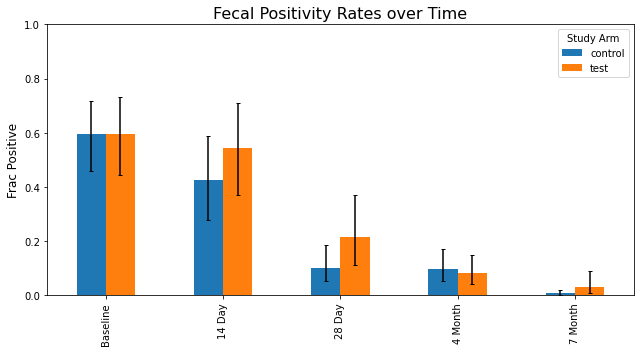

In [1630]:
plt.figure(figsize=(18,10))

temp = preds[preds['Sample & Target'] == 'mean']
data = temp.groupby(['Time Point','Study Arm'])[['mean', 'err_low', 'err_high']].mean().unstack(level='Study Arm').reindex(['Baseline', '14 Day', '28 Day', '4 Month', '7 Month'])
err = []
err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Fecal Positivity Rates over Time', fontsize=16)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)
plt.tight_layout()

plt.savefig('aim1_all_tps.pdf')

In [1631]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'TP_4_arm', 'TP_5_arm'])]
temp['Time Point'] = 'Baseline'
temp.loc[temp.index == 'TP_2_arm','Time Point'] = '14 Day'
temp.loc[temp.index == 'TP_3_arm', 'Time Point'] = '28 Day'
temp.loc[temp.index == 'TP_4_arm','Time Point'] = '4 Month'
temp.loc[temp.index == 'TP_5_arm', 'Time Point'] = '7 Month'
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])

In [1632]:
temp

,coef,std err,z,P>|z|,[0.025,0.975],Time Point,aOR,aOR_high,aOR_low
TP_1_arm,0.0124,0.423,0.029,0.977,-0.816,0.841,Baseline,1.012477,2.310006,0.443769
TP_2_arm,0.4790,0.500,0.957,0.338,-0.502,1.460,14 Day,1.614459,4.280201,0.608962
TP_3_arm,0.8762,0.531,1.652,0.099,-0.164,1.916,28 Day,2.401756,6.764241,0.852783
TP_4_arm,-0.2050,0.463,-0.443,0.658,-1.112,0.702,4 Month,0.814647,2.009428,0.330268
TP_5_arm,1.4978,0.728,2.056,0.040,0.070,2.926,7 Month,4.471840,18.493143,1.081339


In [1633]:
from matplotlib import ticker

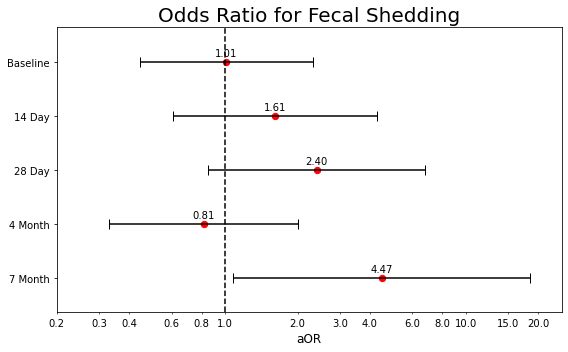

In [1634]:
err = np.array([np.array(temp.aOR - temp.aOR_low)  ,
                np.array(temp.aOR_high      - temp.aOR)   ])


plt.figure(figsize=(8,5))


plt.barh(temp['Time Point'], temp.aOR, xerr=err, facecolor='none', capsize = 5)
plt.scatter(temp.aOR,temp['Time Point'], color='r', s=40)
plt.axvline(1.0, color='black', linestyle='--')
plt.xlim(0.2,25)
plt.xlabel('aOR', fontsize=12)
plt.title('Odds Ratio for Fecal Shedding', fontsize=20)
plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()

#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))  # set regular formatting
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
#ax.ticklabel_format(style='plain',axis='x',useOffset=False)

locs = np.array([0.1, 0.2,0.3, 0.4, 0.6, 0.8, 1. , 2.,3, 4., 6., 8, 10., 15, 20., 50. ])
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

#annotations = np.round(df_result.odds_rat,1).astype(str)
#for i, label in enumerate(annotations):
#    plt.text(df_result.odds_rat[i],df_result.feature_2[i],label)

for i in range(len(temp.aOR)):
    x = np.array(temp.aOR)[i]
    y = np.array(temp['Time Point'])[i]
    label = "{:.2f}".format(x)
    
    #print(x,y,label)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,6), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout()

plt.savefig('odds_ratio_aim1_all_tps.pdf')

In [1635]:
# model without controlling for arm

In [1636]:
mod = smf.gee('cov_pos ~ TP_2 + TP_3 + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df1,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                    16
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:48:30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0308      0.229     -0.135      0.893      -0.480       0.418
TP_2          -0.3843      0.201     -1.913      0.056      -0.778       0.009
TP_3          -2.0613      0.304     -6.779      0.000      -2.657      -1.465
sex           -0.7659      0.495     -1.547      0.122      -1.737       0.205
final_age     -0.0468      0.018     -2.541      0.011      -0.083      -0.011
is_ZY          0.8973      0.162      5.545      0.000       0.580       1.214
is_N2         -0.3750      0.070     -5.354      0.000      -0.512      -0.238
is_E          -0.4173      0.079     -5.263      0.000      -0.573      -0.262
is_RDRP       -1.0350      0.110     -9.401      0.000      -1.251      -0.819
==============================================================================
Skew:                          0.2700   Kurtosis:                      -0.9718
Centered skew:                 0.2075   Centered kurtosis:             -0.0244
==============================================================================
"""

In [1637]:
cols = ['arm_v', 'TP_2', 'TP_3', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df1[cols].min())
lookup.loc[1] = np.array(df1[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', lookup.TP_2[0], lookup.TP_3[0]],
    [ 'TP2', lookup.TP_2[1], lookup.TP_3[0]],
    [ 'TP3', lookup.TP_2[0], lookup.TP_3[1]]],
    columns=['Time Point', 'TP_2',  'TP_3'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1638]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

In [1639]:
preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'

In [1641]:
temp = preds[preds['Sample & Target'] == 'mean']
temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])


,mean,err_low,err_high
Time Point,,,
Baseline,0.492293,0.109956,0.110706
14 Day,0.397688,0.115700,0.128389
28 Day,0.109865,0.050727,0.085219


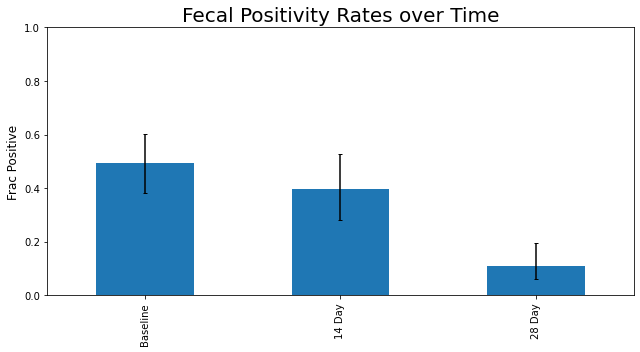

In [1645]:
plt.figure(figsize=(18,10))

temp = preds[preds['Sample & Target'] == 'mean']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Fecal Positivity Rates over Time', fontsize=20)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)
plt.tight_layout()
#fig1=plt.show()
plt.savefig('overall_pos_rate_first_3_tps.pdf')

<Figure size 1296x1440 with 0 Axes>

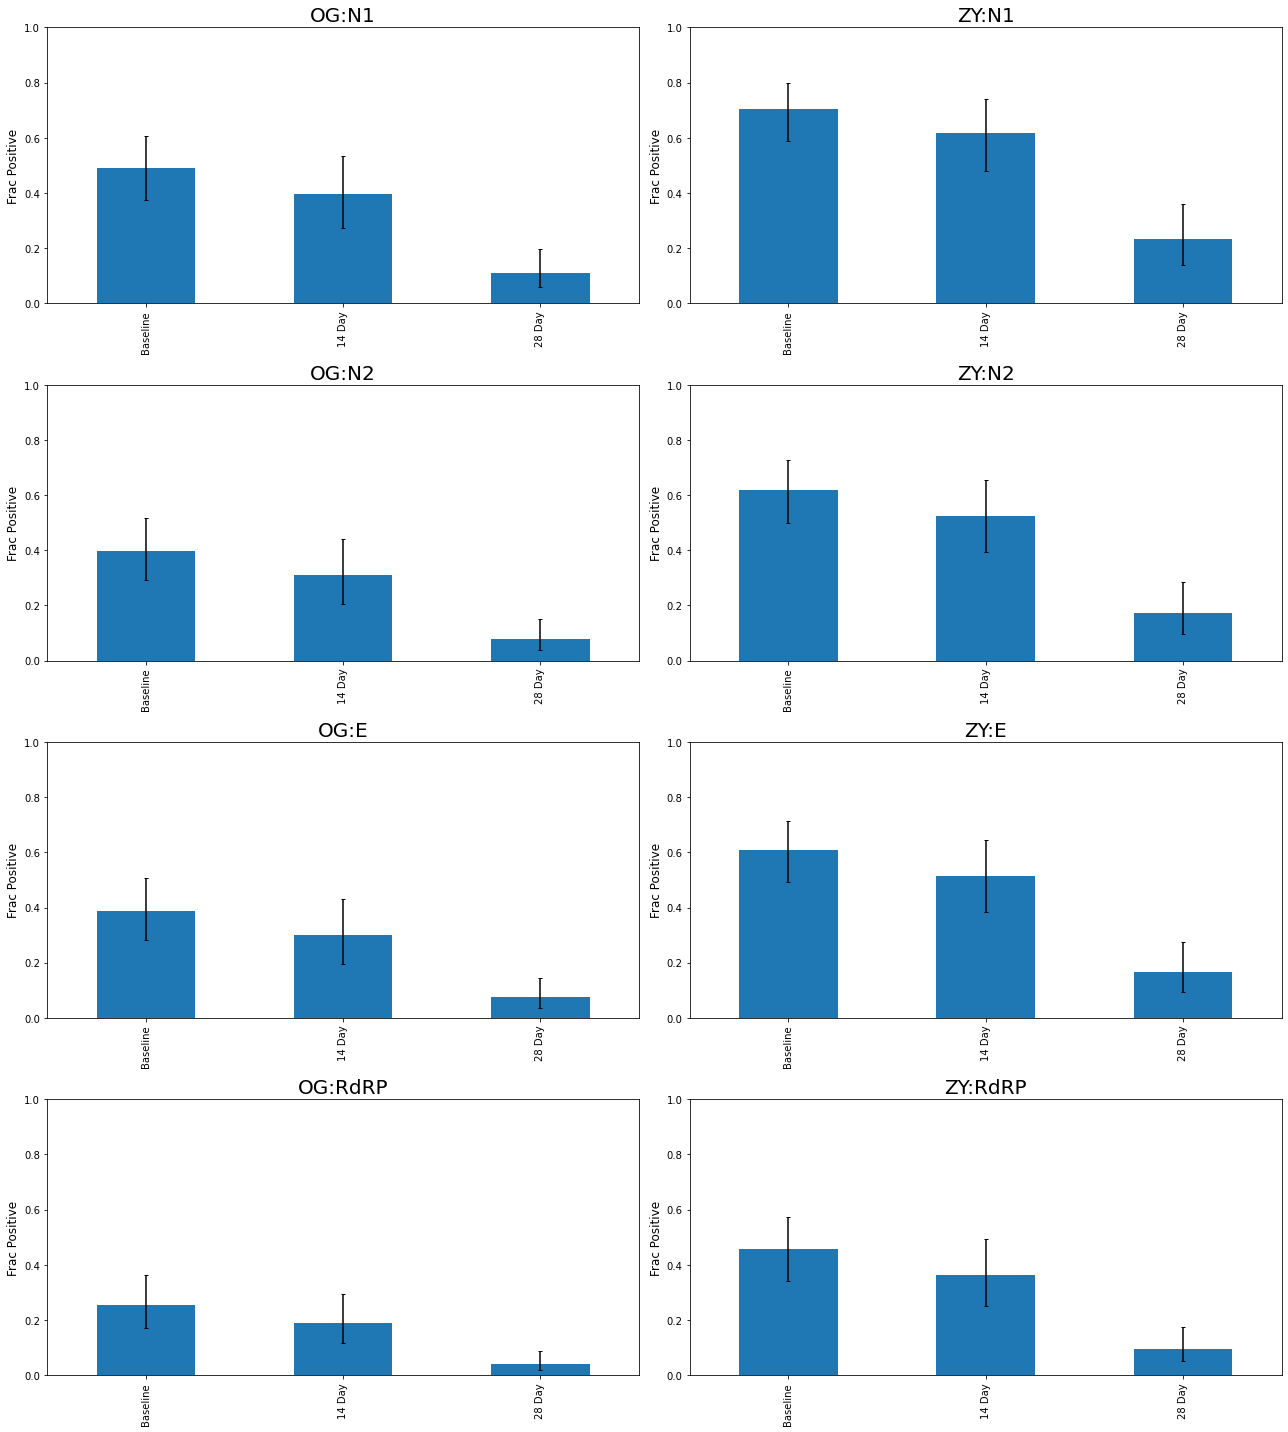

In [1661]:
plt.figure(figsize=(18,20))
fig, axes = plt.subplots(4,2, figsize=(18,20))


ax1 = axes.flatten()[0]
temp = preds[preds['Sample & Target'] == 'OG:N1']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax1)
ax1.set_title('OG:N1', fontsize=20)
ax1.set_ylim([0,1])
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Frac Positive', fontsize=12)

ax2 = axes.flatten()[1]
temp = preds[preds['Sample & Target'] == 'ZY:N1']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax2)
ax2.set_title('ZY:N1', fontsize=20)
ax2.set_ylim([0,1])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('Frac Positive', fontsize=12)



ax3 = axes.flatten()[2]
temp = preds[preds['Sample & Target'] == 'OG:N2']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax3)
ax3.set_title('OG:N2', fontsize=20)
ax3.set_ylim([0,1])
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('Frac Positive', fontsize=12)

ax4 = axes.flatten()[3]
temp = preds[preds['Sample & Target'] == 'ZY:N2']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax4)
ax4.set_title('ZY:N2', fontsize=20)
ax4.set_ylim([0,1])
ax4.set_xlabel('', fontsize=12)
ax4.set_ylabel('Frac Positive', fontsize=12)



ax5 = axes.flatten()[4]
temp = preds[preds['Sample & Target'] == 'OG:E']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax5)
ax5.set_title('OG:E', fontsize=20)
ax5.set_ylim([0,1])
ax5.set_xlabel('', fontsize=12)
ax5.set_ylabel('Frac Positive', fontsize=12)

ax6 = axes.flatten()[5]
temp = preds[preds['Sample & Target'] == 'ZY:E']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax6)
ax6.set_title('ZY:E', fontsize=20)
ax6.set_ylim([0,1])
ax6.set_xlabel('', fontsize=12)
ax6.set_ylabel('Frac Positive', fontsize=12)


ax7 = axes.flatten()[6]
temp = preds[preds['Sample & Target'] == 'OG:RDRP']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax7)
ax7.set_title('OG:RdRP', fontsize=20)
ax7.set_ylim([0,1])
ax7.set_xlabel('', fontsize=12)
ax7.set_ylabel('Frac Positive', fontsize=12)

ax8 = axes.flatten()[7]
temp = preds[preds['Sample & Target'] == 'ZY:RDRP']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, capsize=2, ax=ax8)
ax8.set_title('ZY:RdRP', fontsize=20)
ax8.set_ylim([0,1])
ax8.set_xlabel('', fontsize=12)
ax8.set_ylabel('Frac Positive', fontsize=12)

plt.tight_layout()
plt.savefig('gene_types.pdf')


In [1662]:
mod = smf.gee('cov_pos ~ TP_2 + TP_3 + TP_4 + TP_5 + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df2,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 4155
Model:                                 GEE   No. clusters:                       74
Method:                        Generalized   Min. cluster size:                  16
                      Estimating Equations   Max. cluster size:                  88
Family:                           Binomial   Mean cluster size:                56.1
Dependence structure:         Exchangeable   Num. iterations:                    17
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         15:09:22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0534      0.195      0.274      0.784      -0.329       0.436
TP_2           0.0421      0.244      0.173      0.863      -0.436       0.520
TP_3          -1.4049      0.287     -4.888      0.000      -1.968      -0.842
TP_4          -1.9853      0.263     -7.556      0.000      -2.500      -1.470
TP_5          -3.2737      0.365     -8.963      0.000      -3.990      -2.558
sex           -0.8965      0.404     -2.217      0.027      -1.689      -0.104
final_age     -0.0495      0.015     -3.266      0.001      -0.079      -0.020
is_ZY          0.3957      0.134      2.948      0.003       0.133       0.659
is_N2         -0.7858      0.078    -10.116      0.000      -0.938      -0.634
is_E          -0.8416      0.084     -9.986      0.000      -1.007      -0.676
is_RDRP       -1.3602      0.114    -11.930      0.000      -1.584      -1.137
==============================================================================
Skew:                          0.5289   Kurtosis:                      -0.1285
Centered skew:                 0.5348   Centered kurtosis:              0.1416
==============================================================================
"""

In [1665]:
cols = ['arm_v', 'TP_2', 'TP_3', 'TP_4', 'TP_5', 'TP_1_arm', 'TP_2_arm', 'TP_3_arm', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']
lookup = pd.DataFrame(columns=cols)
lookup.loc[0] = np.array(df2[cols].min())
lookup.loc[1] = np.array(df2[cols].max())
#lookup['0'] = np.array(df1[cols].min())
#lookup['1'] = np.array(df1[cols].max())
#lookup = pd.DataFrame(np.array(lookup.T[lookup.T.index.isin(['0', '1'])]), columns=[np.array(cols)])


ref1 = pd.DataFrame(
    [['TP1', lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0]],
    [ 'TP2', lookup.TP_2[1], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[0]],
    [ 'TP3', lookup.TP_2[0], lookup.TP_3[1], lookup.TP_4[0], lookup.TP_5[0]],
    [ 'TP4', lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[1], lookup.TP_5[0]],
    [ 'TP5', lookup.TP_2[0], lookup.TP_3[0], lookup.TP_4[0], lookup.TP_5[1]]],
    columns=['Time Point', 'TP_2',  'TP_3', 'TP_4', 'TP_5'])

ref2 = pd.DataFrame(
    [['mean',   0, 0, 0, 0, 0, 0],
    ['OG:N1',   0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:N2',   0, 0, lookup.is_ZY[0], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['OG:E',    0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['OG:RDRP', 0, 0, lookup.is_ZY[0], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]],
    ['ZY:N1',   0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:N2',   0, 0, lookup.is_ZY[1], lookup.is_N2[1], lookup.is_E[0], lookup.is_RDRP[0]],
    ['ZY:E',    0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[1], lookup.is_RDRP[0]],
    ['ZY:RDRP', 0, 0, lookup.is_ZY[1], lookup.is_N2[0], lookup.is_E[0], lookup.is_RDRP[1]]],
    columns=['Sample & Target', 'sex', 'final_age', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP'])

ref1['key'] = 0
ref2['key'] = 0
ref =  pd.merge(ref1, ref2, on = 'key')
ref.drop('key',1, inplace=True)

In [1666]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

In [1669]:
preds.loc[preds['Time Point'] == 'TP1', 'Time Point'] = 'Baseline'
preds.loc[preds['Time Point'] == 'TP2', 'Time Point'] = '14 Day'
preds.loc[preds['Time Point'] == 'TP3', 'Time Point'] = '28 Day'
preds.loc[preds['Time Point'] == 'TP4', 'Time Point'] = '4 Month'
preds.loc[preds['Time Point'] == 'TP5', 'Time Point'] = '7 Month'

In [1670]:
temp = preds[preds['Sample & Target'] == 'mean']
temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day', '4 Month', '7 Month'])


,mean,err_low,err_high
Time Point,,,
Baseline,0.513354,0.094850,0.093898
14 Day,0.523875,0.117283,0.114707
28 Day,0.205630,0.070555,0.094616
4 Month,0.126546,0.041372,0.057426
7 Month,0.038411,0.018585,0.034707


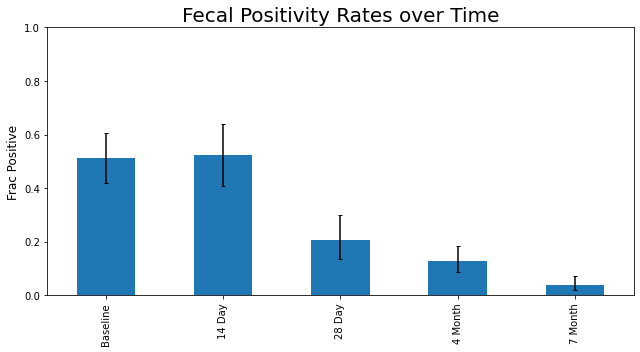

In [1672]:
plt.figure(figsize=(18,10))

temp = preds[preds['Sample & Target'] == 'mean']
data = temp.groupby('Time Point')[['mean', 'err_low', 'err_high']].mean().reindex(['Baseline', '14 Day', '28 Day', '4 Month', '7 Month'])
err = []
err.append([data['err_low'].values, data['err_high'].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5), capsize=2)

plt.title('Fecal Positivity Rates over Time', fontsize=20)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)
plt.tight_layout()
#fig1=plt.show()
plt.savefig('overall_pos_rate_all_tps.pdf')

In [1685]:
df_doe

,Unnamed: 0,Study.ID,Date.of.enrollment
0,0,55619-232,06/23/2020
1,2,55619-173,05/30/2020
2,4,55619-115,05/10/2020
3,8,55619-313,07/10/2020
4,10,55619-218,06/17/2020
...,...,...,...
108,4044,55619-337,07/16/2020
109,4562,55619-318,07/11/2020
110,4566,55619-326,07/13/2020
111,5166,55619-266,06/30/2020


In [1730]:
df_temp = df2.copy()

df_doe = pd.read_csv('date_of_enrollment.csv')
df_temp = pd.merge(df_temp, df_doe[['Study.ID', 'Date.of.enrollment']], on='Study.ID')

In [1731]:
def days_since(row):
    if df_temp['Date.Collected'][row] != 'missing':
        return (pd.to_datetime(df_temp['Date.Collected'][row]) - pd.to_datetime(df_temp['Date.of.enrollment'][row])).days
    else:
        if df_temp.TP_new[row] == '1':
            return 1
        if df_temp.TP_new[row] == '2':
            return 14
        if df_temp.TP_new[row] == '3':
            return 28
        if df_temp.TP_new[row] == '4': 
            return 3*28
        if df_temp.TP_new[row] == '5':
            return 6*28
        if df_temp.TP_new[row] == '6':
            return 280

In [1732]:
ans = np.array([])
for i in range(len(df_temp.index)):
    ans = np.append(ans, [days_since(i)])

In [1733]:
df_temp['days_since_randomization'] = ans

In [1734]:
df_time = pd.read_csv('time_to_nasal_neg.csv')
df_time['participantID'] = df_time.participantId

df_time['Study.ID'] = '55619-'
df_time.loc[df_time.participantID < 10, 'Study.ID'] = df_time['Study.ID'] + '00' + df_time.participantID.astype(str)
df_time.loc[(df_time.participantID >= 10) & (df_time.participantID < 100), 'Study.ID'] = df_time['Study.ID'] + '0' + df_time.participantID.astype(str)
df_time.loc[df_time.participantID >= 100, 'Study.ID'] = df_time['Study.ID'] + df_time.participantID.astype(str)

df_temp = pd.merge(df_temp, df_time[['Study.ID', 'time2stop']], on='Study.ID', how='left')
df_temp['nasal_pos'] = (df_temp.days_since_randomization < df_temp.time2stop).astype(int)

In [1735]:
df_temp.groupby(['TP_new', 'nasal_pos'])['Study.ID'].nunique()

TP_new  nasal_pos
1       0            15
        1            53
2       0            45
        1            12
3       0            60
4       0            57
5       0            60
6       0            23
Name: Study.ID, dtype: int64

In [1724]:
df_temp['TP_1_nasal'] = (df_temp.TP_new == '1').astype(int) * df_temp.nasal_pos
df_temp['TP_2_nasal'] = df_temp.TP_2 * df_temp.nasal_pos
df_temp['TP_3_nasal'] = df_temp.TP_3 * df_temp.nasal_pos

In [1727]:
X = df_temp[[ 'TP_2', 'TP_3', 'TP_1_nasal', 'TP_2_nasal',
         'sex', 'final_age',
        'is_ZY','is_N2', 'is_E', 'is_RDRP'
        ]]
X = sm.add_constant(X)#-X.mean()

y = np.array(df_temp['cov_pos'],  dtype=float)
est = sm.Logit(y, X).fit(maxiters = 100000)
est.summary2()

Optimization terminated successfully.
         Current function value: 0.526302
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.218      
Dependent Variable: y                AIC:              3856.6387  
Date:               2021-10-19 15:46 BIC:              3924.8449  
No. Observations:   3643             Log-Likelihood:   -1917.3    
Df Model:           10               LL-Null:          -2452.1    
Df Residuals:       3632             LLR p-value:      1.9102e-223
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const         -0.5790    0.1132   -5.1142  0.0000  -0.8008  -0.3571
TP_2           0.0156    0.1344    0.1163  0.9074  -0.2478   0.2790
TP_3          -1.1537    0.1398   -8.2519  0.0000  -1.4277  -0.8797
TP_1_nasal     1.2463    0.1353    9.2136  0.0000   0.9812   1.5115
TP_2_nasal     2.1017    0.1855   11.3272  0.0000   1.7381   2.4654
sex           -0.4347    0.0815   -5.3350  0.0000  -0.5944  -0.2750
final_age     -0.0327    0.0030  -10.8884  0.0000  -0.0385  -0.0268
is_ZY          1.1184    0.0818   13.6710  0.0000   0.9581   1.2788
is_N2         -0.3990    0.1098   -3.6330  0.0003  -0.6143  -0.1838
is_E          -0.4428    0.1099   -4.0274  0.0001  -0.6583  -0.2273
is_RDRP       -1.1013    0.1150   -9.5775  0.0000  -1.3267  -0.8759
==================================================================

"""

In [1728]:
start_pars = est.summary2().tables[1]['Coef.']

In [1729]:
mod = smf.gee('cov_pos ~ TP_2 + TP_3 + TP_1_nasal + TP_2_nasal + sex + final_age + is_ZY + is_N2 + is_E + is_RDRP',
              'Study.ID',
              df_temp,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit(first_dep_update=20,params_niter = 20,  maxiter = 10000) #first_dep_update=60, maxiter=10000
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     cov_pos   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                    36
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         15:46:09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6121      0.319     -1.922      0.055      -1.236       0.012
TP_2          -0.3338      0.240     -1.389      0.165      -0.805       0.137
TP_3          -1.7072      0.352     -4.844      0.000      -2.398      -1.016
TP_1_nasal     0.6236      0.345      1.810      0.070      -0.052       1.299
TP_2_nasal     1.5133      0.485      3.122      0.002       0.563       2.463
sex           -0.8626      0.493     -1.749      0.080      -1.829       0.104
final_age     -0.0579      0.020     -2.832      0.005      -0.098      -0.018
is_ZY          0.9306      0.176      5.297      0.000       0.586       1.275
is_N2         -0.3995      0.078     -5.135      0.000      -0.552      -0.247
is_E          -0.4440      0.088     -5.054      0.000      -0.616      -0.272
is_RDRP       -1.1063      0.121     -9.136      0.000      -1.344      -0.869
==============================================================================
Skew:                          0.3407   Kurtosis:                      -0.7646
Centered skew:                 0.2768   Centered kurtosis:              0.1298
==============================================================================
"""

In [1810]:
df1.columns

Index(['Study.ID', 'Target.Name', 'Date.Collected', 'replicant', 'TP_new',
       'sex', 'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2',
       'is_E', 'is_RDRP', 'TP_1', 'TP_1_arm', 'TP_2', 'TP_2_arm', 'TP_3',
       'TP_3_arm', 'viral.load', 'cov_pos', 'log_viral_load', 'viral_load'],
      dtype='object')

In [1817]:
#PASC
df_baseline_fecal = pd.DataFrame(df1[(df1.TP_new == '1') & (df1.is_N2 < 0) & (df1.is_E < 0) & (df1.is_RDRP < 0)].groupby('Study.ID')['cov_pos'].sum())
df_baseline_fecal['fecal'] = (df_baseline_fecal.cov_pos >=2).astype(int)

In [1820]:
df_pasc = pd.read_csv('PASC.csv')

df_pasc['Study.ID'] = '55619-'
df_pasc.loc[df_pasc.participant_id < 10, 'Study.ID'] = df_pasc['Study.ID'] + '00' + df_pasc.participant_id.astype(str)
df_pasc.loc[(df_pasc.participant_id >= 10) & (df_pasc.participant_id < 100), 'Study.ID'] = df_pasc['Study.ID'] + '0' + df_pasc.participant_id.astype(str)
df_pasc.loc[df_pasc.participant_id >= 100, 'Study.ID'] = df_pasc['Study.ID'] + df_pasc.participant_id.astype(str)

df_baseline_fecal = pd.merge(df_baseline_fecal, df_pasc, on='Study.ID', how='left')

In [1823]:
df_baseline_fecal.columns

Index(['Study.ID', 'cov_pos', 'fecal', 'participant_id', 'def2_m4', 'def2_m7',
       'def2_m10', 'group'],
      dtype='object')

In [1829]:
df_temp1 = df_baseline_fecal[['Study.ID', 'fecal', 'def2_m4']].copy()
df_temp1.rename(columns={'def2_m4': "PASC"}, inplace=True)
df_temp2 = df_baseline_fecal[['Study.ID', 'fecal', 'def2_m7']].copy()
df_temp2.rename(columns={'def2_m7': "PASC"}, inplace=True)
df_temp3 = df_baseline_fecal[['Study.ID', 'fecal', 'def2_m10']].copy()
df_temp3.rename(columns={"def2_m10": "PASC"}, inplace=True)

df_temp = pd.concat([df_temp1, df_temp2, df_temp3]).dropna()

In [1830]:
mod = smf.gee('PASC ~ fecal',
              'Study.ID',
              df_temp,
              cov_struct=sm.cov_struct.Exchangeable(),
              family=sm.families.Binomial())

res = mod.fit(first_dep_update=20,params_niter = 20,  maxiter = 10000) #first_dep_update=60, maxiter=10000
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                        PASC   No. Observations:                  214
Model:                                 GEE   No. clusters:                       77
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   3
Family:                           Binomial   Mean cluster size:                 2.8
Dependence structure:         Exchangeable   Num. iterations:                    24
Date:                     Tue, 19 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         16:17:34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3028      0.398     -3.270      0.001      -2.084      -0.522
fecal          0.4898      0.466      1.052      0.293      -0.423       1.403
==============================================================================
Skew:                          0.9873   Kurtosis:                      -0.9776
Centered skew:                 0.1101   Centered kurtosis:              1.6645
==============================================================================
"""

In [1736]:
df_symp = pd.read_csv('lambda_daily_symptom_survey.csv')

In [1737]:
def days_since(row):
    if df['Date.Collected'][row] != 'missing':
        return (pd.to_datetime(df['Date.Collected'][row]) - pd.to_datetime(df['Date.of.enrollment'][row])).days
    else:
        if df.TP_new[row] == '1':
            return 1
        if df.TP_new[row] == '2':
            return 14
        if df.TP_new[row] == '3':
            return 28
        if df.TP_new[row] == '4': 
            return 3*28
        if df.TP_new[row] == '5':
            return 6*28
        if df.TP_new[row] == '6':
            return 280

In [1738]:
days_since(8)

1

In [1739]:
ans = np.array([])
for i in range(len(df.index)):
    ans = np.append(ans, [days_since(i)])

In [1740]:
df['days_since_randomization'] = ans

In [1741]:
df[df.TP_1 == 1].groupby('days_since_randomization')['Study.ID'].nunique()

days_since_randomization
0.0    13
1.0    32
2.0    14
3.0    31
4.0     5
5.0     8
6.0     2
7.0     2
Name: Study.ID, dtype: int64

In [1742]:
df.symptom_onset.isna().sum()

0

In [1743]:
df['days_since_symptom_onset'] = np.abs(df.symptom_onset) + df.days_since_randomization

In [1744]:
#df.to_csv('temp.csv')

In [1745]:
#pd.DataFrame(df.groupby(['Study.ID', 'Date.of.enrollment', 'Date.Collected', 'TP_new']).size()).to_csv('temp.csv')

In [1746]:
df_samples = pd.read_csv('temp.csv')
df_sympt = pd.read_csv('lambda_daily_symptom_survey.csv')

In [1747]:
df_sympt

,row_number,participant_id,redcap_event_name,temp,timetemp,cough,amountcough,sob,amountsob,fatigue,...,rash,kindrash___1,kindrash___2,kindrash___3,kindrash___4,kindrash___5,kindrash___6,othersx,otherimport,daily_record_of_symptoms_complete
0,2,1,Daily Record Of Symptoms(1),97.6,10:00,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,3,1,Daily Record Of Symptoms(2),96.6,10:30,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,4,1,Daily Record Of Symptoms(3),97.8,9:16,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,5,1,Daily Record Of Symptoms(4),96.6,10:30,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,6,1,Daily Record Of Symptoms(5),97.2,9:30,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3352,346,Daily Record Of Symptoms(24),98.0,13:00,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3351,3353,346,Daily Record Of Symptoms(25),98.0,20:00,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3352,3354,346,Daily Record Of Symptoms(26),98.0,17:00,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3353,3355,346,Daily Record Of Symptoms(27),98.0,9:30,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [1748]:
df_temp = pd.merge(df_samples, df_sympt, left_on = 'row number', right_on = 'row_number')

In [1749]:
df_temp.columns

Index(['Study.ID', 'Date.of.enrollment', 'Date.Collected', 'TP_new',
       'day number', 'row number', 'a', 'b', 'day number.1', 'OP positive',
       'row_number', 'participant_id', 'redcap_event_name', 'temp', 'timetemp',
       'cough', 'amountcough', 'sob', 'amountsob', 'fatigue', 'amountfatig',
       'sorethroat', 'chills', 'nose', 'smell', 'head', 'amounthead', 'aches',
       'amountaches', 'joints', 'amountjoints', 'chest', 'amountchest',
       'nausea', 'amountnausea', 'vomit', 'amountvomit', 'abdomen',
       'amountabpain', 'diarrhea', 'num_dia', 'injectpain', 'activitypain',
       'rash', 'kindrash___1', 'kindrash___2', 'kindrash___3', 'kindrash___4',
       'kindrash___5', 'kindrash___6', 'othersx', 'otherimport',
       'daily_record_of_symptoms_complete'],
      dtype='object')

In [1750]:
df_temp['any_gi'] = (df_temp.abdomen + df_temp.vomit + df_temp.nausea + df_temp.diarrhea > 0).astype(float)
df_temp['lower_gi'] = (df_temp.abdomen + df_temp.diarrhea > 0).astype(float)
df_temp['upper_gi'] = (df_temp.vomit + df_temp.nausea  > 0).astype(float)

In [1751]:
df_temp[['Study.ID', 'Date.of.enrollment', 'Date.Collected', 'TP_new',
       'day number', 'OP positive', 'temp', 'cough', 'sob',  'fatigue', 
       'sorethroat', 'chills', 'nose', 'smell',
       'head', 'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi']].fillna(0.0)

,Study.ID,Date.of.enrollment,Date.Collected,TP_new,day number,OP positive,temp,cough,sob,fatigue,...,joints,chest,nausea,vomit,abdomen,diarrhea,rash,any_gi,lower_gi,upper_gi
0,55619-001,4/25/20,4/26/20,1.0,1.0,0.0,97.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55619-001,4/25/20,5/5/20,2.0,10.0,0.0,98.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55619-001,4/25/20,5/23/20,3.0,28.0,0.0,97.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55619-004,4/27/20,4/29/20,1.0,2.0,1.0,98.1,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55619-004,4/27/20,5/7/20,2.0,10.0,0.0,97.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,55619-345,7/17/20,7/19/20,1.0,2.0,1.0,98.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,55619-345,7/17/20,missing,2.0,14.0,0.0,98.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,55619-345,7/17/20,missing,3.0,28.0,0.0,98.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,55619-346,7/17/20,7/19/20,1.0,2.0,1.0,98.5,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [1752]:
df_temp.mean()

TP_new                                  1.929329
day number                             13.526502
row number                           1575.780919
b                                     213.056537
day number.1                           13.526502
OP positive                             0.360424
row_number                           1575.780919
participant_id                        213.056537
temp                                   97.787279
cough                                   0.230496
amountcough                             1.369231
sob                                     0.085106
amountsob                               1.958333
fatigue                                 0.223404
amountfatig                             1.888889
sorethroat                              0.134752
chills                                  0.035461
nose                                    0.092199
smell                                   0.212766
head                                    0.163121
amounthead          

In [1753]:
dfx = df[df.TP_new.isin(['1', '2', '3'])][['Study.ID', 'Target.Name', 'replicant', 'Date.Collected', 'Date.of.enrollment',
       'symptom_onset', 'TP_new', 'sex', 'final_age', 'sero_baseline_v', 'arm_v', 
                                'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 
              'arm_v', 'TP_1', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4', 'TP_4_arm', 'TP_5',
       'TP_5_arm', 'TP_6', 'TP_6_arm', 'days_since_randomization', 'days_since_symptom_onset',
                                      'viral.load', 'cov_pos'
                                     ]].copy()

dfy = df_temp[['Study.ID', 'Date.of.enrollment', 'Date.Collected', 'TP_new',
       'OP positive', 'temp', 'cough', 'sob',  'fatigue', 
       'sorethroat', 'chills', 'nose', 'smell',
       'head', 'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi']].fillna(0.0).copy()
dfy['TP_new'] = dfy.TP_new.astype(int).astype(str)
#dfy.loc[dfy['Date.Collected'].str[1] == '/', 'Date.Collected'] = '0' + dfy[dfy['Date.Collected'].str[1] == '/']['Date.Collected']



In [1754]:
dfx.loc[dfx['Date.Collected'].str[3] == '0', 'Date.Collected'] = dfx[dfx['Date.Collected'].str[3] == '0']['Date.Collected'].str[0:3] +  dfx[dfx['Date.Collected'].str[3] == '0']['Date.Collected'].str[4:]
dfx.loc[dfx['Date.Collected'].str[0] == '0', 'Date.Collected'] = dfx[dfx['Date.Collected'].str[0] == '0']['Date.Collected'].str[1:] 
dfx.loc[dfx['Date.Collected'].str[-2:] == '20', 'Date.Collected'] = dfx[dfx['Date.Collected'].str[-2:] == '20']['Date.Collected'].str[:-2] 

In [1755]:
df_final = pd.merge(dfx, dfy, on=['Study.ID', 'Date.Collected', 'TP_new'])

In [1756]:
df_final.columns

Index(['Study.ID', 'Target.Name', 'replicant', 'Date.Collected',
       'Date.of.enrollment_x', 'symptom_onset', 'TP_new', 'sex', 'final_age',
       'sero_baseline_v', 'arm_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP',
       'arm_v', 'TP_1', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4',
       'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
       'days_since_randomization', 'days_since_symptom_onset', 'viral.load',
       'cov_pos', 'Date.of.enrollment_y', 'OP positive', 'temp', 'cough',
       'sob', 'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head',
       'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi'],
      dtype='object')

In [1757]:
df_final['Study.ID'].nunique()

111

In [1758]:
X.mean()

const         1.000000
TP_2          0.324458
TP_3          0.317870
TP_1_nasal    0.247873
TP_2_nasal    0.068076
sex           0.008770
final_age    -0.898645
is_ZY        -0.066267
is_N2         0.000536
is_E         -0.000209
is_RDRP      -0.000393
dtype: float64

In [1759]:
for col in ['sex', 'final_age', 'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP']:
     # 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'OP positive', 'cov_pos' ]:
    df_final[col] = df_final[col] - df_final[col].mean()

df_final['both_fecal_and_nasal'] = df_final.cov_pos * df_final['OP positive']
df_final['nasal_pos'] = df_final['OP positive']
df_final['fecal_pos'] = df_final['cov_pos']
df_final['fecal_pos_nasal_neg'] = df_final.fecal_pos * (1-df_final.nasal_pos)

In [1760]:
df_final

,Study.ID,Target.Name,replicant,Date.Collected,Date.of.enrollment_x,symptom_onset,TP_new,sex,final_age,sero_baseline_v,...,abdomen,diarrhea,rash,any_gi,lower_gi,upper_gi,both_fecal_and_nasal,nasal_pos,fecal_pos,fecal_pos_nasal_neg
0,55619-232,E,COVRNA0096_E,missing,06/23/2020,0.0,2,-0.423003,2.088663,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
1,55619-232,RdRP,COVRNA0096_RdRP,missing,06/23/2020,0.0,2,-0.423003,2.088663,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
2,55619-232,E,COVRNA0096_E,missing,06/23/2020,0.0,2,-0.423003,2.088663,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
3,55619-232,RdRP,COVRNA0096_RdRP,missing,06/23/2020,0.0,2,-0.423003,2.088663,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
4,55619-232,N1,COVRNA0096_N1,missing,06/23/2020,0.0,2,-0.423003,2.088663,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,55619-326,RdRP,COVRNA0461_RdRP,missing,07/13/2020,-5.0,3,-0.423003,-2.911337,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3639,55619-326,N1,COVRNA0461_N1,missing,07/13/2020,-5.0,3,-0.423003,-2.911337,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3640,55619-326,N2,COVRNA0461_N2,missing,07/13/2020,-5.0,3,-0.423003,-2.911337,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3641,55619-326,N1,COVRNA0461_N1,missing,07/13/2020,-5.0,3,-0.423003,-2.911337,-0.403788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [1761]:
df_final.groupby(['nasal_pos', 'fecal_pos'])['both_fecal_and_nasal'].mean()

nasal_pos  fecal_pos
0.0        0            0.0
           1            0.0
1.0        0            0.0
           1            1.0
Name: both_fecal_and_nasal, dtype: float64

In [1377]:
# SKIP DOWN

In [404]:
df_final['days_since_onset_capped_21'] = df_final.days_since_symptom_onset.clip(upper=21)
df_final['days_since_onset_capped_28'] = df_final.days_since_symptom_onset.clip(upper=28)


df_final['symptom_week_1'] = (df_final.days_since_symptom_onset < 7).astype(int)
df_final['symptom_week_2'] = ((df_final.days_since_symptom_onset >= 7) & (df_final.days_since_symptom_onset < 14)).astype(int)
df_final['symptom_week_3_and_4'] = ((df_final.days_since_symptom_onset >= 14) & (df_final.days_since_symptom_onset < 28)).astype(int)
#df_final['symptom_week_4'] = ((df_final.days_since_symptom_onset >= 21) & (df_final.days_since_symptom_onset < 28)).astype(int)
df_final['symptom_month_plus'] = (df_final.days_since_symptom_onset >= 28).astype(int)

#df_final['final_age'] = df_final.final_age / 20
#df_final['days_since_onset_capped_21'] = df_final.days_since_onset_capped_21 / 20


In [405]:
df_final[df_final.symptom_month_plus== 1][['sex', 'final_age', 
              'sero_baseline_v',
              'is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'cov_pos', 'any_gi']].describe()

,sex,final_age,sero_baseline_v,is_ZY,is_N2,is_E,is_RDRP,cov_pos,any_gi
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.021350,0.703229,0.020925,0.028276,0.000071,-0.000478,0.000341,0.204583,0.058920
std,0.497097,13.645970,0.494502,0.499716,0.432953,0.432953,0.433426,0.403561,0.235571
min,-0.423003,-19.911337,-0.403788,-0.449629,-0.249520,-0.250069,-0.250069,0.000000,0.000000
25%,-0.423003,-8.911337,-0.403788,-0.449629,-0.249520,-0.250069,-0.250069,0.000000,0.000000
50%,-0.423003,-3.911337,-0.403788,-0.449629,-0.249520,-0.250069,-0.250069,0.000000,0.000000
75%,0.576997,13.088663,0.596212,0.550371,-0.249520,-0.250069,0.499931,0.000000,0.000000
max,0.576997,31.088663,0.596212,0.550371,0.750480,0.749931,0.749931,1.000000,1.000000


In [406]:
X = df_final[['sex', 'final_age', 
              'days_since_symptom_onset',
              #'days_since_onset_capped_21',
              #'symptom_week_2', 'symptom_week_3_and_4','symptom_month_plus',
              'sero_baseline_v',
              'is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'fecal_pos'
              #, 'nasal_pos', 'both_fecal_and_nasal'
             ]] #
X = sm.add_constant(X) #-X.mean()

y = np.array(df_final['any_gi'],  dtype=float)
est = sm.Logit(y, X).fit(cov_type='cluster',cov_kwds={'groups':df_final['Study.ID'].values})
est.summary2()


Optimization terminated successfully.
         Current function value: 0.418225
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.094     
Dependent Variable:    y                  AIC:                3067.1850 
Date:                  2021-09-22 15:30   BIC:                3129.1907 
No. Observations:      3643               Log-Likelihood:     -1523.6   
Df Model:              9                  LL-Null:            -1680.8   
Df Residuals:          3633               LLR p-value:        2.3696e-62
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    -0.9058   0.3675 -2.4650 0.0137 -1.6261 -0.1856
sex                       0.6918   0.3999  1.7301 0.0836 -0.0919  1.4755
final_age                 0.0019   0.0152  0.1262 0.8996 -0.0279  0.0317
days_since_symptom_onset -0.0588   0.0180 -3.2655 0.0011 -0.0942 -0.0235
sero_baseline_v           0.1110   0.3977  0.2792 0.7801 -0.6685  0.8906
is_ZY                    -0.0057   0.1354 -0.0422 0.9664 -0.2711  0.2597
is_N2                     0.0526   0.0235  2.2386 0.0252  0.0065  0.0986
is_E                      0.0619   0.0281  2.2012 0.0277  0.0068  0.1170
is_RDRP                   0.1471   0.0655  2.2466 0.0247  0.0188  0.2755
fecal_pos                 0.6620   0.2858  2.3160 0.0206  0.1018  1.2222
========================================================================

"""

In [127]:
X.describe()

,const,sex,final_age,days_since_symptom_onset,sero_baseline_v,is_ZY,is_N2,is_E,is_RDRP,fecal_pos
count,3731.0,3.731000e+03,3.731000e+03,3731.000000,3.731000e+03,3.731000e+03,3.731000e+03,3.731000e+03,3.731000e+03,3731.000000
mean,1.0,1.477718e-16,1.286890e-13,19.746717,2.839296e-15,2.257701e-15,-5.368111e-17,-4.585212e-16,-3.738336e-16,0.390780
std,0.0,4.938818e-01,1.366104e+01,11.268734,4.896659e-01,4.963346e-01,4.327996e-01,4.331094e-01,4.331094e-01,0.487991
min,1.0,-4.216028e-01,-2.190271e+01,1.000000,-3.985527e-01,-4.390244e-01,-2.495310e-01,-2.500670e-01,-2.500670e-01,0.000000
25%,1.0,-4.216028e-01,-9.902707e+00,10.000000,-3.985527e-01,-4.390244e-01,-2.495310e-01,-2.500670e-01,-2.500670e-01,0.000000
50%,1.0,-4.216028e-01,-3.902707e+00,18.000000,-3.985527e-01,-4.390244e-01,-2.495310e-01,-2.500670e-01,-2.500670e-01,0.000000
75%,1.0,5.783972e-01,1.309729e+01,30.000000,6.014473e-01,5.609756e-01,-2.495310e-01,2.499330e-01,2.499330e-01,1.000000
max,1.0,5.783972e-01,3.109729e+01,45.000000,6.014473e-01,5.609756e-01,7.504690e-01,7.499330e-01,7.499330e-01,1.000000


<AxesSubplot:>

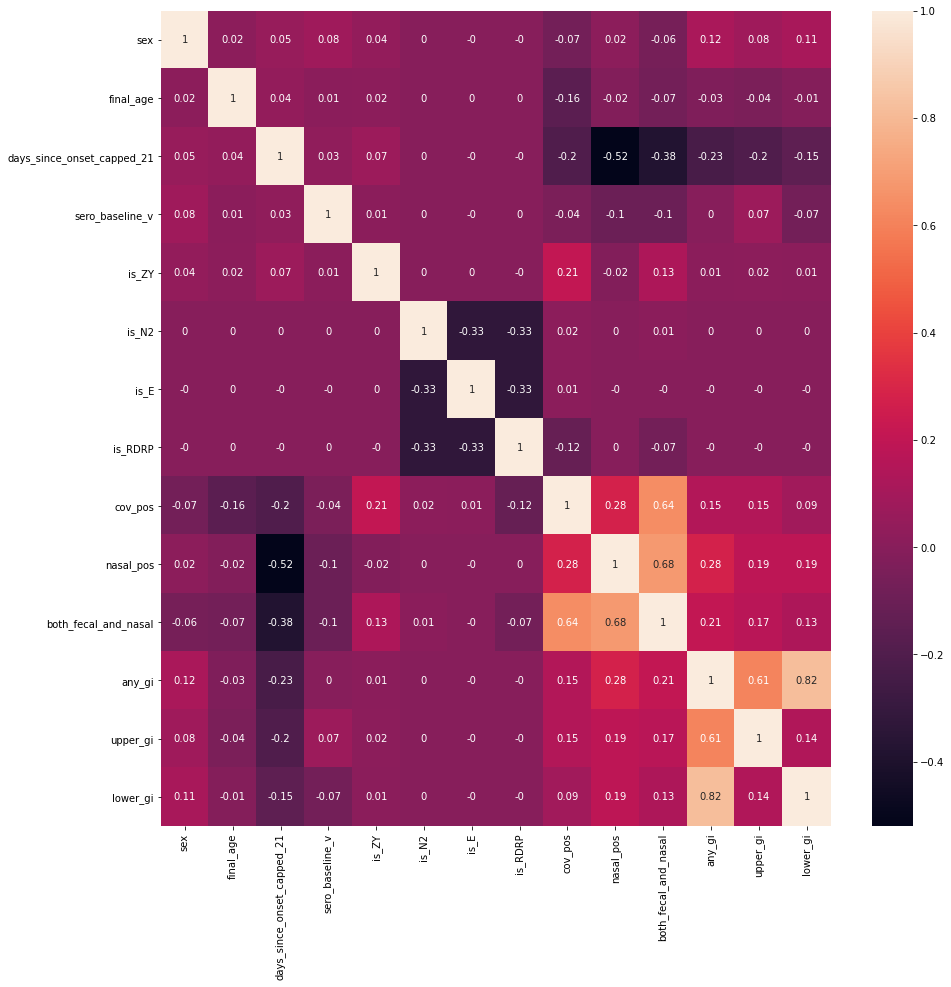

In [128]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(df_final[['sex', 'final_age', 
              'days_since_onset_capped_21',
              #'symptom_week_2', 'symptom_week_3_and_4','symptom_month_plus',
              'sero_baseline_v',
              'is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'cov_pos', 'nasal_pos', 'both_fecal_and_nasal',
         'any_gi', 'upper_gi', 'lower_gi']].corr(),2), annot=True)

In [129]:
df_final.groupby(['cov_pos', 'nasal_pos'])['upper_gi'].describe()

count      mean       std  min  25%  50%  75%  max
cov_pos nasal_pos                                                     
0       0.0        1701.0  0.019988  0.140001  0.0  0.0  0.0  0.0  1.0
        1.0         572.0  0.110140  0.313338  0.0  0.0  0.0  0.0  1.0
1       0.0         688.0  0.078488  0.269134  0.0  0.0  0.0  0.0  1.0
        1.0         770.0  0.157143  0.364172  0.0  0.0  0.0  0.0  1.0

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [131]:
X = df_final[['sex', 'final_age', 
              'days_since_onset_capped_21',
              #'symptom_week_2', 'symptom_week_3_and_4','symptom_month_plus',
              'sero_baseline_v',
              'is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'cov_pos', 'nasal_pos', 'both_fecal_and_nasal',
         'any_gi']].iloc[:,:-1]

calc_vif(X)

,variables,VIF
0,sex,1.022567
1,final_age,1.029967
2,days_since_onset_capped_21,1.577055
3,sero_baseline_v,1.018003
4,is_ZY,1.065908
5,is_N2,1.503199
6,is_E,1.505055
7,is_RDRP,1.531786
8,cov_pos,2.917035
9,nasal_pos,2.704007


In [132]:
df_final['days_since_symptom_onset_squared'] = (df.days_since_symptom_onset - df.days_since_symptom_onset.mean()) ** 2 / 100
df_final['days_since_symptom_onset_sqrt'] = (df.days_since_symptom_onset) ** (1/2)

In [133]:
df_final.columns

Index(['Study.ID', 'Target.Name', 'replicant', 'Date.Collected',
       'Date.of.enrollment_x', 'symptom_onset', 'TP_new', 'sex', 'final_age',
       'sero_baseline_v', 'arm_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP',
       'arm_v', 'TP_1', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4',
       'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
       'days_since_randomization', 'days_since_symptom_onset', 'viral.load',
       'cov_pos', 'Date.of.enrollment_y', 'OP positive', 'temp', 'cough',
       'sob', 'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head',
       'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi', 'both_fecal_and_nasal',
       'nasal_pos', 'fecal_pos', 'fecal_pos_nasal_neg',
       'days_since_onset_capped_21', 'days_since_onset_capped_28',
       'symptom_week_1', 'symptom_week_2', 'symptom_week_3_and_4',
       'symptom_month_plus', 'days_since_symptom_onset_squared',
       'days_since_sympt

In [134]:
df_final['final_age'] = df_final.final_age / 20
df_final['days_since_onset_capped_21'] = df_final.days_since_onset_capped_21 / 21

In [135]:
symptom = 'upper_gi'
features = ['sex', 'final_age', 'days_since_onset_capped_21', 'sero_baseline_v',
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos']
formula = symptom + ' ~ ' + ' + '.join(features)

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_final[features] )
y = df_final[symptom]

est = sm.Logit(y, X).fit(maxiter=100)
start_pars = est.summary2().tables[1]['Coef.']

mod = smf.gee(formula, 
              'Study.ID',
              df_final,
              cov_struct=ex,
              family=sm.families.Binomial())

#res = mod.fit()
res = mod.fit(first_dep_update=20,params_niter = 20, start_params = start_pars, maxiter = 1000) 
res.summary()

Optimization terminated successfully.
         Current function value: 0.228583
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                    upper_gi   No. Observations:                 3731
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                33.6
Dependence structure:         Exchangeable   Num. iterations:                    34
Date:                     Wed, 22 Sep 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         14:15:41
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.0637      0.488     -2.178      0.029      -2.021      -0.106
sex                            0.2315      0.912      0.254      0.800      -1.556       2.019
final_age                      0.2345      0.571      0.410      0.682      -0.885       1.354
days_since_onset_capped_21    -2.0797      0.580     -3.584      0.000      -3.217      -0.942
sero_baseline_v               -0.0541      0.882     -0.061      0.951      -1.782       1.674
is_ZY                         -0.0139      0.115     -0.121      0.904      -0.239       0.211
is_N2                          0.0323      0.017      1.924      0.054      -0.001       0.065
is_E                           0.0334      0.018      1.824      0.068      -0.002       0.069
is_RDRP                        0.0908      0.043      2.119      0.034       0.007       0.175
fecal_pos                      0.4144      0.199      2.085      0.037       0.025       0.804
==============================================================================
Skew:                          2.9378   Kurtosis:                       7.6652
Centered skew:                 0.9648   Centered kurtosis:              5.1671
==============================================================================
"""

In [98]:
ex.summary()

'The correlation between two observations in the same cluster is 0.392'

In [99]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['fecal_pos'])]
temp['feature'] = symptom
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])

temp

,coef,std err,z,P>|z|,[0.025,0.975],feature,aOR,aOR_high,aOR_low
fecal_pos,0.4144,0.199,2.085,0.037,0.025,0.804,upper_gi,1.513462,2.231,1.0267


In [100]:
np.round(np.exp(res.summary2().tables[1]['Coef.']['fecal_pos']
                + 1.95 * res.summary2().tables[1]['Std.Err.']['fecal_pos']),2)

2.23

In [101]:
ref = pd.DataFrame(
    [['no fecal shedding', 0,0,0,0,0,0,0,0,df_final.cov_pos.min()],
     ['yes fecal shedding', 0,0,0,0,0,0,0,0,df_final.cov_pos.max()]],
     columns = ['status', 'sex', 'final_age', 'days_since_onset_capped_21',
              'sero_baseline_v','is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'fecal_pos']
)

In [102]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

Text(0, 0.5, 'Frac Positive')

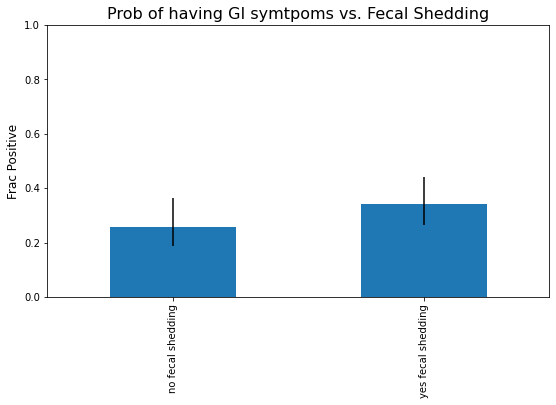

In [103]:
plt.figure(figsize=(18,10))

temp = preds
data = temp.groupby(['status'])[['mean', 'err_low', 'err_high']].mean()
err = data[['err_low', 'err_high']].T.values/2
#err.append([data[( 'err_low', 'control')].values, data[( 'err_high', 'control')].values])
#err.append([data[( 'err_low', 'test')].values, data[( 'err_high', 'test')].values])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5))

plt.title('Prob of having GI symtpoms vs. Fecal Shedding', fontsize=16)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

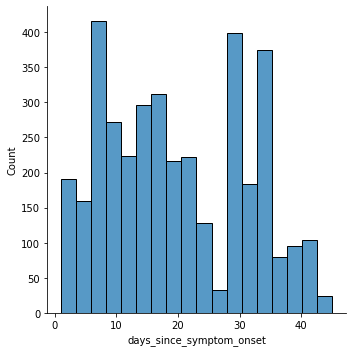

In [104]:
sns.displot(df_final, x="days_since_symptom_onset")

In [105]:
df_final.columns

Index(['Study.ID', 'Target.Name', 'replicant', 'Date.Collected',
       'Date.of.enrollment_x', 'symptom_onset', 'TP_new', 'sex', 'final_age',
       'sero_baseline_v', 'arm_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP',
       'arm_v', 'TP_1', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4',
       'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
       'days_since_randomization', 'days_since_symptom_onset', 'viral.load',
       'cov_pos', 'Date.of.enrollment_y', 'OP positive', 'temp', 'cough',
       'sob', 'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head',
       'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi', 'both_fecal_and_nasal',
       'nasal_pos', 'fecal_pos', 'fecal_pos_nasal_neg',
       'days_since_onset_capped_21', 'days_since_onset_capped_28',
       'symptom_week_1', 'symptom_week_2', 'symptom_week_3_and_4',
       'symptom_month_plus', 'days_since_symptom_onset_squared',
       'days_since_sympt

In [106]:
symptom = 'vomit'
features = ['sex', 'final_age', 'days_since_onset_capped_21', 'sero_baseline_v',
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos_nasal_neg', 'nasal_pos', 'both_fecal_and_nasal']
formula = symptom + ' ~ ' + ' + '.join(features)

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_final[features] )
y = df_final[symptom]

est = sm.Logit(y, X).fit(maxiter=10000)
start_pars = est.summary2().tables[1]['Coef.']

est.summary2()

         Current function value: 0.033819
         Iterations: 10000


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
=============================================================================================
Model:                        Logit                     Pseudo R-squared:          0.315     
Dependent Variable:           vomit                     AIC:                       276.3566  
Date:                         2021-09-16 14:46          BIC:                       351.0498  
No. Observations:             3731                      Log-Likelihood:            -126.18   
Df Model:                     11                        LL-Null:                   -184.14   
Df Residuals:                 3719                      LLR p-value:               1.1940e-19
Converged:                    0.0000                    Scale:                     1.0000    
No. Iterations:               10000.0000                                                     
---------------------------------------------------------------------------------------------
                            Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------------------
const                      -34.3558  1039674.6500 -0.0000 1.0000  -2037759.2255  2037690.5138
sex                          2.1689        0.4861  4.4619 0.0000         1.2162        3.1217
final_age                    1.4942        0.3298  4.5310 0.0000         0.8479        2.1406
days_since_onset_capped_21  -3.0213        0.9616 -3.1418 0.0017        -4.9061       -1.1365
sero_baseline_v             -0.7752        0.4651 -1.6668 0.0955        -1.6868        0.1363
is_ZY                        0.1256        0.3953  0.3178 0.7506        -0.6492        0.9005
is_N2                        0.0317        0.5195  0.0611 0.9513        -0.9864        1.0498
is_E                         0.0515        0.5204  0.0989 0.9212        -0.9684        1.0714
is_RDRP                      0.1277        0.5299  0.2409 0.8096        -0.9110        1.1663
fecal_pos_nasal_neg         -2.6244 10407507.4146 -0.0000 1.0000 -20398342.3258 20398337.0770
nasal_pos                   30.8927  1039674.6500  0.0000 1.0000  -2037693.9770  2037755.7624
both_fecal_and_nasal         0.4819        0.4283  1.1250 0.2606        -0.3576        1.3214
=============================================================================================

"""

In [107]:
df_final.groupby(['fecal_pos_nasal_neg', 'nasal_pos', 'both_fecal_and_nasal']).vomit.mean()

fecal_pos_nasal_neg  nasal_pos  both_fecal_and_nasal
0.0                  0.0        0.0                     0.000000
                     1.0        0.0                     0.022727
                                1.0                     0.024675
1.0                  0.0        0.0                     0.000000
Name: vomit, dtype: float64

In [148]:
#model including both


symptom = 'vomit'
features = ['sex', 'final_age', 'days_since_onset_capped_21', 'sero_baseline_v',
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos_nasal_neg', 'nasal_pos', 'both_fecal_and_nasal']
formula = symptom + ' ~ ' + ' + '.join(features)

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_final[features] )
y = df_final[symptom]

est = sm.Logit(y, X).fit(maxiter=100)
start_pars = est.summary2().tables[1]['Coef.']

mod = smf.gee(formula, 
              'Study.ID',
              df_final,
              cov_struct=ex,
              family=sm.families.Binomial())

#res = mod.fit()
res = mod.fit(first_dep_update=20,params_niter = 20, start_params = start_pars, maxiter = 1000) 
res.summary()


         Current function value: 0.033819
         Iterations: 100


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


LinAlgError: Singular matrix

In [2094]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['fecal_pos_nasal_neg', 'both_fecal_and_nasal'])]
temp['feature'] = feat
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])\

temp

,coef,std err,z,P>|z|,[0.025,0.975],feature,aOR,aOR_high,aOR_low
fecal_pos_nasal_neg,0.3391,0.277,1.223,0.221,-0.204,0.882,diarrhea,1.403684,2.409092,0.817872
both_fecal_and_nasal,-0.4443,0.317,-1.401,0.161,-1.066,0.177,diarrhea,0.641273,1.189877,0.345608


In [2069]:
ref = pd.DataFrame(
    [['no fecal shedding', 'no nasal shedding'  , 0,0,0,0,0,0,0,0,df_final.fecal_pos.min(),df_final.nasal_pos.min(),df_final.both_fecal_and_nasal.min()],
     ['yes fecal shedding', 'no nasal shedding' , 0,0,0,0,0,0,0,0,df_final.fecal_pos.max(),df_final.nasal_pos.min(),df_final.both_fecal_and_nasal.min()],
     ['no fecal shedding', 'yes nasal shedding' , 0,0,0,0,0,0,0,0,df_final.fecal_pos.min(),df_final.nasal_pos.max(),df_final.both_fecal_and_nasal.min()],
     ['yes fecal shedding', 'yes nasal shedding', 0,0,0,0,0,0,0,0,df_final.fecal_pos.max(),df_final.nasal_pos.max(),df_final.both_fecal_and_nasal.max()]],
     columns = ['fecal status', 'nasal status', 'sex', 'final_age', 'days_since_symptom_onset',
              'sero_baseline_v','is_ZY', 'is_N2', 'is_E', 'is_RDRP',  'fecal_pos', 'nasal_pos', 'both_fecal_and_nasal']
)

In [1620]:
preds = pd.concat([ref, res.get_prediction(ref).summary_frame(alpha=.05)], axis=1)

preds['err_high'] = preds.mean_ci_upper - preds['mean']
preds['err_low'] = preds['mean'] - preds.mean_ci_lower

In [1621]:
res.get_prediction(ref).summary_frame(alpha=.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.241927,0.119873,0.081419,0.534676
1,0.295226,0.134622,0.105434,0.598203
2,0.363073,0.105180,0.189464,0.581613
3,0.316166,0.112368,0.143060,0.561489


In [1622]:
np.round(preds[['mean', 'mean_se']],2)

,mean,mean_se
0,0.24,0.12
1,0.30,0.13
2,0.36,0.11
3,0.32,0.11


Text(0, 0.5, 'Frac Positive')

<Figure size 1296x720 with 0 Axes>

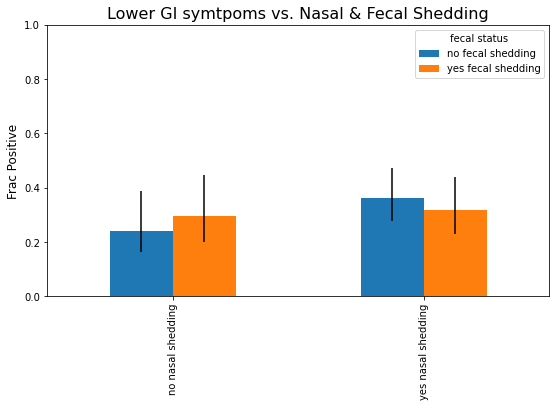

In [1623]:
plt.figure(figsize=(18,10))

temp = preds
data = temp.groupby(['fecal status', 'nasal status'])[['mean', 'err_low', 'err_high']].mean().unstack(level='fecal status')
err = []
err.append([data[( 'err_low', 'no fecal shedding')].values/2, data[( 'err_high', 'no fecal shedding')].values/2])
err.append([data[( 'err_low', 'yes fecal shedding')].values/2, data[( 'err_high', 'yes fecal shedding')].values/2])
data['mean'].plot(kind='bar', yerr=err, figsize=(9,5))

plt.title('Lower GI symtpoms vs. Nasal & Fecal Shedding', fontsize=16)
plt.ylim([0,1])
plt.xlabel('', fontsize=12)
plt.ylabel('Frac Positive', fontsize=12)

In [1523]:
data

mean                              err_low  \
fecal status       no fecal shedding yes fecal shedding no fecal shedding   
nasal status                                                                
no nasal shedding           0.369684           0.463559          0.197258   
yes nasal shedding          0.593695           0.535033          0.182509   

                                               err_high                     
fecal status       yes fecal shedding no fecal shedding yes fecal shedding  
nasal status                                                                
no nasal shedding            0.226626          0.253101            0.24275  
yes nasal shedding           0.181562          0.159846            0.17273

In [1512]:
#aim 3

In [714]:
df_final.columns

Index(['Study.ID', 'Target.Name', 'replicant', 'Date.Collected',
       'Date.of.enrollment_x', 'symptom_onset', 'TP_new', 'sex', 'final_age',
       'sero_baseline_v', 'arm_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP',
       'arm_v', 'TP_1', 'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4',
       'TP_4_arm', 'TP_5', 'TP_5_arm', 'TP_6', 'TP_6_arm',
       'days_since_randomization', 'days_since_symptom_onset', 'viral.load',
       'cov_pos', 'Date.of.enrollment_y', 'OP positive', 'temp', 'cough',
       'sob', 'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head',
       'aches', 'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'rash', 'any_gi', 'lower_gi', 'upper_gi', 'both_fecal_and_nasal',
       'nasal_pos', 'fecal_pos', 'fecal_pos_nasal_neg'],
      dtype='object')

In [715]:
df_final[(df_final.is_ZY > 0) & (df_final['Target.Name'] == 'N1')].groupby('days_since_symptom_onset').fecal_pos.mean()

days_since_symptom_onset
1.0     0.583333
2.0     1.000000
3.0     0.800000
4.0     1.000000
5.0     1.000000
6.0     0.700000
7.0     0.900000
8.0     0.954545
9.0     0.857143
10.0    0.833333
11.0    0.785714
12.0    1.000000
13.0    1.000000
14.0    0.375000
15.0    0.625000
16.0    0.388889
17.0    0.625000
18.0    0.500000
19.0    0.857143
20.0    1.000000
21.0    0.571429
22.0    0.800000
23.0    1.000000
24.0    0.000000
25.0    1.000000
26.0    0.000000
27.0    0.666667
28.0    0.400000
29.0    0.450000
30.0    0.333333
31.0    0.142857
32.0    0.600000
33.0    0.409091
34.0    0.500000
35.0    0.333333
36.0    0.250000
37.0    0.166667
38.0    0.125000
40.0    0.000000
41.0    0.000000
42.0    0.166667
45.0    0.500000
49.0    0.000000
Name: fecal_pos, dtype: float64

Text(0.5, 1.0, 'Prob of Fecal Positive')

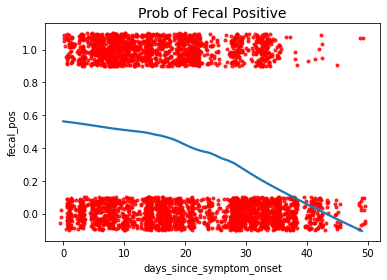

In [709]:
sns.regplot(x = df_final.days_since_symptom_onset, 
            y = df_final.fecal_pos - df_final.fecal_pos.min(), 
            y_jitter=0.1,
            x_jitter=0.5,
            scatter=True,
           lowess = True, ci=95, scatter_kws={'color':'r', 's':9})
plt.title('Prob of Fecal Positive', fontsize=14)

Text(0.5, 1.0, 'Prob of Nasal Positive')

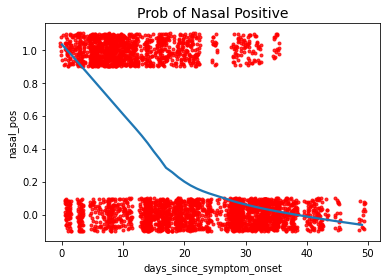

In [710]:
sns.regplot(x = df_final.days_since_symptom_onset, 
            y = df_final.nasal_pos - df_final.nasal_pos.min(), 
            y_jitter=0.1,
            x_jitter=0.5,
            scatter=True,
           lowess = True, ci=95, scatter_kws={'color':'r', 's':9})
plt.title('Prob of Nasal Positive', fontsize=14)

In [1507]:
df_final.groupby('upper_gi').size()

upper_gi
0.0    3459
1.0     272
dtype: int64

In [1441]:
72/632

0.11392405063291139

In [407]:
#resume here

In [1762]:
xls = pd.ExcelFile('demographics.xlsx')

In [1763]:
xls.sheet_names

#df_symp = pd.read_excel(xls, 'Sheet1')

['Sheet1', 'Sheet2']

In [1764]:
xls.sheet_names

df_demo = pd.read_excel(xls, 'Sheet1')

In [1765]:
df_demo.columns

Index(['participantID', 'age', 'older50', 'wbc', 'alt', 'ast', 'nlymphs',
       'cough_0', 'sob_0', 'temp', 'race', 'ethnicity', 'bmi', 'bmigrp',
       'age60', 'alt94', 'lowlym', 'male', 'fever', 'asymptomatic', 'seropos',
       'tx'],
      dtype='object')

In [1766]:
df_demo['Study.ID'] = '55619-'
df_demo.loc[df_demo.participantID < 10, 'Study.ID'] = df_demo['Study.ID'] + '00' + df_demo.participantID.astype(str)
df_demo.loc[(df_demo.participantID >= 10) & (df_demo.participantID < 100), 'Study.ID'] = df_demo['Study.ID'] + '0' + df_demo.participantID.astype(str)
df_demo.loc[df_demo.participantID >= 100, 'Study.ID'] = df_demo['Study.ID'] + df_demo.participantID.astype(str)


In [1767]:
pd.merge(df1, df_demo, on='Study.ID')['Study.ID'].nunique()

111

In [1768]:
df1['Study.ID'].nunique()

111

In [1769]:
df_demo = df_demo[df_demo['Study.ID'].isin(set(df1['Study.ID']))]

In [1770]:
df_demo.columns

Index(['participantID', 'age', 'older50', 'wbc', 'alt', 'ast', 'nlymphs',
       'cough_0', 'sob_0', 'temp', 'race', 'ethnicity', 'bmi', 'bmigrp',
       'age60', 'alt94', 'lowlym', 'male', 'fever', 'asymptomatic', 'seropos',
       'tx', 'Study.ID'],
      dtype='object')

In [1771]:
df_final[df_final['TP_new'] == '1']['Study.ID'].nunique()

102

In [1772]:
df_temp = pd.read_csv('lambda_baseline_symptoms.csv')

<AxesSubplot:>

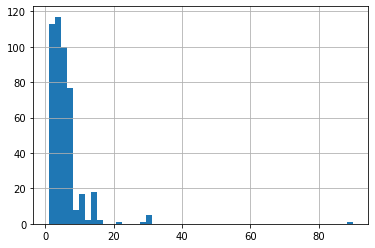

In [1773]:
df_temp.duration.hist(bins=50)

In [1774]:
df_temp.columns

Index(['participantId', 'symptomf', 'sympday', 'severityf', 'response',
       'duration'],
      dtype='object')

In [1775]:
df_temp.groupby('symptomf',dropna=False).size()

symptomf
Abdominal pain           118
Body aches (myalgias)    119
Chest pain/pressure      119
Chills                   119
Cough                    119
Decreased smell          117
Diarrhea                 119
Fatigue                  117
Headache                 119
Joint pain               118
Nausea                   119
Rash                     119
Runny nose               118
Shortness of breath      119
Sore throat              118
Temperature >98.6F       117
Vomiting                 118
dtype: int64

In [1776]:
df_temp[df_temp.participantId==206]

,participantId,symptomf,sympday,severityf,response,duration
809,206,Abdominal pain,0,NaN,None,NaN
810,206,Body aches (myalgias),0,NaN,None,NaN
811,206,Chest pain/pressure,0,NaN,None,NaN
812,206,Chills,0,NaN,None,NaN
813,206,Cough,0,NaN,None,NaN
814,206,Decreased smell,0,NaN,Yes,NaN
815,206,Diarrhea,0,NaN,None,NaN
816,206,Fatigue,0,NaN,None,NaN
817,206,Headache,0,Mild,Mild,2.0
818,206,Joint pain,0,NaN,None,NaN


In [1777]:
df_temp['has_it'] = (df_temp.response != 'None').astype(int)
df_temp['symptom_days'] = df_temp.duration.clip(upper = 22).fillna(0)
df_temp.loc[df_temp.symptom_days == 22, 'symptom_days'] = 0

In [1778]:
symptoms = ['Abdominal pain',
             'Body aches (myalgias)',
             'Chest pain/pressure', 
             'Chills',
             'Cough',
             'Decreased smell',
             'Diarrhea',
             'Fatigue',
             'Headache',
             'Joint pain',
             'Nausea',
             'Rash',
             'Runny nose',
             'Shortness of breath',
             'Sore throat',
             'Temperature >98.6F',
             'Vomiting'
           ]

df_baseline = pd.DataFrame(set(df_temp.participantId), columns=['participantId'])

for col in symptoms:
    print(col)
    tt = df_temp[df_temp.symptomf == str(col)].groupby('participantId').has_it.sum()
    df_baseline = pd.merge(df_baseline, tt, on='participantId', how='left').rename(columns={'has_it': col}).fillna(0)

    
tt = df_temp.groupby('participantId').symptom_days.max()
df_baseline = pd.merge(df_baseline, tt, on='participantId', how='left').rename(columns={'has_it': 'first_symptom'}).fillna(0)
    
df_baseline['Study.ID'] = ''
df_baseline.loc[df_baseline.participantId < 10, 'Study.ID'] = '55619-00' + df_baseline.participantId.astype(str)
df_baseline.loc[(df_baseline.participantId >= 10) & (df_baseline.participantId < 100), 'Study.ID'] = '55619-0' + df_baseline.participantId.astype(str)
df_baseline.loc[df_baseline.participantId >= 100, 'Study.ID'] = '55619-' + df_baseline.participantId.astype(str)


Abdominal pain
Body aches (myalgias)
Chest pain/pressure
Chills
Cough
Decreased smell
Diarrhea
Fatigue
Headache
Joint pain
Nausea
Rash
Runny nose
Shortness of breath
Sore throat
Temperature >98.6F
Vomiting


In [1779]:
df_baseline

,participantId,Abdominal pain,Body aches (myalgias),Chest pain/pressure,Chills,Cough,Decreased smell,Diarrhea,Fatigue,Headache,Joint pain,Nausea,Rash,Runny nose,Shortness of breath,Sore throat,Temperature >98.6F,Vomiting,symptom_days,Study.ID
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55619-001
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55619-004
2,12,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,55619-012
3,16,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,55619-016
4,108,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,14.0,55619-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,337,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,55619-337
116,339,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,55619-339
117,344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55619-344
118,345,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,55619-345


In [1780]:
df_demo

,participantID,age,older50,wbc,alt,ast,nlymphs,cough_0,sob_0,temp,...,bmigrp,age60,alt94,lowlym,male,fever,asymptomatic,seropos,tx,Study.ID
0,1,55,1,7.9,30,29,3.40,0.0,0.0,98.2,...,Normal,0,0,0,0,0.0,1,0.0,Saline placebo,55619-001
1,4,30,0,8.8,24,21,2.60,NaN,NaN,97.8,...,Overweight,0,0,0,0,0.0,1,1.0,Lambda,55619-004
2,12,55,1,3.4,24,24,1.00,1.0,1.0,98.3,...,Normal,0,0,0,0,0.0,0,0.0,Saline placebo,55619-012
3,16,56,1,6.8,18,29,1.70,0.0,0.0,37.3,...,Normal,0,0,0,0,0.0,0,0.0,Lambda,55619-016
4,108,21,0,6.2,18,25,1.70,1.0,1.0,98.1,...,Normal,0,0,0,1,0.0,0,1.0,Lambda,55619-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,337,56,1,3.2,53,41,0.54,1.0,0.0,97.8,...,Overweight,0,0,1,1,0.0,0,0.0,Lambda,55619-337
116,339,54,1,4.8,28,33,0.80,0.0,0.0,98.0,...,Normal,0,0,1,1,0.0,0,1.0,Saline placebo,55619-339
117,344,34,0,6.8,43,23,2.70,0.0,0.0,98.1,...,Normal,0,0,0,1,0.0,1,1.0,Lambda,55619-344
118,345,31,0,4.3,57,46,2.40,0.0,0.0,98.5,...,Obese,0,0,0,0,0.0,0,0.0,Saline placebo,55619-345


In [1781]:
df_baseline[['Study.ID', 'symptom_days']].to_csv('days_to_symptom_onset.csv')

In [1782]:
tt = pd.merge(df_demo, df_baseline, on='Study.ID')

tt = pd.merge(tt, df_final.groupby('Study.ID').mean()[['sero_baseline_v', 'arm_v', 'symptom_onset']], on='Study.ID')


In [1783]:
tt['Female'] = 1 - tt.male
tt['Hispanic'] = (tt.ethnicity=='Hispanic').astype(int)
tt['White'] = ((tt.race == 'White') & (tt.ethnicity=='Non-Hispanic')).astype(int)
tt['Asian'] = ((tt.race == 'Asian') & (tt.ethnicity=='Non-Hispanic')).astype(int)
tt['Unknown'] = ((tt.race == 'Unknown') & (tt.ethnicity!='Hispanic')).astype(int)
tt['More than one'] = (tt.race =='More than one race').astype(int)

tt['Any GI'] = (tt['Nausea'] + tt['Vomiting'] + tt['Abdominal pain'] + tt['Diarrhea'] > 0).astype(int)
tt['fever_2'] = (tt.temp >= 99.5).astype(int)
tt['arm'] = (tt['tx'] == 'Lambda').astype(int)

tt['sero_baseline_v'] = (tt.sero_baseline_v > 0).astype(int)
tt['symptom_onset'] = - tt.symptom_onset

In [1784]:
binary = ['Female', 'Hispanic', 'White', 'Asian', 'Unknown',  'asymptomatic', 
'Abdominal pain',
       'Body aches (myalgias)', 'Chest pain/pressure', 'Chills', 'Cough',
       'Decreased smell', 'Diarrhea', 'Fatigue', 'Headache', 'Joint pain',
       'Nausea', 'Rash', 'Runny nose', 'Shortness of breath', 'Sore throat',
        'Vomiting', 'fever', 'fever_2',  'sero_baseline_v', 'arm']

ordinal = ['age', 'bmi', 'symptom_days', 'wbc', 'nlymphs','alt', 'ast', 'symptom_onset']

In [1785]:
import pingouin as pg

ans=pd.DataFrame([], columns=['feature', 'Overall', 'GI', 'no GI', 'ASD'])
for i in range(len(binary)):
    b = binary[i]
    overall = tt[b].sum().astype(str) +' (' + np.round(100*tt[b].mean(),1).astype(str) + '%)'
    GI = tt[tt['Any GI'] == 1][b].sum().astype(str) +' (' + np.round(100*tt[tt['Any GI'] == 1][b].mean(),1).astype(str) + '%)'
    no_GI = tt[tt['Any GI'] != 1][b].sum().astype(str) +' (' + np.round(100*tt[tt['Any GI'] != 1][b].mean(),1).astype(str) + '%)'
    asd=np.round(pg.compute_effsize(tt[tt['Any GI'] == 0][b], tt[tt['Any GI'] == 1][b], eftype='cohen'),2)
    ans.loc[i] = [b,overall, GI, no_GI, asd]
    
for j in range(len(ordinal)):
    b = ordinal[j]
    overall = np.round(np.percentile(tt[b],50),1).astype(str) + ' (' + np.round(np.percentile(tt[b],25),1).astype(str) + ', ' + np.round(np.percentile(tt[b],75),1).astype(str) + ')'
    GI = np.round(np.percentile(tt[tt['Any GI'] == 1][b],50),1).astype(str) + ' (' + np.round(np.percentile(tt[tt['Any GI'] == 1][b],25),1).astype(str) + ', ' + np.round(np.percentile(tt[tt['Any GI'] == 1][b],75),1).astype(str) + ')'
    no_GI = np.round(np.percentile(tt[tt['Any GI'] != 1][b],50),1).astype(str) + ' (' + np.round(np.percentile(tt[tt['Any GI'] != 1][b],25),1).astype(str) + ', ' + np.round(np.percentile(tt[tt['Any GI'] != 1][b],75),1).astype(str) + ')'
    asd=np.round(pg.compute_effsize(tt[tt['Any GI'] == 0][b], tt[tt['Any GI'] == 1][b], eftype='cohen'),2)
    ans.loc[len(binary) + j] = [b,overall, GI, no_GI, asd]

In [1786]:
ans

,feature,Overall,GI,no GI,ASD
0,Female,46 (41.4%),26 (48.1%),20 (35.1%),-0.27
1,Hispanic,72 (64.9%),38 (70.4%),34 (59.6%),-0.22
2,White,28 (25.2%),12 (22.2%),16 (28.1%),0.13
3,Asian,4 (3.6%),3 (5.6%),1 (1.8%),-0.20
4,Unknown,6 (5.4%),1 (1.9%),5 (8.8%),0.31
5,asymptomatic,8 (7.2%),0 (0.0%),8 (14.0%),0.56
6,Abdominal pain,13.0 (11.7%),13.0 (24.1%),0.0 (0.0%),-0.80
7,Body aches (myalgias),59.0 (53.2%),42.0 (77.8%),17.0 (29.8%),-1.09
8,Chest pain/pressure,21.0 (18.9%),15.0 (27.8%),6.0 (10.5%),-0.45
9,Chills,44.0 (39.6%),32.0 (59.3%),12.0 (21.1%),-0.84


In [1787]:
tt.groupby('Any GI').size()

Any GI
0    57
1    54
dtype: int64

In [1788]:
54/111

0.4864864864864865

In [1789]:
np.round(np.percentile(tt[tt['Any GI'] == 1][b],50),1).astype(str) + ' (' + np.round(np.percentile(tt[tt['Any GI'] == 1][b],25),1).astype(str) + ', ' + np.round(np.percentile(tt[tt['Any GI'] == 1][b],75),1).astype(str) + ')'

'6.0 (5.0, 8.0)'

In [1790]:
np.round(np.percentile(tt[b],50),1).astype(str) + ' (' + np.round(np.percentile(tt[b],25),1).astype(str) + ', ' + np.round(np.percentile(tt[b],75),1).astype(str) + ')'

'5.0 (3.0, 7.0)'

In [1791]:
tt.describe()

,participantID,age,older50,wbc,alt,ast,nlymphs,cough_0,sob_0,temp,...,symptom_onset,Female,Hispanic,White,Asian,Unknown,More than one,Any GI,fever_2,arm
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,110.000000,110.000000,108.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.000000
mean,216.252252,39.216216,0.270270,5.828829,42.135135,36.945946,1.659009,0.563636,0.254545,97.855556,...,5.477477,0.414414,0.648649,0.252252,0.036036,0.054054,0.0,0.486486,0.090090,0.486486
std,78.547087,13.522645,0.446113,2.192483,39.047404,27.336236,0.630020,0.498204,0.437599,5.934886,...,4.040357,0.494855,0.479558,0.436275,0.187225,0.227150,0.0,0.502084,0.287609,0.502084
min,1.000000,18.000000,0.000000,2.500000,13.000000,18.000000,0.540000,0.000000,0.000000,37.300000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,152.000000,29.000000,0.000000,4.250000,22.000000,25.000000,1.195000,0.000000,0.000000,98.075000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,222.000000,36.000000,0.000000,5.500000,30.000000,30.000000,1.500000,1.000000,0.000000,98.400000,...,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,280.000000,51.500000,1.000000,7.100000,48.500000,39.000000,2.250000,1.000000,0.750000,98.700000,...,7.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,346.000000,64.000000,1.000000,14.200000,287.000000,260.000000,3.400000,1.000000,1.000000,100.700000,...,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [1792]:
pd.DataFrame.drop_duplicates(tt[['Study.ID', 'symptom_days', 'symptom_onset']])

,Study.ID,symptom_days,symptom_onset
0,55619-001,0.0,-0.0
1,55619-004,0.0,-0.0
2,55619-012,5.0,5.0
3,55619-016,10.0,10.0
4,55619-108,14.0,14.0
...,...,...,...
106,55619-337,5.0,5.0
107,55619-339,8.0,8.0
108,55619-344,0.0,-0.0
109,55619-345,3.0,3.0


In [1793]:
df_final_2 = pd.merge(df_final,tt[['Study.ID','symptom_days']], on='Study.ID')

df_final_2['days_since_symptom_onset_2'] = np.abs(df_final_2.symptom_days) + df_final_2.days_since_randomization
df_final_2['days_since_symptom_onset_capped_2'] = df_final_2.days_since_symptom_onset_2.clip(upper=21) / 21
df_final_2['log_days_since_symptom_onset'] = np.log10(1 + df_final_2.days_since_symptom_onset_2)
df_final_2['days_since_symptom_onset_2'] = df_final_2.days_since_symptom_onset_2 / 50

df_final_2 = df_final_2.loc[:,~df_final_2.columns.duplicated()]

In [1794]:
df_final_2.groupby('arm_v').nausea.mean()

arm_v
0    0.095756
1    0.031025
Name: nausea, dtype: float64

In [1795]:
df_time = pd.read_csv('time_to_nasal_neg.csv')
df_time['participantID'] = df_time.participantId

df_time['Study.ID'] = '55619-'
df_time.loc[df_time.participantID < 10, 'Study.ID'] = df_time['Study.ID'] + '00' + df_time.participantID.astype(str)
df_time.loc[(df_time.participantID >= 10) & (df_time.participantID < 100), 'Study.ID'] = df_time['Study.ID'] + '0' + df_time.participantID.astype(str)
df_time.loc[df_time.participantID >= 100, 'Study.ID'] = df_time['Study.ID'] + df_time.participantID.astype(str)

df_final_2 = pd.merge(df_final_2, df_time[['Study.ID', 'time2stop']], on='Study.ID', how='left')
df_final_2['nasal_pos_2'] = (df_final_2.days_since_randomization < df_final_2.time2stop).astype(int)
df_final_2['both_pos_2'] = df_final_2.nasal_pos_2 * df_final_2.fecal_pos

df_final_2['fever_995'] = (df_final.temp>=99.5).astype(int)

In [1796]:
df_final_2.groupby(['nasal_pos', 'nasal_pos_2']).size()

nasal_pos  nasal_pos_2
0.0        0              2301
           1                64
1.0        0               175
           1              1103
dtype: int64

In [1797]:
df_final_2.columns

Index(['Study.ID', 'Target.Name', 'replicant', 'Date.Collected',
       'Date.of.enrollment_x', 'symptom_onset', 'TP_new', 'sex', 'final_age',
       'sero_baseline_v', 'arm_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'TP_1',
       'TP_2', 'TP_2_arm', 'TP_3', 'TP_3_arm', 'TP_4', 'TP_4_arm', 'TP_5',
       'TP_5_arm', 'TP_6', 'TP_6_arm', 'days_since_randomization',
       'days_since_symptom_onset', 'viral.load', 'cov_pos',
       'Date.of.enrollment_y', 'OP positive', 'temp', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'rash',
       'any_gi', 'lower_gi', 'upper_gi', 'both_fecal_and_nasal', 'nasal_pos',
       'fecal_pos', 'fecal_pos_nasal_neg', 'symptom_days',
       'days_since_symptom_onset_2', 'days_since_symptom_onset_capped_2',
       'log_days_since_symptom_onset', 'time2stop', 'nasal_pos_2',
       'both_pos_2', 'fever_995'],
      dtype='object')

In [1798]:
df_final_2[['fatigue', 'sex', 'final_age', 'log_days_since_symptom_onset', 'sero_baseline_v', 
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos']].mean()

fatigue                         2.105408e-01
sex                             1.925352e-15
final_age                      -7.312246e-14
log_days_since_symptom_onset    1.218683e+00
sero_baseline_v                -8.130928e-15
is_ZY                          -4.410478e-15
is_N2                          -1.350065e-17
is_E                           -3.148121e-17
is_RDRP                        -2.870794e-17
fecal_pos                       4.002196e-01
dtype: float64

In [1799]:
pd.DataFrame(df_final_2[['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']].mean())

,0
any_gi,0.173483
nausea,0.063684
vomit,0.006588
abdomen,0.059292
diarrhea,0.074664
fever_995,0.024156
cough,0.228383
sob,0.079056
fatigue,0.210541
sorethroat,0.135877


In [1800]:
df_final_2['Study_ID'] = df_final_2['Study.ID'].str.split('-').str[1].astype(int)
df_final_2[['sex', 'final_age',  'log_days_since_symptom_onset', 'sero_baseline_v', 
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos', 'nasal_pos_2', 'Study_ID',
            'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'rash',
       'any_gi', 'fever_995']].sort_values(by=['Study_ID', 'log_days_since_symptom_onset']).to_csv('data_Q2_28day.csv')

In [1801]:
cols = ['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']

test = 'fecal_pos'

df_ans = pd.DataFrame([], columns = ['features', 'aOR', 'aOR_low', 'aOR_high', 'p'])

for i in range(len(cols)):
    symptom = cols[i]
    features = ['sex', 'final_age', 'log_days_since_symptom_onset',  
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP'] + [test]
    formula = symptom + ' ~ ' + ' + '.join(features)

    ex = sm.cov_struct.Exchangeable()

    X = sm.add_constant(df_final_2[features] )
    y = df_final_2[symptom]

    est = sm.Logit(y, X).fit(maxiter=1000)
    start_pars = est.summary2().tables[1]['Coef.']

    mod = smf.gee(formula, 
              'Study.ID',
              df_final_2,
              cov_struct=ex,
              family=sm.families.Binomial())

    res = mod.fit(first_dep_update=20,params_niter = 50, start_params = start_pars, maxiter = 5000) 
    
    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index.isin([test])]
    
    df_ans.loc[i] = [symptom, 
                     np.exp(temp.coef.values[0]), 
                     np.exp(temp.coef.values[0] - 1.95 * temp['std err'].values[0]), 
                     np.exp(temp.coef.values[0] + 1.95 * temp['std err'].values[0]), 
                     temp['P>|z|'].values[0]]

Optimization terminated successfully.
         Current function value: 0.430880
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.219253
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.032797
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.209503
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.256782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.109018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.511593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.266802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.463480
         Iterations 6


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:229: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: overflow encountered in square
  return t/(1 + t)**2


Optimization terminated successfully.
         Current function value: 0.345180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.143744
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.254914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448413
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.409084
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.317889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.048212
         Iterations 10


In [1802]:
df_ans

,features,aOR,aOR_low,aOR_high,p
0,any_gi,1.383477,0.940353,2.035416,0.101
1,nausea,1.609301,1.085347,2.386195,0.018
2,vomit,3.201438,1.112600,9.211936,0.032
3,abdomen,2.048074,1.086705,3.859934,0.027
4,diarrhea,1.096474,0.628984,1.911427,0.746
5,fever_995,0.962617,0.352625,2.627808,0.941
6,cough,1.499153,0.991536,2.266643,0.057
7,sob,0.897717,0.516981,1.558853,0.703
8,fatigue,NaN,NaN,NaN,NaN
9,sorethroat,1.356082,0.967780,1.900183,0.079


In [1454]:
#now do both
df_final_2['nasal_neg_fecal_pos'] = ((df_final_2.nasal_pos_2 == 0) & (df_final_2.fecal_pos == 1)).astype(int)
df_final_2['nasal_pos_fecal_pos'] = ((df_final_2.nasal_pos_2 == 1) & (df_final_2.fecal_pos == 1)).astype(int)

cols = ['any_gi', 'nausea', # 'vomit', 
        'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest']#, 'rash']

test = 'nasal_neg_fecal_pos'

df_ans_2 = pd.DataFrame([], columns = ['features', 'aOR', 'aOR_low', 'aOR_high', 'p'])

for i in range(len(cols)):
    symptom = cols[i]
    features = ['sex', 'final_age', 'log_days_since_symptom_onset', 'nasal_pos_2', 'nasal_pos_fecal_pos',# 'arm_v', 
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP'] + [test]
    formula = symptom + ' ~ ' + ' + '.join(features)

    ex = sm.cov_struct.Exchangeable()

    X = sm.add_constant(df_final_2[features] )
    y = df_final_2[symptom]

    est = sm.Logit(y, X).fit(maxiter=1000)
    start_pars = est.summary2().tables[1]['Coef.']

    mod = smf.gee(formula, 
              'Study.ID',
              df_final_2,
              cov_struct=ex,
              family=sm.families.Binomial())

    res = mod.fit(first_dep_update=20,params_niter = 50, start_params = start_pars, maxiter = 5000) 
    
    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index.isin([test])]
    
    df_ans_2.loc[i] = [symptom, 
                     np.exp(temp.coef.values[0]), 
                     np.exp(temp.coef.values[0] - 1.95 * temp['std err'].values[0]), 
                     np.exp(temp.coef.values[0] + 1.95 * temp['std err'].values[0]), 
                     temp['P>|z|'].values[0]]

Optimization terminated successfully.
         Current function value: 0.414674
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.208360
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248470
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.105116
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.470448
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.266468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.430593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.141138
  

In [1455]:
df_ans_2

,features,aOR,aOR_low,aOR_high,p
0,any_gi,1.805071,1.159455,2.810184,0.009
1,nausea,1.983970,1.014403,3.880252,0.046
2,abdomen,2.025872,0.882762,4.649222,0.098
3,diarrhea,1.642797,0.966572,2.792117,0.068
4,fever_995,1.003406,0.318176,3.164357,0.995
5,cough,1.612039,0.898077,2.893596,0.111
6,sob,0.774452,0.436529,1.373964,0.384
7,fatigue,0.991933,0.612780,1.605684,0.974
8,sorethroat,1.284539,0.807591,2.043165,0.294
9,chills,1.697404,1.158238,2.487554,0.007


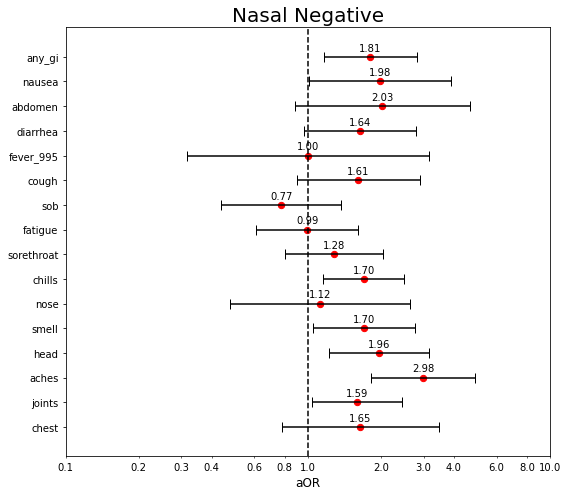

In [1456]:
err = np.array([np.array(df_ans_2.aOR - df_ans_2.aOR_low)  ,
                np.array(df_ans_2.aOR_high      - df_ans_2.aOR)   ])

plt.figure(figsize=(8,7))

plt.barh(df_ans_2['features'], df_ans_2.aOR, xerr=err, facecolor='none', capsize = 5)
plt.scatter(df_ans_2.aOR,df_ans_2['features'], color='r', s=40)
plt.axvline(1.0, color='black', linestyle='--')
plt.xlim(0.1,10)
plt.xlabel('aOR', fontsize=12)
plt.title('Nasal Negative', fontsize=20)
plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()

#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))  # set regular formatting
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
#ax.ticklabel_format(style='plain',axis='x',useOffset=False)

locs = np.array([0.1, 0.2,0.3, 0.4, 0.6, 0.8, 1. , 2.,3, 4., 6., 8, 10., 15, 20., 50. ])
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

#annotations = np.round(df_result.odds_rat,1).astype(str)
#for i, label in enumerate(annotations):
#    plt.text(df_result.odds_rat[i],df_result.feature_2[i],label)

for i in range(len(df_ans_2.aOR)):
    x = np.array(df_ans_2.aOR)[i]
    y = np.array(df_ans_2['features'])[i]
    label = "{:.2f}".format(x)
    
    #print(x,y,label)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,6), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout()


In [1426]:
#pick off the last ones that didn't converge

symptom = 'vomit'
features = ['sex', 'final_age', 'log_days_since_symptom_onset', 'nasal_pos_2',#'arm_v',
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'fecal_pos'] 
formula = symptom + ' ~ ' + ' + '.join(features)

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_final_2[features] )
y = df_final_2[symptom]

est = sm.Logit(y, X).fit(maxiter=10000, method='nm')
start_pars = est.summary2().tables[1]['Coef.']

est.summary()

mod = smf.gee(formula, 
              'Study.ID',
              df_final_2,
              cov_struct=ex,
              family=sm.families.Binomial())

#res = mod.fit()
res = mod.fit(first_dep_update=2000,params_niter = 2000,  start_params = start_pars, maxiter = 10000)  #  start_params = start_pars
res.summary()

Optimization terminated successfully.
         Current function value: 0.035221
         Iterations: 1765
         Function evaluations: 2480


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:229: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                       vomit   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                 10000
Date:                     Fri, 08 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         08:44:23
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                           nan        nan        nan        nan         nan         nan
sex                                 nan        nan        nan        nan         nan         nan
final_age                           nan        nan        nan        nan         nan         nan
log_days_since_symptom_onset        nan        nan        nan        nan         nan         nan
nasal_pos_2                         nan        nan        nan        nan         nan         nan
is_ZY                               nan        nan        nan        nan         nan         nan
is_N2                               nan        nan        nan        nan         nan         nan
is_E                                nan        nan        nan        nan         nan         nan
is_RDRP                             nan        nan        nan        nan         nan         nan
fecal_pos                           nan        nan        nan        nan         nan         nan
==============================================================================
Skew:                             nan   Kurtosis:                          nan
Centered skew:                    nan   Centered kurtosis:                 nan
==============================================================================
"""

In [1457]:
#pick off the last ones that didn't converge

symptom = 'fecal_pos'
features = ['sex', 'final_age', 'log_days_since_symptom_onset', 'nasal_pos_2',#'arm_v',
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP'] 
formula = symptom + ' ~ ' + ' + '.join(features)

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_final_2[features] )
y = df_final_2[symptom]

est = sm.Logit(y, X).fit(maxiter=10000, method='nm')
start_pars = est.summary2().tables[1]['Coef.']

est.summary()

mod = smf.gee(formula, 
              'Study.ID',
              df_final_2,
              cov_struct=ex,
              family=sm.families.Binomial())

#res = mod.fit()
res = mod.fit(first_dep_update=2000,params_niter = 2000,  start_params = start_pars, maxiter = 10000)  #  start_params = start_pars
res.summary()

Optimization terminated successfully.
         Current function value: 0.565753
         Iterations: 1219
         Function evaluations: 1751


<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                   fecal_pos   No. Observations:                 3643
Model:                                 GEE   No. clusters:                      111
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  64
Family:                           Binomial   Mean cluster size:                32.8
Dependence structure:         Exchangeable   Num. iterations:                  2023
Date:                     Tue, 12 Oct 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         15:57:54
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1595      0.610      0.262      0.794      -1.035       1.354
sex                             -1.3003      0.533     -2.441      0.015      -2.344      -0.256
final_age                       -0.0819      0.024     -3.460      0.001      -0.128      -0.036
log_days_since_symptom_onset    -1.2349      0.417     -2.960      0.003      -2.053      -0.417
nasal_pos_2                      1.2546      0.377      3.325      0.001       0.515       1.994
is_ZY                            0.8775      0.180      4.886      0.000       0.526       1.229
is_N2                           -0.3833      0.080     -4.801      0.000      -0.540      -0.227
is_E                            -0.4263      0.092     -4.651      0.000      -0.606      -0.247
is_RDRP                         -1.0617      0.125     -8.471      0.000      -1.307      -0.816
==============================================================================
Skew:                          0.2669   Kurtosis:                      -0.6645
Centered skew:                 0.2251   Centered kurtosis:              0.0501
==============================================================================
"""

In [1256]:
results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['fecal_pos'])]
temp['feature'] = symptom
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])
temp['p'] = temp['P>|z|']

temp

,coef,std err,z,P>|z|,[0.025,0.975],feature,aOR,aOR_high,aOR_low,p
fecal_pos,0.1966,0.217,0.906,0.365,-0.229,0.622,fatigue,1.217257,1.858463,0.797279,0.365


In [783]:
#get empirical odds ratios
cols = ['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']

df_ans = pd.DataFrame([], columns=['symptom', 'OR'])
i=0
for symp in cols:
    p1 = df_final_2[df_final_2.cov_pos == 1][symp].mean()
    p2 = df_final_2[df_final_2.cov_pos == 0][symp].mean()
    df_ans.loc[i] = [symp, p1/(1-p1)/(p2+0.000001)*(1-p2)]
    i+=1

In [784]:
df_ans

,symptom,OR
0,any_gi,2.324180
1,nausea,3.324789
2,vomit,5.754261
3,abdomen,2.438875
4,diarrhea,1.300051
5,fever_995,1.038418
6,cough,1.797313
7,sob,1.145467
8,fatigue,2.157775
9,sorethroat,2.696350


In [1286]:
df_final_2[(df_final_2.nasal_pos_2 == 0) & (df_final_2.fecal_pos > 0)]['Study.ID'].nunique()

75

In [785]:
df_nasal = df_final_2[cols + ['sex', 'final_age', 'log_days_since_symptom_onset', 'sero_baseline_v', 'nasal_pos_2', 'Study.ID', 'TP_new']].drop_duplicates()

In [786]:
cols = ['any_gi', 'nausea',  'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest'] #'rash'

test = 'nasal_pos_2'

df_ans_nas = pd.DataFrame([], columns = ['features', 'aOR', 'aOR_low', 'aOR_high', 'p'])

for i in range(len(cols)):
    
    
    symptom = cols[i]
    print(symptom)
    features = ['sex', 'final_age', 'log_days_since_symptom_onset'] + [test]
    formula = symptom + ' ~ ' + ' + '.join(features)

    ex = sm.cov_struct.Exchangeable()

    X = sm.add_constant(df_nasal[features] )
    y = df_nasal[symptom]

    est = sm.Logit(y, X).fit(maxiter=1000)
    start_pars = est.summary2().tables[1]['Coef.']

    mod = smf.gee(formula, 
              'Study.ID',
              df_nasal,
              cov_struct=ex,
              family=sm.families.Binomial())

    res = mod.fit(first_dep_update=20,params_niter = 50, start_params = start_pars, maxiter = 5000) 
    
    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index.isin([test])]
    
    df_ans_nas.loc[i] = [symptom, 
                     np.exp(temp.coef.values[0]), 
                     np.exp(temp.coef.values[0] - 1.95 * temp['std err'].values[0]), 
                     np.exp(temp.coef.values[0] + 1.95 * temp['std err'].values[0]), 
                     temp['P>|z|'].values[0]]

any_gi
Optimization terminated successfully.
         Current function value: 0.423851
         Iterations 6
nausea
Optimization terminated successfully.
         Current function value: 0.217066
         Iterations 8
abdomen
Optimization terminated successfully.
         Current function value: 0.224999
         Iterations 7
diarrhea
Optimization terminated successfully.
         Current function value: 0.251269
         Iterations 7
fever_995
Optimization terminated successfully.
         Current function value: 0.105696
         Iterations 9
cough
Optimization terminated successfully.
         Current function value: 0.480492
         Iterations 6
sob
Optimization terminated successfully.
         Current function value: 0.280669
         Iterations 7
fatigue
Optimization terminated successfully.
         Current function value: 0.464385
         Iterations 6
sorethroat
Optimization terminated successfully.
         Current function value: 0.340166
         Iterations 7
chills
Optim

In [787]:
df_ans_nas

,features,aOR,aOR_low,aOR_high,p
0,any_gi,3.851259,1.901228,7.801375,0.000
1,nausea,6.492191,2.169941,19.423817,0.001
2,abdomen,1.370259,0.464288,4.044063,0.570
3,diarrhea,3.255025,1.081609,9.795764,0.037
4,fever_995,4.159105,0.734732,23.543505,0.109
5,cough,4.688440,2.449172,8.975063,0.000
6,sob,1.560334,0.627664,3.878894,0.341
7,fatigue,3.688796,1.926972,7.061447,0.000
8,sorethroat,3.054451,1.235901,7.548886,0.016
9,chills,2.219984,0.480345,10.259971,0.310


In [788]:
df_nasal.groupby('any_gi').vomit.mean()

any_gi
0.0    0.00
1.0    0.04
Name: vomit, dtype: float64

In [789]:
df_final_2.groupby('fecal_pos').smell.mean()

fecal_pos
0    0.138215
1    0.303155
Name: smell, dtype: float64

In [790]:
df_final_2.groupby('nasal_pos_2').smell.mean()

nasal_pos_2
0    0.12601
1    0.37018
Name: smell, dtype: float64

In [791]:
#get empirical odds ratios
cols = ['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'fever_995', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']

df_ans = pd.DataFrame([], columns=['symptom', 'OR'])
i=0
for symp in cols:
    p1 = df_nasal[df_nasal.nasal_pos_2 == 1][symp].mean()
    p2 = df_nasal[df_nasal.nasal_pos_2 == 0][symp].mean()
    df_ans.loc[i] = [symp, p1/(1-p1)/(p2+0.000001)*(1-p2)]
    i+=1
    

In [792]:
df_ans

,symptom,OR
0,any_gi,4.229468
1,nausea,6.799739
2,vomit,22471.910112
3,abdomen,1.754183
4,diarrhea,3.088542
5,fever_995,5.522726
6,cough,5.239175
7,sob,1.893241
8,fatigue,5.249958
9,sorethroat,5.215541


In [793]:
#sensitivity analysis looking at long-term followup

In [1472]:
df_long_symp = pd.read_csv('survey_20210508.csv')

df_long_symp['TP_new'] = ''
df_long_symp.loc[df_long_symp.redcap_event_name == df_long_symp.redcap_event_name[0], 'TP_new'] = '4'
df_long_symp.loc[df_long_symp.redcap_event_name == df_long_symp.redcap_event_name[1], 'TP_new'] = '5'
df_long_symp.loc[df_long_symp.redcap_event_name == df_long_symp.redcap_event_name[2], 'TP_new'] = '6'

for symp in ['nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']:
    df_long_symp[symp] = (df_long_symp[symp] == True).astype(int)
    
df_long_symp['Study.ID'] = '55619-'
df_long_symp.loc[df_long_symp.participant_id < 10, 'Study.ID'] = df_long_symp['Study.ID'] + '00' + df_long_symp.participant_id.astype(str)
df_long_symp.loc[(df_long_symp.participant_id >= 10) & (df_long_symp.participant_id < 100), 'Study.ID'] = df_long_symp['Study.ID'] + '0' + df_long_symp.participant_id.astype(str)
df_long_symp.loc[df_long_symp.participant_id >= 100, 'Study.ID'] = df_long_symp['Study.ID'] + df_long_symp.participant_id.astype(str)

df_long_symp = df_long_symp[['Study.ID', 'TP_new', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']]

In [1473]:
df_long_symp.groupby('TP_new').mean()

,nausea,vomit,abdomen,diarrhea,cough,sob,fatigue,sorethroat,chills,nose,smell,head,aches,joints,chest,rash
TP_new,,,,,,,,,,,,,,,,
4,0.054348,0.010870,0.043478,0.065217,0.086957,0.141304,0.239130,0.032609,0.010870,0.097826,0.0,0.086957,0.130435,0.097826,0.108696,0.043478
5,0.023810,0.011905,0.059524,0.035714,0.047619,0.059524,0.142857,0.035714,0.011905,0.083333,0.0,0.095238,0.071429,0.107143,0.071429,0.047619
6,0.036145,0.000000,0.024096,0.012048,0.048193,0.048193,0.156627,0.024096,0.036145,0.060241,0.0,0.108434,0.096386,0.132530,0.048193,0.012048


In [1474]:
cols = ['Study.ID','TP_new', 'Date.Collected',
       'sex', 'final_age', 'arm_v', 'sero_baseline_v', 'is_ZY', 'is_N2',
       'is_E', 'is_RDRP','cov_pos', 'nausea', 'vomit', 'abdomen', 'diarrhea',
       'cough', 'sob', 'fatigue', 'sorethroat', 'chills', 'nose', 'smell',
       'head', 'aches', 'joints', 'chest', 'rash']
tt1 = df_final_2[df_final_2['Study.ID'].isin(set(df2['Study.ID']))][cols]
tt2 = pd.merge(df2, df_long_symp, on=['Study.ID', 'TP_new'])[cols]
df_symp6 = pd.concat([tt1, tt2], ignore_index=True)

df_sympt_days = pd.read_csv('days_to_symptom_onset.csv')
df_symp6=pd.merge(df_symp6, df_sympt_days[['Study.ID', 'symptom_days']], on = 'Study.ID')

df_enroll_days = pd.read_csv('date_of_enrollment.csv')
df_symp6=pd.merge(df_symp6, df_enroll_days[['Study.ID', 'Date.of.enrollment']], on = 'Study.ID')



In [1475]:
df_symp6['Date.Collected'] = df_symp6['Date.Collected'].fillna('missing')

def days_since(row):
    if df_symp6['Date.Collected'][row] != 'missing':
        return (pd.to_datetime(df_symp6['Date.Collected'][row]) - pd.to_datetime(df_symp6['Date.of.enrollment'][row])).days
    else:
        if df_symp6.TP_new[row] == '1':
            return 1
        if df_symp6.TP_new[row] == '2':
            return 14
        if df_symp6.TP_new[row] == '3':
            return 28
        if df_symp6.TP_new[row] == '4': 
            return 3*28
        if df_symp6.TP_new[row] == '5':
            return 6*28
        if df_symp6.TP_new[row] == '6':
            return 280

In [1476]:
ans = np.array([])
for i in range(len(df_symp6.index)):
    ans = np.append(ans, [days_since(i)])

df_symp6['days_since_randomization'] = ans

In [1477]:
df_symp6.columns

Index(['Study.ID', 'TP_new', 'Date.Collected', 'sex', 'final_age', 'arm_v',
       'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'cov_pos',
       'nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob', 'fatigue',
       'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches', 'joints',
       'chest', 'rash', 'symptom_days', 'Date.of.enrollment',
       'days_since_randomization'],
      dtype='object')

In [1478]:
df_symp6['fecal_pos'] = df_symp6.cov_pos
df_symp6['days_since_symptom_onset'] = np.abs(df_symp6.days_since_randomization) + np.abs(df_symp6.symptom_days)
df_symp6['log_days_since_symptom_onset'] = np.log10(1 + df_symp6.days_since_symptom_onset)
df_symp6['any_gi'] = (df_symp6.nausea + df_symp6.vomit +df_symp6.abdomen +df_symp6.diarrhea > 0).astype(int)

#df_symp6 = df_symp6[df_symp6['Study.ID'] != '55619-266']
#df_symp6 = df_symp6[df_symp6['Study.ID'] != '55619-333']


In [1479]:
df_symp6.columns

Index(['Study.ID', 'TP_new', 'Date.Collected', 'sex', 'final_age', 'arm_v',
       'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'cov_pos',
       'nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob', 'fatigue',
       'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches', 'joints',
       'chest', 'rash', 'symptom_days', 'Date.of.enrollment',
       'days_since_randomization', 'fecal_pos', 'days_since_symptom_onset',
       'log_days_since_symptom_onset', 'any_gi'],
      dtype='object')

In [1480]:
df_symp6['Study.ID'].nunique()

74

In [1481]:
#df_symp6 = df_symp6[df_symp6.TP_new.isin(['3', '4', '5', '6'])]

In [1482]:
cols = ['any_gi', 'nausea', #'vomit', 
        'abdomen', 'diarrhea', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']

test = 'fecal_pos'

df_ans = pd.DataFrame([], columns = ['features', 'aOR', 'aOR_low', 'aOR_high', 'p'])

for i in range(len(cols)):
    symptom = cols[i]
    features = ['sex', 'final_age', 'log_days_since_symptom_onset', 
            'is_ZY', 'is_N2', 'is_E', 'is_RDRP'] + [test]
    formula = symptom + ' ~ ' + ' + '.join(features)

    ex = sm.cov_struct.Exchangeable()

    X = sm.add_constant(df_symp6[features] )
    y = df_symp6[symptom]

    est = sm.Logit(y, X).fit(maxiter=5000)
    start_pars = est.summary2().tables[1]['Coef.']

    mod = smf.gee(formula, 
              'Study.ID',
              df_symp6,
              cov_struct=ex,
              family=sm.families.Binomial())

    res = mod.fit(first_dep_update=2000,params_niter = 2000,  start_params = start_pars, maxiter = 10000)
    
    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index.isin([test])]
    
    df_ans.loc[i] = [symptom, 
                     np.exp(temp.coef.values[0]), 
                     np.exp(temp.coef.values[0] - 1.95 * temp['std err'].values[0]), 
                     np.exp(temp.coef.values[0] + 1.95 * temp['std err'].values[0]), 
                     temp['P>|z|'].values[0]]

Optimization terminated successfully.
         Current function value: 0.234934
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.080080
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.106514
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.148190
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207680
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427417
         Iterations 6


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: overflow encountered in square
  return t/(1 + t)**2
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:229: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2


Optimization terminated successfully.
         Current function value: 0.127428
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.039583
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.240356
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.091095
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203362
         Iterations 8


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: overflow encountered in square
  return t/(1 + t)**2
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:229: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2


Optimization terminated successfully.
         Current function value: 0.196534
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293750
         Iterations 7


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Optimization terminated successfully.
         Current function value: 0.258651
         Iterations 8


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.060768
         Iterations 24


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1781: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_robust))


In [1483]:
df_ans

,features,aOR,aOR_low,aOR_high,p
0,any_gi,1.569097,0.759648,3.241059,0.226
1,nausea,0.813426,0.221540,2.986643,0.757
2,abdomen,1.427037,0.289529,7.033609,0.664
3,diarrhea,1.324321,0.440916,3.977685,0.618
4,cough,0.739042,0.323923,1.686154,0.475
5,sob,1.594563,0.996656,2.551165,0.052
6,fatigue,NaN,NaN,NaN,NaN
7,sorethroat,2.009528,1.231767,3.278382,0.005
8,chills,2.904032,1.711979,4.926112,0.000
9,nose,1.326177,0.605561,2.904322,0.483


In [1274]:
pd.DataFrame(df_symp6[['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']].mean())

,0
any_gi,0.146330
nausea,0.042359
vomit,0.005776
abdomen,0.053911
diarrhea,0.069314
cough,0.165584
sob,0.096270
fatigue,0.230325
sorethroat,0.111432
chills,0.034657


In [1275]:
# get the last few to converge

symptom = 'sorethroat'
features = ['fecal_pos', 'log_days_since_symptom_onset'] #,  'sex', 'final_age',  'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'log_days_since_symptom_onset'
#, 
formula = symptom + ' ~ ' + ' + '.join(features)

df_symp6_2 = df_symp6.copy()
df_symp6_2['log_days_since_symptom_onset'] = (df_symp6.days_since_symptom_onset)**(1/5)
#for col in ['log_days_since_symptom_onset',  'sex', 'final_age']:
#    df_symp6_2[col] = (df_symp6_2[col] - df_symp6_2[col].mean())/df_symp6_2[col].std()

ex = sm.cov_struct.Exchangeable()

X = sm.add_constant(df_symp6_2[features] )
y = df_symp6_2[symptom]

est = sm.Logit(y, X).fit(maxiter=1000)
start_pars = est.summary2().tables[1]['Coef.']

est.summary()

mod = smf.gee(formula, 
              'Study.ID',
              df_symp6_2,
              cov_struct=ex,
              family=sm.families.Binomial())

#res = mod.fit()
res = mod.fit(first_dep_update=700,params_niter = 1000,  start_params = start_pars, maxiter = 10000)  #  start_params = start_pars
#res.summary()

results_as_html = res.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp = temp[temp.index.isin(['fecal_pos'])]
temp['feature'] = symptom
temp['aOR'] = np.exp(temp.coef)
temp['aOR_high'] = np.exp(temp.coef + 1.95 * temp['std err'])
temp['aOR_low'] = np.exp(temp.coef - 1.95 * temp['std err'])
temp['p'] = temp['P>|z|']

temp

Optimization terminated successfully.
         Current function value: 0.309387
         Iterations 7


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:229: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:230: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2


,coef,std err,z,P>|z|,[0.025,0.975],feature,aOR,aOR_high,aOR_low,p
fecal_pos,NaN,NaN,NaN,NaN,NaN,NaN,sorethroat,NaN,NaN,NaN,NaN


In [148]:
df_symp6.groupby('fecal_pos').aches.mean()#[['aches'] + features].corr()

fecal_pos
0    0.097586
1    0.229148
Name: aches, dtype: float64

<AxesSubplot:xlabel='days_since_symptom_onset', ylabel='aches'>

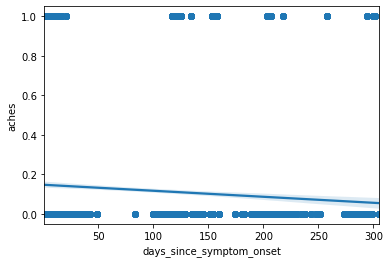

In [887]:
sns.regplot(x=df_symp6.days_since_symptom_onset, y=df_symp6.aches)

(array([591., 248., 488., 278., 256., 495.,  88.,  24.,   0.,   0.,   0.,
          0.,   0.,   8.,   0.,   0.,  64.,  88., 144., 152., 127.,  47.,
         80.,  48.,  32.,  32.,   8.,   0.,   8.,  44.,   8.,  24.,  90.,
         84.,  59.,  62.,  24.,  44.,  31.,   8.,   8.,   8.,   8.,   0.,
         16.,  16.,  72.,  32.,  16.,  31.]),
 array([  2.  ,   8.08,  14.16,  20.24,  26.32,  32.4 ,  38.48,  44.56,
         50.64,  56.72,  62.8 ,  68.88,  74.96,  81.04,  87.12,  93.2 ,
         99.28, 105.36, 111.44, 117.52, 123.6 , 129.68, 135.76, 141.84,
        147.92, 154.  , 160.08, 166.16, 172.24, 178.32, 184.4 , 190.48,
        196.56, 202.64, 208.72, 214.8 , 220.88, 226.96, 233.04, 239.12,
        245.2 , 251.28, 257.36, 263.44, 269.52, 275.6 , 281.68, 287.76,
        293.84, 299.92, 306.  ]),
 <BarContainer object of 50 artists>)

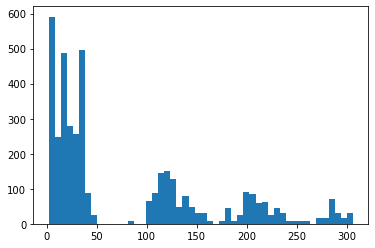

In [594]:
plt.hist(10**(df_symp6.log_days_since_symptom_onset), bins=50)

In [1051]:
pd.DataFrame(df_symp6.mean())

,0
TP_new,inf
sex,-0.018883
final_age,2.071678
arm_v,0.477300
sero_baseline_v,-0.007948
is_ZY,0.054394
is_N2,-0.000677
is_E,0.000385
is_RDRP,0.000307
cov_pos,0.265674


In [1049]:
cols = ['any_gi', 'nausea', 'vomit', 'abdomen', 'diarrhea',  'cough', 'sob',
       'fatigue', 'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches',
       'joints', 'chest', 'rash']

df_ans = pd.DataFrame([], columns=['symptom', 'OR'])
i=0
for symp in cols:
    p1 = df_symp6[df_symp6.fecal_pos == 1][symp].mean()
    p2 = df_symp6[df_symp6.fecal_pos == 0][symp].mean()
    df_ans.loc[i] = [symp, p1/(1-p1)/(p2+0.000001)*(1-p2)]
    i+=1

In [1050]:
df_ans

,symptom,OR
0,any_gi,2.372661
1,nausea,1.881001
2,vomit,10.662846
3,abdomen,2.305946
4,diarrhea,1.874034
5,cough,2.780886
6,sob,1.128672
7,fatigue,1.617102
8,sorethroat,3.086899
9,chills,2.645447


In [519]:
df_final_2.groupby(['TP_new', 'nasal_pos_2']).fecal_pos.mean()

TP_new  nasal_pos_2
1       0              0.345588
        1              0.599369
2       0              0.354906
        1              0.810484
3       0              0.179130
        1              0.000000
Name: fecal_pos, dtype: float64

In [ ]:
#days to stop shedding

In [1427]:
df1 = pd.DataFrame(pd.read_csv('20210922_g_RNA_fulldata.csv'))  #20210730_g_RNA_fulldata.csv
df1.rename(columns={'Sample':'Sample.Name', 'Target':'Target.Name'}, inplace=True)
df = df1[(df1['Sample.class'] == 'clinical sample') & (df1['data.status'] == 'Available')].copy()

df['replicant'] = df['Sample.Name'] + '_' + df['Target.Name']

# enforce limit of blank
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.487) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N1') & (df['viral.load'] < np.exp(0.237) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'OG') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.668) - 1), 'viral.load'] = 0
df.loc[(df['Sample.Type'] == 'ZY') & (df['Target.Name'] == 'N2') & (df['viral.load'] < np.exp(0.239) - 1), 'viral.load'] = 0

df['Date.Collected'].fillna('missing', inplace=True)

df['duplication'] = df.groupby(['Target.Name', 'Study.ID', 'Date.Collected', 'TP_new', 'Sample.Type' ])['viral.load'].rank(method='first', ascending=False)

In [1428]:
df_tests = df[['Sample.Name', 'Study.ID', 'Date.Collected', 'Date.of.enrollment', 'TP_new']].drop_duplicates().copy()
df_tests.reset_index(drop=True, inplace=True)

In [1429]:
df_sympt_days = pd.read_csv('days_to_symptom_onset.csv')
df_tests=pd.merge(df_tests, df_sympt_days[['Study.ID', 'symptom_days']], on = 'Study.ID')

df_tests['Date.Collected'] = df_tests['Date.Collected'].fillna('missing')

def days_since(row):
    if df_tests['Date.Collected'][row] != 'missing':
        return (pd.to_datetime(df_tests['Date.Collected'][row]) - pd.to_datetime(df_tests['Date.of.enrollment'][row])).days
    else:
        if df_tests.TP_new[row] == '1':
            return 1
        if df_tests.TP_new[row] == '2':
            return 14
        if df_tests.TP_new[row] == '3':
            return 28
        if df_tests.TP_new[row] == '4': 
            return 3*28
        if df_tests.TP_new[row] == '5':
            return 6*28
        if df_tests.TP_new[row] == '6':
            return 280

        
ans = np.array([])
for i in range(len(df_tests.index)):
    ans = np.append(ans, [days_since(i)])

df_tests['days_since_randomization'] = ans

df_tests['days_since_symptom_onset'] = np.abs(df_tests.days_since_randomization) + np.abs(df_tests.symptom_days)


In [1430]:
for st in ['OG', 'ZY']:
    for tn in ['N1', 'N2', 'E', 'RdRP']:

        df_temp = df[(df['Sample.Type'] == st) & (df['Target.Name'] == tn)].copy()
        ans = []
        for i in range(len(df_tests)):
            #print(df_tests.loc[i, 'Study.ID'])
            df_temp2 = df_temp[(df_temp['Study.ID'] == df_tests.loc[i, 'Study.ID']) &
                               (df_temp['Date.Collected'] == df_tests.loc[i, 'Date.Collected']) & 
                               (df_temp['TP_new'] == df_tests.loc[i, 'TP_new'])].copy()

            if (df_temp2['viral.load'] > 0).astype(int).sum() > 1:
                ans = ans + [1]
            else:
                ans = ans + [0]
        df_tests[st + ':' + tn] = ans

In [1431]:
df_tests['N1'] = (df_tests['OG:N1'] + df_tests['ZY:N1'] > 0).astype(int)
df_tests['N2'] = (df_tests['OG:N2'] + df_tests['ZY:N2'] > 0).astype(int)
df_tests['E'] = (df_tests['OG:E'] + df_tests['ZY:E'] > 0).astype(int)
df_tests['RdRP'] = (df_tests['OG:RdRP'] + df_tests['ZY:RdRP'] > 0).astype(int)
df_tests['overall'] = (df_tests.N1 + df_tests.N2 + df_tests.E + df_tests.RdRP > 1).astype(int)

In [1432]:
df_tests.mean()

symptom_days                 5.481591
days_since_randomization    64.519882
days_since_symptom_onset    70.001473
OG:N1                        0.279823
OG:N2                        0.197349
OG:E                         0.178203
OG:RdRP                      0.119293
ZY:N1                        0.341679
ZY:N2                        0.285714
ZY:E                         0.270987
ZY:RdRP                      0.217968
N1                           0.400589
N2                           0.326951
E                            0.319588
RdRP                         0.251841
overall                      0.324006
dtype: float64

In [1433]:
df_tests.sort_values(by = ['Study.ID', 'TP_new'])[['Study.ID', 'TP_new', 'days_since_symptom_onset', 'N1']].to_csv('work.csv')

In [1434]:
df_tests[(df_tests.overall > 0) & (df_tests.TP_new.isin(['4', '5']))]['Study.ID'].nunique()

3

In [1435]:
set(df_tests[(df_tests.overall > 0) & (df_tests.TP_new.isin(['4', '5']))]['Study.ID'])

{'55619-282', '55619-319', '55619-339'}

In [1436]:
df_tests[df_tests['Study.ID'].isin(set(df_tests[(df_tests.overall > 0) & (df_tests.TP_new.isin(['4', '5']))]['Study.ID']))].sort_values(by=['Study.ID', 'TP_new'])

,Sample.Name,Study.ID,Date.Collected,Date.of.enrollment,TP_new,symptom_days,days_since_randomization,days_since_symptom_onset,OG:N1,OG:N2,...,OG:RdRP,ZY:N1,ZY:N2,ZY:E,ZY:RdRP,N1,N2,E,RdRP,overall
326,COVRNA0352,55619-282,07/05/2020,07/02/2020,1,5.0,3.0,8.0,0,0,...,0,1,1,1,0,1,1,1,0,1
327,COVRNA0136,55619-282,07/05/2020,07/02/2020,1,5.0,3.0,8.0,0,0,...,0,1,1,1,0,1,1,1,0,1
324,COVRNA0353,55619-282,missing,07/02/2020,2,5.0,14.0,19.0,0,0,...,0,1,1,1,1,1,1,1,1,1
325,COVRNA0137,55619-282,missing,07/02/2020,2,5.0,14.0,19.0,0,0,...,0,1,1,1,1,1,1,1,1,1
328,COVRNA0431,55619-282,07/30/2020,07/02/2020,3,5.0,28.0,33.0,0,0,...,0,1,0,0,0,1,0,0,0,0
329,COVRNA0432,55619-282,07/30/2020,07/02/2020,3,5.0,28.0,33.0,0,0,...,0,1,0,0,0,1,0,0,0,0
330,COVRNA0527,55619-282,10/22/2020,07/02/2020,4,5.0,112.0,117.0,1,1,...,0,1,0,0,0,1,1,0,0,1
331,COVRNA0528,55619-282,10/22/2020,07/02/2020,4,5.0,112.0,117.0,1,1,...,0,1,0,0,0,1,1,0,0,1
332,COVRNA0663,55619-282,01/16/2021,07/02/2020,5,5.0,198.0,203.0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,COVRNA0157,55619-319,missing,07/11/2020,1,8.0,1.0,9.0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [879]:
df_symp6.columns

Index(['Study.ID', 'TP_new', 'Date.Collected', 'sex', 'final_age', 'arm_v',
       'sero_baseline_v', 'is_ZY', 'is_N2', 'is_E', 'is_RDRP', 'cov_pos',
       'nausea', 'vomit', 'abdomen', 'diarrhea', 'cough', 'sob', 'fatigue',
       'sorethroat', 'chills', 'nose', 'smell', 'head', 'aches', 'joints',
       'chest', 'rash', 'symptom_days', 'Date.of.enrollment',
       'days_since_randomization'],
      dtype='object')

In [880]:
df_symp6['fecal_pos'] = df_symp6.cov_pos
df_symp6['log_days_since_symptom_onset'] = np.log10(1 + df_symp6.days_since_symptom_onset)
df_symp6['any_gi'] = (df_symp6.nausea + df_symp6.vomit +df_symp6.abdomen +df_symp6.diarrhea > 0).astype(int)

#df_symp6 = df_symp6[df_symp6['Study.ID'] != '55619-266']
#df_symp6 = df_symp6[df_symp6['Study.ID'] != '55619-333']


In [1066]:
xx = np.array([0	,
0	,
0	,
0	,
0	,
0	,
0	,
7	,
0	,
12	,
7	,
5	,
0	,
9	,
0	,
0	,
0	,
0	,
17	,
8	,
0	,
29	,
0	,
22	,
14	,
0	,
0	,
29	,
34	,
32	,
7	,
29	,
30	,
12	,
0	,
20	,
19	,
19	,
0	,
24	,
20	,
0	,
34	,
17	,
19	,
35	,
0	,
5	,
0	,
21	,
0	,
33	,
25	,
32	,
0	,
27	,
9	,
7	,
9	,
5	,
0	,
22	,
14	,
1	,
18	,
0	,
0	,
19	,
4	,
16	,
10	,
22	,
11	,
8	,
6	,
6	,
0	,
10	,
0	,
23	,
14	,
15	,
31	,
0	,
117	,
24	,
10	,
20	,
32	,
0	,
28	,
28	,
3	,
0	,
0	,
0	,
33	,
7	,
1	,
21	,
21	,
19	,
0	,
21	,
0	,
5	,
0	,
83	,
28	,
5	,
0	])

Text(0, 0.5, 'Number of patients')

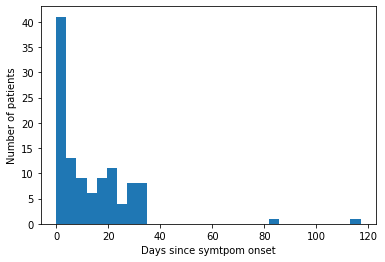

In [1073]:
plt.hist(xx, bins=30)
plt.xlabel('Days since symtpom onset')
plt.ylabel('Number of patients')